### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

<b>Assignment: Diagnostic Analysis using Python

The problem: patients are routinley missing appointments and the NHS does not have a firm understanding of how their
services are utilised.
The mission: the NHS needs infrastructure to meet patient capacity.
The dilemma: they do not know whether, or by how much, they need to expand capacity or make better use of existing resources.
The objective: provide advice to help them with their dilemma, while also advising on the factors around wasted resources regardless, as this intelligence is useful in and of istelf.



<b>The following questions will need to be investigated, on a national as well as a local level.<b>


<b>Descriptive Analysis (What happened):<b> 
    
    - At what rate were appointments attended?
    - What was the average time between booking and appointment? How does it
      compare to targets?
    - What was the average length (minutes) of a consultation? How does it 
      compare to targets?

We will need to derive performance metrics to answer these questions, pulled from different DataFrames. We will then consolidate these metrics into a singular DataFrame.

We will introduce additional data regarding population and staff levels which will likely be relevant to the analysis.

<b>Diagnostic Analysis (Why did it happen?):<b> 
    
We will look to establish relationships between the various performance metrics as well as in relation to local factors: population, staff levels.
    
We will ideally identify a key critical issue giving rise to a lot of wasted resources. We will explore it's causes and potential relationship with other areas of performance. Finally, we will examine ways to ameliorate the issue.

### Prepare workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Import other libraries if required. (Note that you can revisit this section in later modules.)

import seaborn as sns
import matplotlib.pyplot as plt

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check 'actual_duration.csv' as ad.
ad = pd.read_csv('actual_duration.csv')

In [3]:
# View the DataFrame.
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [4]:
# Check for missing values.
ad.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [5]:
# Review metadata and descriptive statistics.
ad.describe()

count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000

In [6]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [7]:
# Import and sense-check 'appointments_regional.csv' as ar.
ar = pd.read_csv('appointments_regional.csv') 

In [8]:
# View the DataFrame.
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [9]:
# Check for missing values.
ar.isnull().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [10]:
# Review metadata and descriptive statistics.
ar.describe()

count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000

In [11]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [12]:
# Import and sense-check 'national_categories.xlsx' as nc.
nc = pd.read_excel('national_categories.xlsx')

In [13]:
# View the DataFrame.
nc.head()


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [14]:
# Check for missing values.
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [15]:
# Review metadata and descriptive statistics.
nc.describe()

count_of_appointments
count          817394.000000
mean              362.183684
std              1084.576600
min                 1.000000
25%                 7.000000
50%                25.000000
75%               128.000000
max             16590.000000

In [16]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


### Exploration :

**Question 1:** How many locations are there in the data set?

In [17]:
# Determine the number of locations.
# There are several tiers of location: region, ICB and Sub-ICB. We should verify that different data sets align.

# Looking at the regional level, which only ad lists.
print('Data on number of regions:')
print('ad lists', ad['region_ons_code'].value_counts().count(), 'regions')

# Looking at the ICB level.
print('Data on number of ICB locations:')
print('ad lists', ad['icb_ons_code'].value_counts().count(), 'ICB codes')
print('nc lists', nc['icb_ons_code'].value_counts().count(), 'ICB codes')
print('ar lists', ar['icb_ons_code'].value_counts().count(), 'ICB codes')

# Looking at the Sub-ICB level.
print('Data on number of Sub-ICB locations:')
print('ad lists', ad['sub_icb_location_code'].value_counts().count(), 'Sub ICB location codes')
print('ad lists', ad['sub_icb_location_ons_code'].value_counts().count(), 'Sub ICB ONS location codes')
print('ad lists', ad['sub_icb_location_name'].value_counts().count(), 'Sub ICB ONS location names')
print('nc lists', nc['sub_icb_location_name'].value_counts().count(), 'Sub ICB ONS location names')


Data on number of regions:
ad lists 7 regions
Data on number of ICB locations:
ad lists 42 ICB codes
nc lists 42 ICB codes
ar lists 42 ICB codes
Data on number of Sub-ICB locations:
ad lists 106 Sub ICB location codes
ad lists 106 Sub ICB ONS location codes
ad lists 106 Sub ICB ONS location names
nc lists 106 Sub ICB ONS location names


In [18]:
# Data sets seem to align, quite clear that number of 'locations' is 106. 
# Lets just verify that an alternative piece of code produces same values.
# We will only look at Sub-ICB location names and codes in the ad DataFrame.

print('The number of location codes is:', ad['sub_icb_location_code'].nunique())
print('The number of location names is:', ad['sub_icb_location_name'].nunique())

The number of location codes is: 106
The number of location names is: 106


**Question 2:** What are the five locations with the highest number of records?



In [19]:
# Determine the top five locations based on record count.
# I will appraoch this by extracting this information and feeding it into a new DataFrame.

# Defining new DataFrame. This will initially be defined as a series however.
loc_rec_count = ad['sub_icb_location_name'].value_counts()

# Converting the series to a dataframe.
loc_rec_count = loc_rec_count.reset_index()

# Adding columns.
loc_rec_count.columns = ['Location Name', 'Record Count']

# For certainty, I have sorted the values by record count.
loc_rec_count.sort_values('Record Count', ascending=False)

# We can then print the top five (or any other number)
# Define how many locations we want to see as 'x'.
x = 5
print('The', x, 'locations with highest number of records are:', loc_rec_count['Location Name'].head(x).tolist())

# Show the head of the DataFrame regardless.
loc_rec_count.head()

The 5 locations with highest number of records are: ['NHS Norfolk and Waveney ICB - 26A', 'NHS Kent and Medway ICB - 91Q', 'NHS North West London ICB - W2U3Z', 'NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y', 'NHS Greater Manchester ICB - 14L']


Location Name  Record Count
0                  NHS Norfolk and Waveney ICB - 26A          1484
1                      NHS Kent and Medway ICB - 91Q          1484
2                  NHS North West London ICB - W2U3Z          1484
3  NHS Bedfordshire Luton and Milton Keynes ICB -...          1484
4                   NHS Greater Manchester ICB - 14L          1484

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [20]:
# Determine the number of service settings.
print('There are', nc['service_setting'].value_counts().count(), 
      'service settings.')

There are 5 service settings.


In [21]:
# Determine the number of context types.
print('There are', nc['context_type'].value_counts().count(), 
      'context types.')

There are 3 context types.


In [22]:
# Determine the number of national categories.
print('There are', nc['national_category'].value_counts().count(), 
      'national categories.')

There are 18 national categories.


In [23]:
# Determine the number of appointment statuses.
print('There are', ar['appointment_status'].value_counts().count(), 
      'appointment statuses.')

There are 3 appointment statuses.


# 

### Continuing to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [24]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [25]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [26]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], 
                                        format = '%d-%b-%y')

# View the DataFrame.
print(ad.dtypes)
ad.head()

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0       2021-12-01           31-60 Minutes                    364  
1       2021-12-01           21-30 Minutes                    619  
2       2021-12-01            6-10 Minutes                   1698  
3       2021-12-01  Unknown / Data Quality                   1277  
4       2021-12-01           16-20 Minutes                    730

In [27]:
# Change the format of ar['appointment_date'] to datetime.
# I assume the above meant to say nc.['appointment_date'].

nc['appointment_date'] = pd.to_datetime(nc['appointment_date'], format = '%d-%b-%y')

# View the DataFrame.
print(nc.dtypes)
nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [28]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.

"""
We want to ascertain the max and min date in a single column.
For this purpose we apply the max and min function to the entire column.
We can further make use of an f string to display the information in a digestible format.
"""

max_ad_date = ad[['appointment_date']].max()
min_ad_date = ad[['appointment_date']].min()

# max/min_ad_date returns as a Series. The '.to_string(index=False)' code reduces it to just the date in question.
print(f"The oldest recorded appointment was on {min_ad_date.to_string(index=False)}.")
print(f"The most recently recorded appointment was on {max_ad_date.to_string(index=False)}.")

# I will add another line to indicate the period in which the data was recorded.
print(f"Therefore the data consists of appointments recorded over \
{(max_ad_date - min_ad_date).to_string(index=False)}.")


The oldest recorded appointment was on 2021-12-01.
The most recently recorded appointment was on 2022-06-30.
Therefore the data consists of appointments recorded over 211 days.


In [29]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.

"""
As above.
"""

max_ad_date = nc[['appointment_date']].max()
min_ad_date = nc[['appointment_date']].min()

# max/min_ad_date returns as a Series. The '.to_string(index=False)' code reduces it to just the date in question.
print(f"The oldest recorded appointment was on {min_ad_date.to_string(index=False)}.")
print(f"The most recently recorded appointment was on {max_ad_date.to_string(index=False)}.")

# I will add another line to indicate the period in which the data was recorded.
print(f"Therefore the data consists of appointments recorded over \
{(max_ad_date - min_ad_date).to_string(index=False)}.")

The oldest recorded appointment was on 2021-08-01.
The most recently recorded appointment was on 2022-06-30.
Therefore the data consists of appointments recorded over 333 days.


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [30]:
# For each of these service settings, determine the number of records available for the period and the location. 

# First we want to create a new DataFrame based upon the filtering criteria.
nc_sc = nc[(nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') &
          (nc['appointment_date'] >= '2022-01-01') &
          (nc['appointment_date'] <= '2022-06-01')]

# Then we groupby the variable in question. I have intentionally written over nc_sc.
nc_sc = nc_sc.groupby('service_setting')

# View the output.
nc_sc.sum()


count_of_appointments
service_setting                                 
Extended Access Provision                  98159
General Practice                         4804239
Other                                     152897
Primary Care Network                      109840
Unmapped                                  391106

**Question 3:** Which month had the highest number of appointments?

In [31]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
nc_apptmonth = nc.groupby('appointment_month')
nc_apptmonth.sum().sort_values('count_of_appointments', ascending = False)


count_of_appointments
appointment_month                       
2021-11                         30405070
2021-10                         30303834
2022-03                         29595038
2021-09                         28522501
2022-05                         27495508
2022-06                         25828078
2022-01                         25635474
2022-02                         25355260
2021-12                         25140776
2022-04                         23913060
2021-08                         23852171

**Question 4:** What was the total number of records per month?

In [32]:
# Total number of records per month.
# Looking at the total number of records per month, per data source. 
"""
I will build a new DataFrame that lists in a table the number of appointments per month, by data source.
I will first need to define a grouped subset of each table for each source. The 'ar' and 'nc' DataFrames 
have appointments by month but 'ad' does not. I will need to copy and augment the 'ad' DataFrames slightly.
"""

# Copy the ad DataFrame.
ad_apptmonth = ad.copy()

# Rename the column to indicate 'month' rather than 'date', then use 'strftime' to change the format.
ad_apptmonth.rename(columns={'appointment_date': 'appointment_month'}, inplace=True)
ad_apptmonth['appointment_month'] = ad_apptmonth['appointment_month'].dt.strftime('%Y-%m')

# GroupBy the newly formatted field. 
ad_apptmonth = ad_apptmonth.groupby('appointment_month')

# We already grouped the nc DataFrame (above). We just have to repeat with the ar DataFrame.
ar_apptmonth = ar.groupby('appointment_month')

# We can now assemble to table showing appointments by data source.
# First we need to add prefixes so that we can still see which source refers to which column.

nc_apptmonth_sum = nc_apptmonth.sum().add_prefix('nc_')
ad_apptmonth_sum = ad_apptmonth.sum().add_prefix('ad_')
ar_apptmonth_sum = ar_apptmonth.sum().add_prefix('ar_')

# We can now use the concat function the merge the tables. Axis = 1 directs this to be done at the column level.
all_rec_appts = pd.concat([nc_apptmonth_sum, ar_apptmonth_sum, ad_apptmonth_sum], axis = 1)

# I will also standardise data types for the sake of uniformity.
all_rec_appts['ar_count_of_appointments'] = all_rec_appts['ar_count_of_appointments'].astype(float)

# Finaly we should mandate that the values are sorted by month.
print(all_rec_appts.dtypes)
all_rec_appts.sort_values('appointment_month')


nc_count_of_appointments    float64
ar_count_of_appointments    float64
ad_count_of_appointments    float64
dtype: object


nc_count_of_appointments  ar_count_of_appointments  \
appointment_month                                                       
2020-01                                 NaN                27199296.0   
2020-02                                 NaN                24104621.0   
2020-03                                 NaN                24053468.0   
2020-04                                 NaN                16007881.0   
2020-05                                 NaN                16417212.0   
2020-06                                 NaN                20690805.0   
2020-07                                 NaN                22491437.0   
2020-08                                 NaN                20150520.0   
2020-09                                 NaN                26714255.0   
2020-10                                 NaN                28301932.0   
2020-11                                 NaN                25061602.0   
2020-12                                 NaN                23535936.0   
2021-01                                 NaN                22492069.0   
2021-02                                 NaN                22399569.0   
2021-03                                 NaN                27225424.0   
2021-04                                 NaN                23879932.0   
2021-05                                 NaN                23508395.0   
2021-06                                 NaN                26784182.0   
2021-07                                 NaN                25739219.0   
2021-08                          23852171.0                23852171.0   
2021-09                          28522501.0                28522501.0   
2021-10                          30303834.0                30303834.0   
2021-11                          30405070.0                30405070.0   
2021-12                          25140776.0                25140776.0   
2022-01                          25635474.0                25635474.0   
2022-02                          25355260.0                25355260.0   
2022-03                          29595038.0                29595038.0   
2022-04                          23913060.0                23913060.0   
2022-05                          27495508.0                27495508.0   
2022-06                          25828078.0                25828078.0   

                   ad_count_of_appointments  
appointment_month                            
2020-01                                 NaN  
2020-02                                 NaN  
2020-03                                 NaN  
2020-04                                 NaN  
2020-05                                 NaN  
2020-06                                 NaN  
2020-07                                 NaN  
2020-08                                 NaN  
2020-09                                 NaN  
2020-10                                 NaN  
2020-11                                 NaN  
2020-12                                 NaN  
2021-01                                 NaN  
2021-02                                 NaN  
2021-03                                 NaN  
2021-04                                 NaN  
2021-05                                 NaN  
2021-06                                 NaN  
2021-07                                 NaN  
2021-08                                 NaN  
2021-09                                 NaN  
2021-10                                 NaN  
2021-11                                 NaN  
2021-12                          22853483.0  
2022-01                          23597196.0  
2022-02                          23351939.0  
2022-03                          27170002.0  
2022-04                          21948814.0  
2022-05                          25343941.0  
2022-06                          23715317.0

In [33]:
# Your additional questions and insights.

We can generally see a peak in overall appointments over the winter period. There is a lull in Dec-Feb, with another peak in March.

> ***Check*** that you have adequately satisfied the expectations of the current module and that you have added code comments as well as Markdown cells documenting your analytic journey and observations to satisfy the assessment criteria.

# 

### Creating visualisations and identifying possible monthly and seasonal trends in the data.

In [34]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [35]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [36]:
# Aggregate on a monthly level and determine the sum of records per month.
nc_recs = nc.groupby('appointment_month').sum().reset_index()

# View the output.
nc_recs

appointment_month  count_of_appointments
0            2021-08               23852171
1            2021-09               28522501
2            2021-10               30303834
3            2021-11               30405070
4            2021-12               25140776
5            2022-01               25635474
6            2022-02               25355260
7            2022-03               29595038
8            2022-04               23913060
9            2022-05               27495508
10           2022-06               25828078

**Service settings:**

Text(0, 0.5, 'Number of Appointments (Millions)')

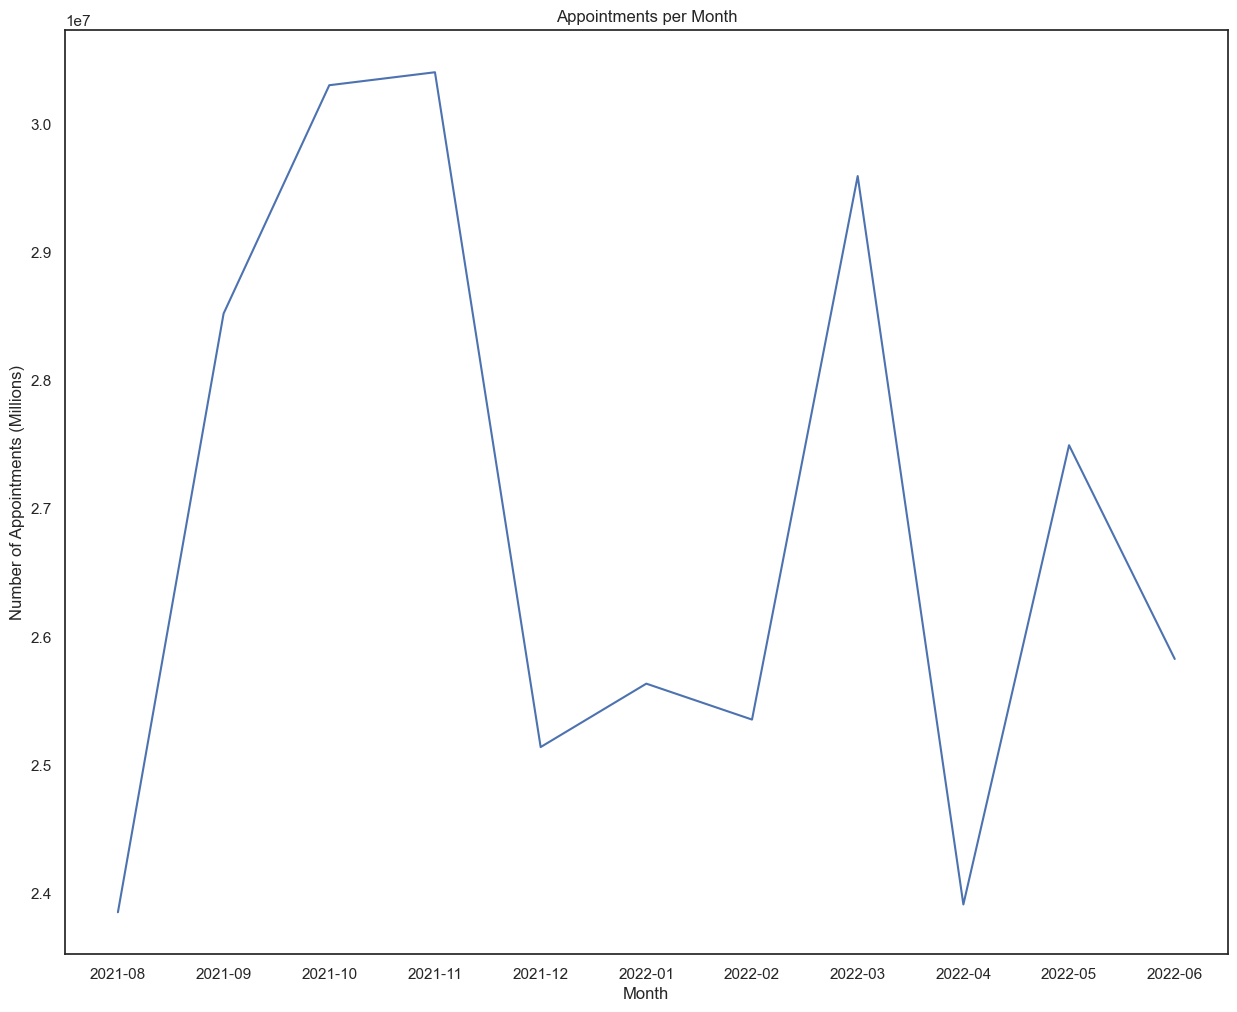

In [37]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.

# All types of appointments over time.
sns.lineplot(x='appointment_month', y='count_of_appointments', data = nc_recs, ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Appointments per Month')
plt.xlabel('Month')
plt.ylabel('Number of Appointments (Millions)')


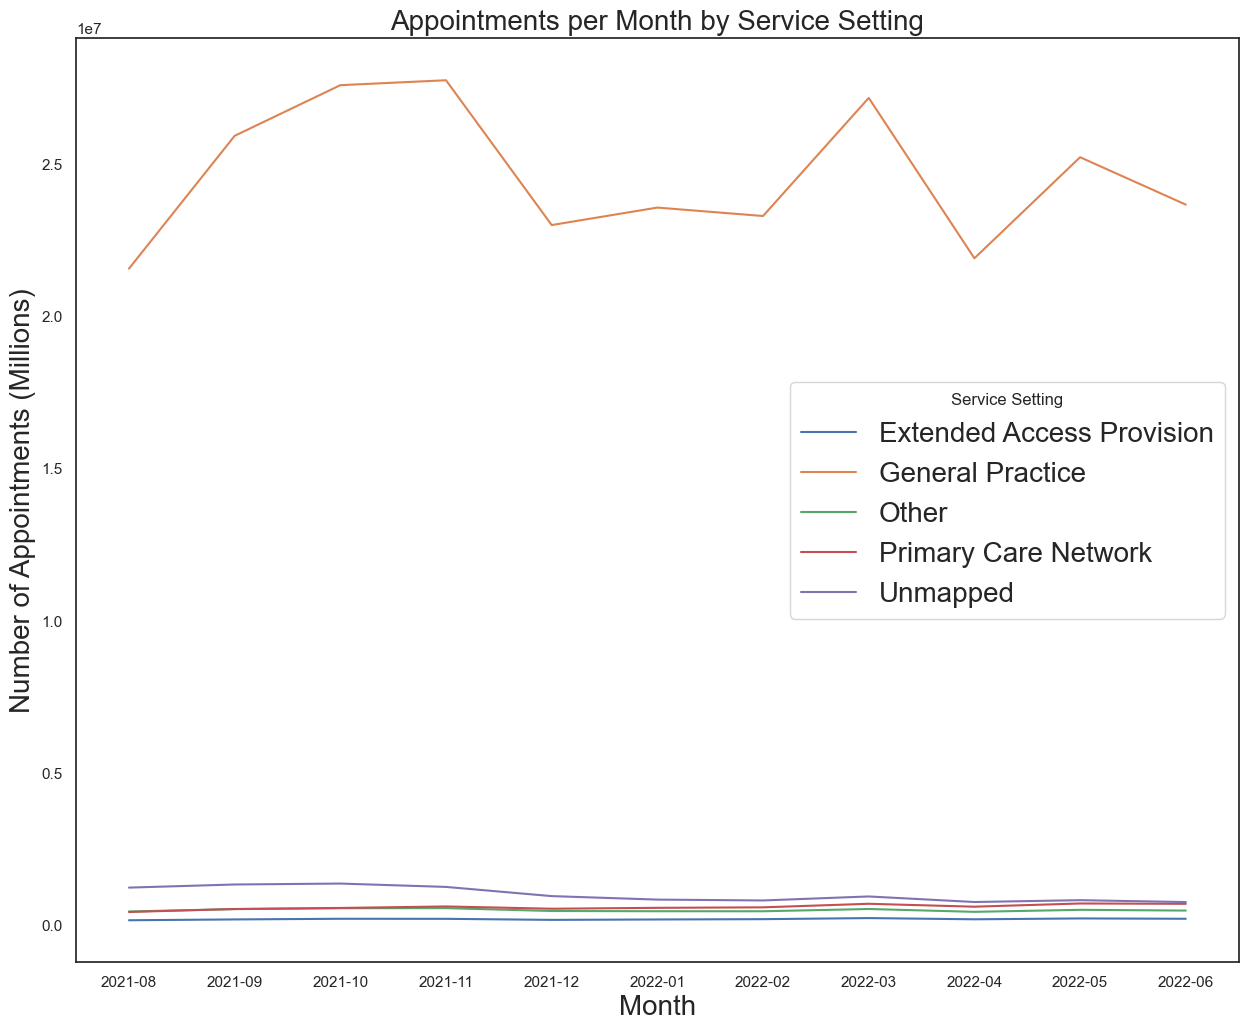

In [38]:
# Looking at specifically the service settings.
# Creating a new DataFrame grouping the appointment month and service setting.

nc_ss = nc.groupby(['appointment_month', 'service_setting']).sum().reset_index()

# Then we can construct the lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue = 'service_setting', data = nc_ss, ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Appointments per Month by Service Setting', size=20)
plt.xlabel('Month', size=20)
plt.ylabel('Number of Appointments (Millions)', size=20)

# Increasing the size of the legend as it is quite small.
plt.legend(title= 'Service Setting', fontsize =20)

# Saving the figure. 
plt.savefig('Appointments per Month by Service Setting', dpi=300, bbox_inches='tight')


**Context types:**

In [39]:
# Create a separate data set that can be used in future weeks. 

nc_ct = nc.groupby(['appointment_month', 'context_type']).sum().reset_index()

# View the output.
nc_ct.head()

appointment_month            context_type  count_of_appointments
0           2021-08  Care Related Encounter               20255235
1           2021-08    Inconsistent Mapping                2363093
2           2021-08                Unmapped                1233843
3           2021-09  Care Related Encounter               24404251
4           2021-09    Inconsistent Mapping                2782135

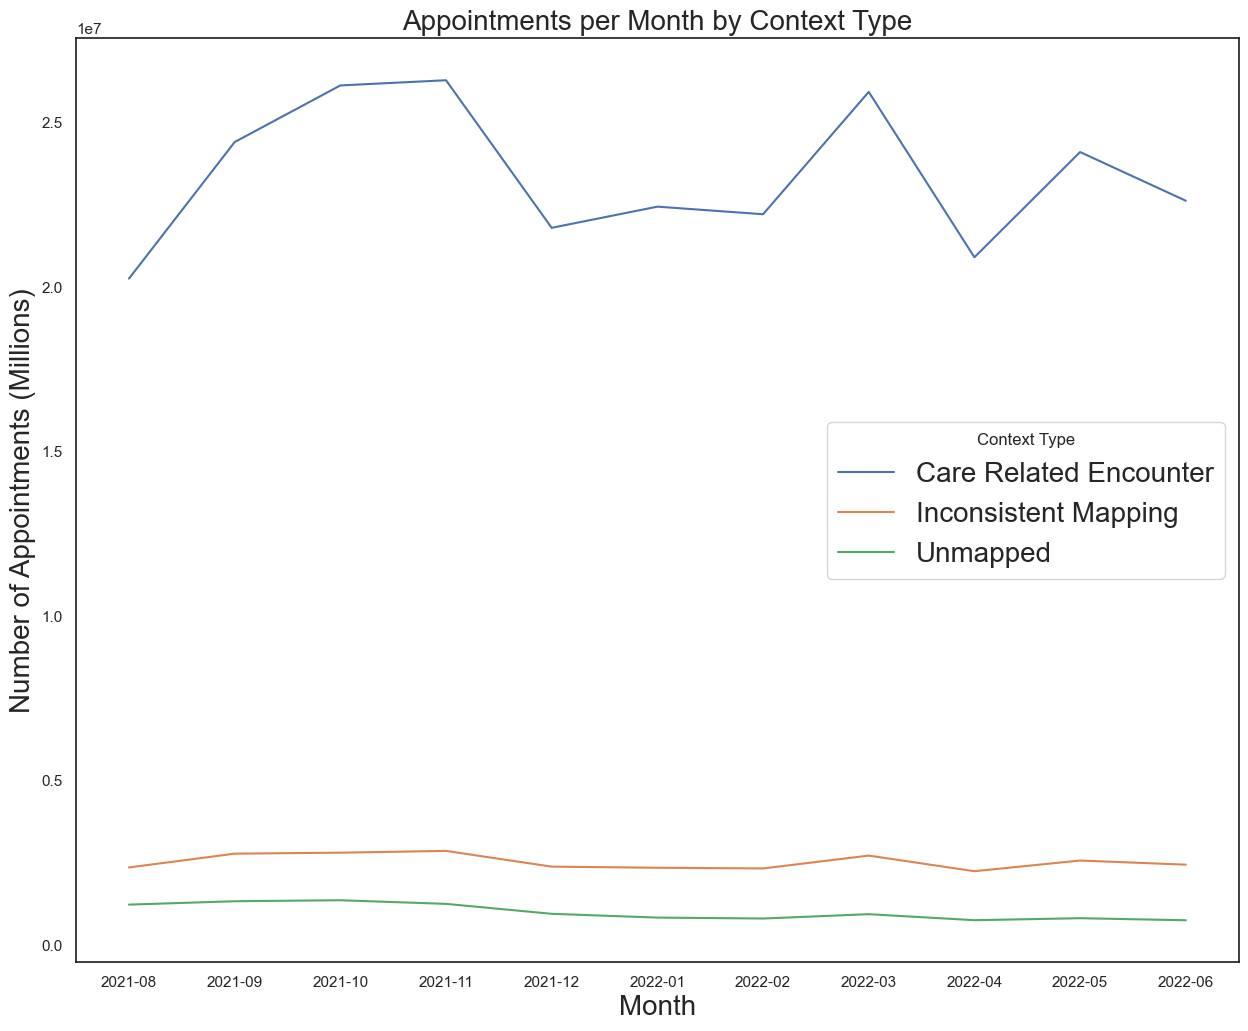

In [40]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue = 'context_type', data = nc_ct, ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Appointments per Month by Context Type', size=20)
plt.xlabel('Month', size=20)
plt.ylabel('Number of Appointments (Millions)', size=20)

# Increasing the size of the legend as it is quite small.
plt.legend(title= 'Context Type', fontsize = 20)

# Saving the figure. 
plt.savefig('Appointments per Month by Context Type', dpi=300, bbox_inches='tight')

**National categories:**

In [41]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc.groupby(['appointment_month', 'national_category']).sum().reset_index()

# View the output.
nc_nc.head(25)

appointment_month                                  national_category  \
0            2021-08  Care Home Needs Assessment & Personalised Care...   
1            2021-08                                    Care Home Visit   
2            2021-08                                    Clinical Triage   
3            2021-08                         General Consultation Acute   
4            2021-08                       General Consultation Routine   
5            2021-08             Group Consultation and Group Education   
6            2021-08                                         Home Visit   
7            2021-08                               Inconsistent Mapping   
8            2021-08                    Non-contractual chargeable work   
9            2021-08             Patient contact during Care Home Round   
10           2021-08                         Planned Clinical Procedure   
11           2021-08                                    Planned Clinics   
12           2021-08  Service provided by organisation external to t...   
13           2021-08                         Social Prescribing Service   
14           2021-08                       Structured Medication Review   
15           2021-08                                           Unmapped   
16           2021-08                        Unplanned Clinical Activity   
17           2021-08                                            Walk-in   
18           2021-09  Care Home Needs Assessment & Personalised Care...   
19           2021-09                                    Care Home Visit   
20           2021-09                                    Clinical Triage   
21           2021-09                         General Consultation Acute   
22           2021-09                       General Consultation Routine   
23           2021-09             Group Consultation and Group Education   
24           2021-09                                         Home Visit   

    count_of_appointments  
0                   29676  
1                   47583  
2                 3704207  
3                 4280920  
4                 7756045  
5                    5161  
6                  165061  
7                 2363093  
8                   10775  
9                   31316  
10                1701814  
11                2007880  
12                  69206  
13                  31486  
14                 138570  
15                1233843  
16                 241523  
17                  34012  
18                  33503  
19                  53519  
20                4118862  
21                4834413  
22                9060243  
23                   5892  
24                 188756

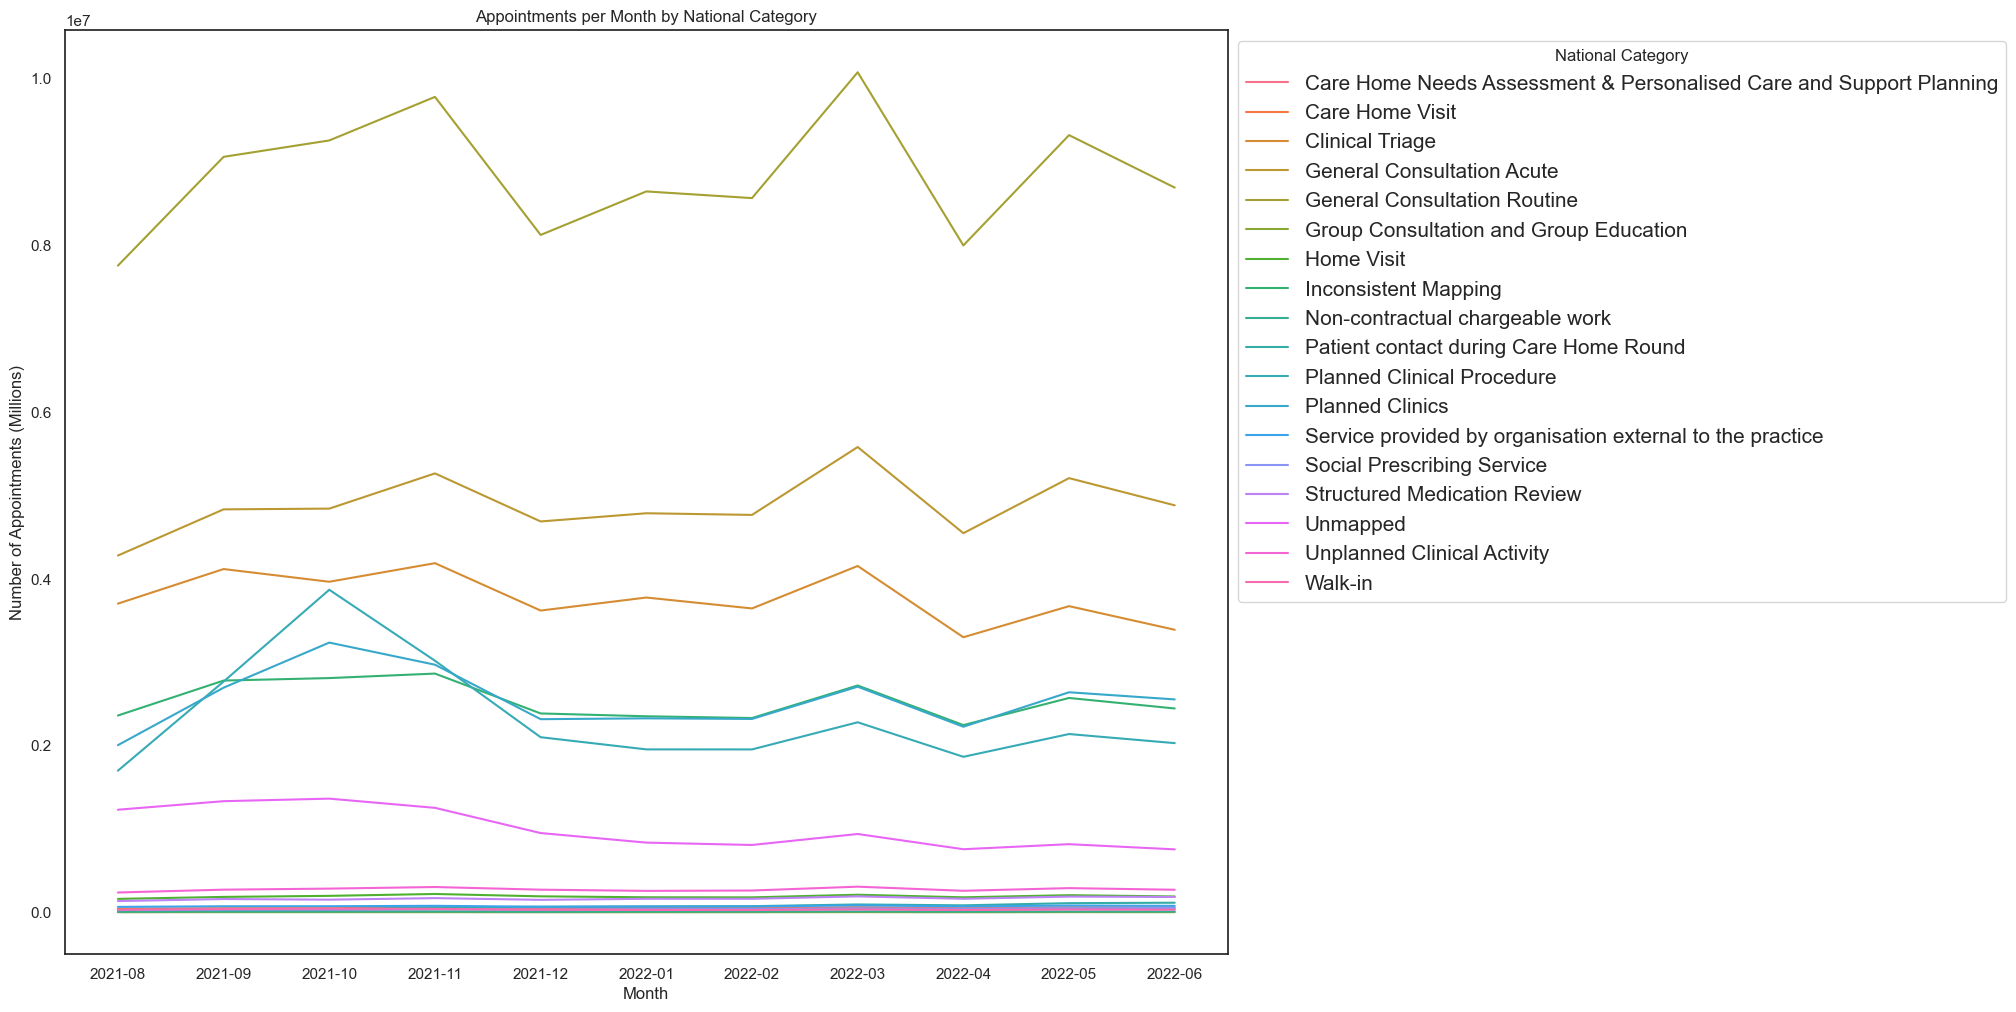

In [42]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue = 'national_category', data = nc_nc, ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Appointments per Month by National Category')
plt.xlabel('Month')
plt.ylabel('Number of Appointments (Millions)')

# Adjusting the position of the legend.
plt.legend(title= 'National Category', fontsize = 15, bbox_to_anchor=(1, 1))

# Saving the figure. 
plt.savefig('Appointments per Month by National Category', dpi=300, bbox_inches='tight')


### Objective 2
Create four visualisations indicating the number of appointments for service setting per season.

**Summer:**


In [43]:
# Create a separate data set that can be used in future weeks. 
# Filter by Summer months first.
nc_sum = nc[(nc['appointment_month']>= '2021-06') &\
           (nc['appointment_month']<='2021-08')]

# Using the filtered DataFrame, we can now apply the groupby function.
nc_ss_day = nc_sum.groupby(['appointment_date','service_setting']).sum().reset_index()

# View the output.
print(nc_ss_day.shape)
nc_ss_day.head()

(155, 3)


appointment_date            service_setting  count_of_appointments
0       2021-08-01  Extended Access Provision                    438
1       2021-08-01           General Practice                   3411
2       2021-08-01                      Other                    401
3       2021-08-01       Primary Care Network                    323
4       2021-08-01                   Unmapped                   1054

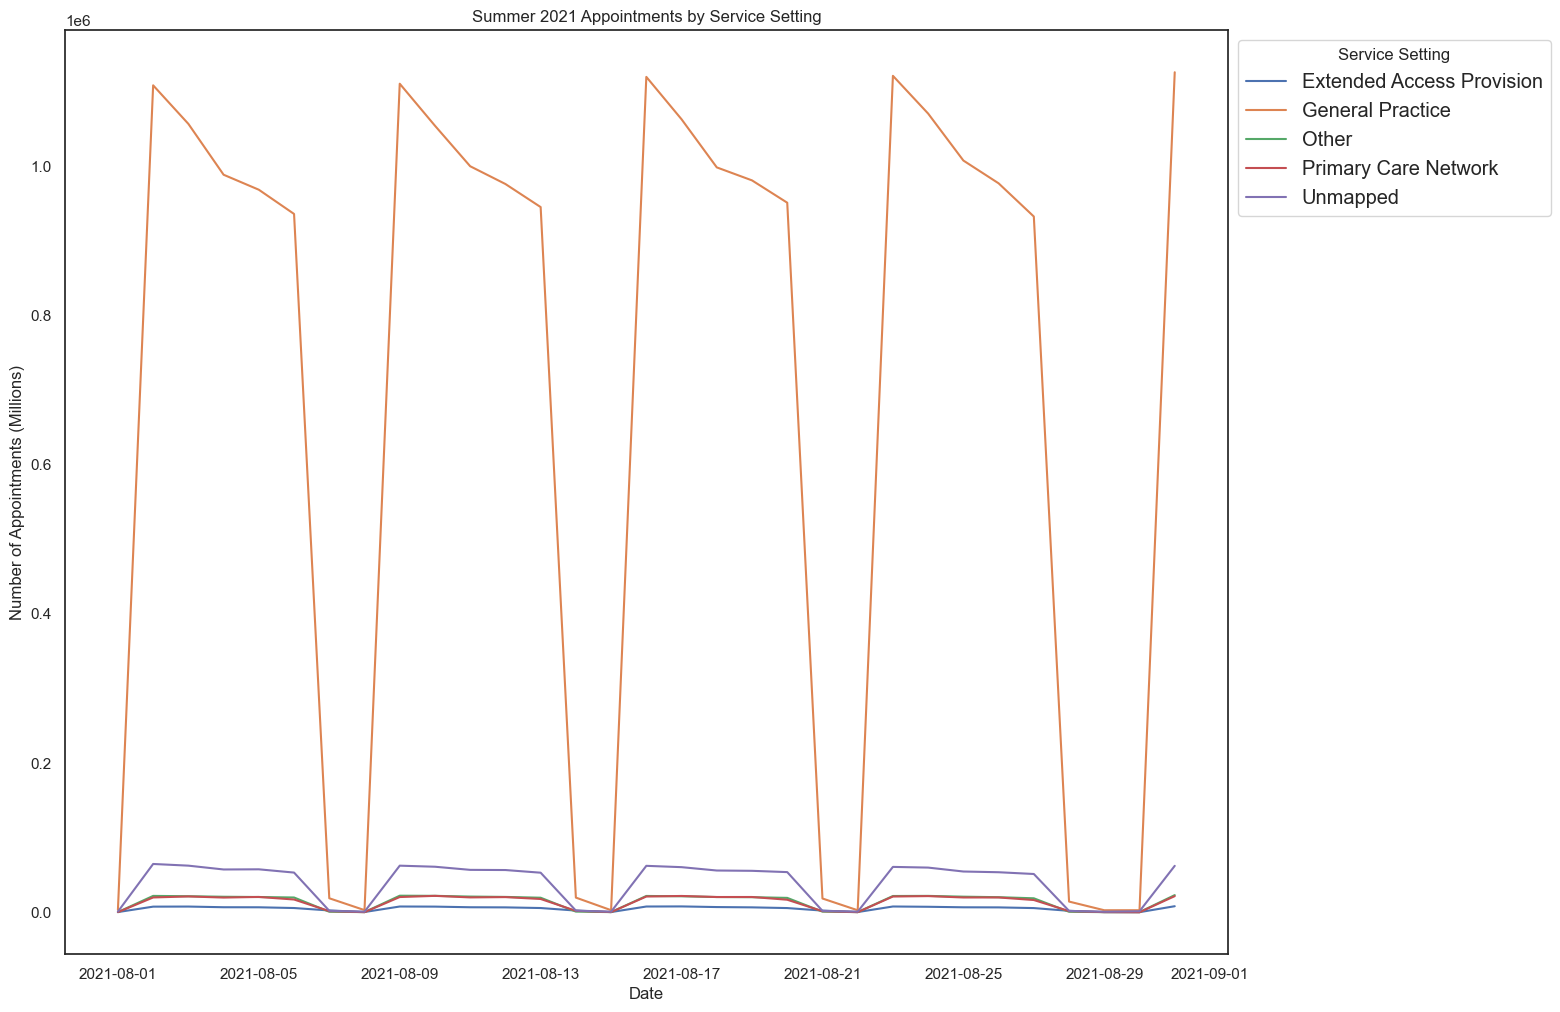

In [44]:
# Visualise the subset using a lineplot.

sns.lineplot(x='appointment_date', y='count_of_appointments', hue = 'service_setting', data = nc_ss_day, ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Summer 2021 Appointments by Service Setting')
plt.xlabel('Date')
plt.ylabel('Number of Appointments (Millions)')

# Increasing the size of the legend as it is quite small.
plt.legend(title= 'Service Setting', fontsize = 'large', bbox_to_anchor=(1, 1), loc='upper left')


**Autumn:**

In [45]:
# Create a separate data set that can be used in future weeks. 
# Filter by Autumn months first.
nc_aut = nc[(nc['appointment_month']>= '2021-09') &\
           (nc['appointment_month']<='2021-11')]

# Using the filtered DataFrame, we can now apply the groupby function.
nc_ss_day = nc_aut.groupby(['appointment_date','service_setting']).sum().reset_index()

# View the output.
print(nc_ss_day.shape)
nc_ss_day.head()

(455, 3)


appointment_date            service_setting  count_of_appointments
0       2021-09-01  Extended Access Provision                   6916
1       2021-09-01           General Practice                1041879
2       2021-09-01                      Other                  21796
3       2021-09-01       Primary Care Network                  21371
4       2021-09-01                   Unmapped                  57423

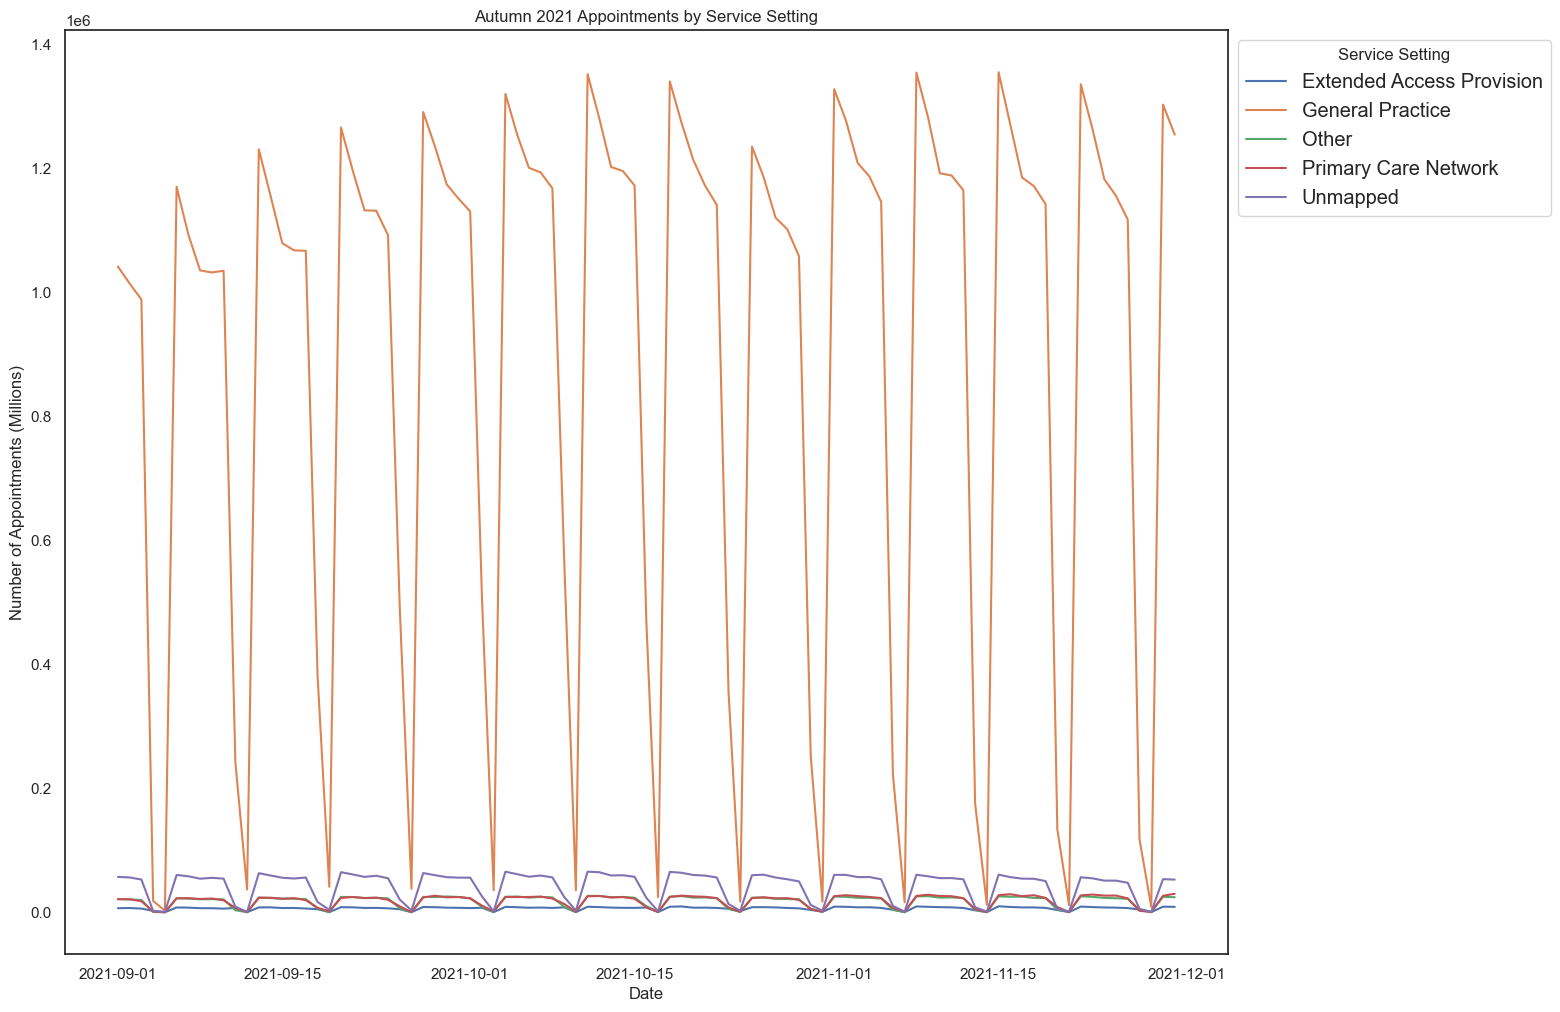

In [46]:
# Visualise the subset using a lineplot.

sns.lineplot(x='appointment_date', y='count_of_appointments', hue = 'service_setting', data = nc_ss_day, ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Autumn 2021 Appointments by Service Setting')
plt.xlabel('Date')
plt.ylabel('Number of Appointments (Millions)')

# Increasing the size of the legend as it is quite small.
plt.legend(title= 'Service Setting', fontsize = 'large', bbox_to_anchor=(1, 1), loc='upper left')


**Winter:**

In [47]:
# Create a separate data set that can be used in future weeks. 
# Filter by Winter months first.
nc_win = nc[(nc['appointment_month']>= '2021-12') &\
           (nc['appointment_month']<='2022-02')]

# Using the filtered DataFrame, we can now apply the groupby function.
nc_ss_day = nc_win.groupby(['appointment_date','service_setting']).sum().reset_index()

# View the output.
print(nc_ss_day.shape)
nc_ss_day.head()

(450, 3)


appointment_date            service_setting  count_of_appointments
0       2021-12-01  Extended Access Provision                   8500
1       2021-12-01           General Practice                1162676
2       2021-12-01                      Other                  22924
3       2021-12-01       Primary Care Network                  26887
4       2021-12-01                   Unmapped                  49064

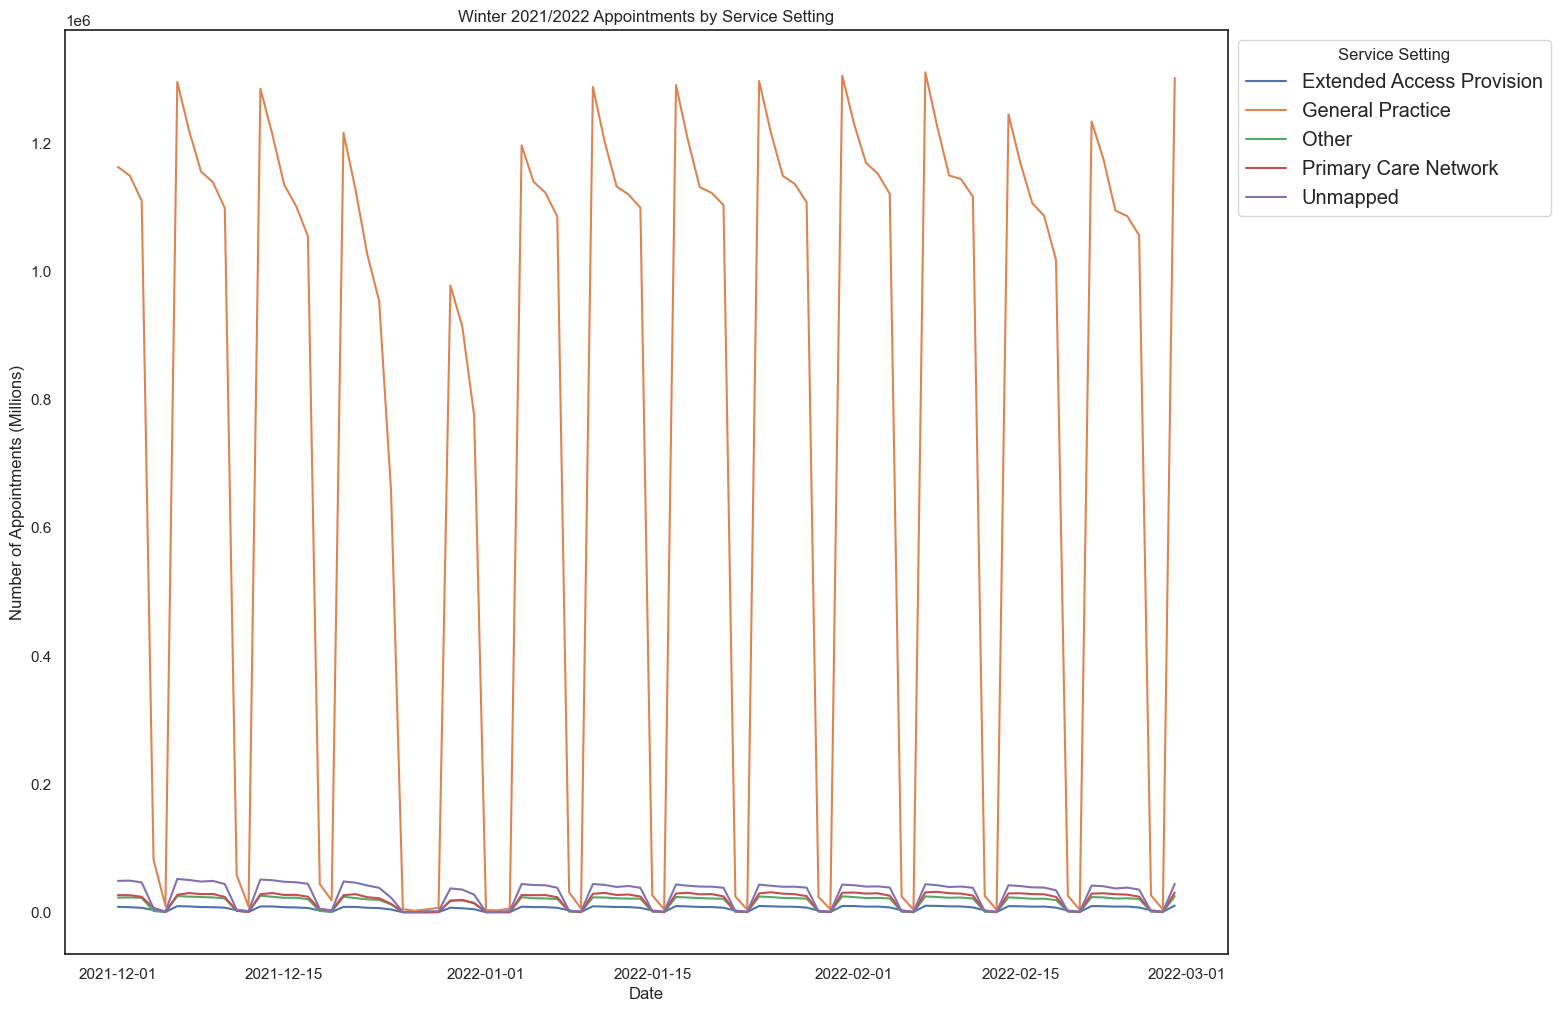

In [48]:
# Visualise the subset using a lineplot.

sns.lineplot(x='appointment_date', y='count_of_appointments', hue = 'service_setting', data = nc_ss_day, ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Winter 2021/2022 Appointments by Service Setting')
plt.xlabel('Date')
plt.ylabel('Number of Appointments (Millions)')

# Increasing the size of the legend as it is quite small.
plt.legend(title= 'Service Setting', fontsize = 'large', bbox_to_anchor=(1, 1), loc='upper left')


**Spring:**

In [49]:
# Create a separate data set that can be used in future weeks. 
# Filter by Autumn months first.
nc_spr = nc[(nc['appointment_month']>= '2022-03') &\
           (nc['appointment_month']<='2022-05')]

# Using the filtered DataFrame, we can now apply the groupby function.
nc_ss_day = nc_spr.groupby(['appointment_date','service_setting']).sum().reset_index()

# View the output.
print(nc_ss_day.shape)
nc_ss_day.head()

(460, 3)


appointment_date            service_setting  count_of_appointments
0       2022-03-01  Extended Access Provision                  10082
1       2022-03-01           General Practice                1229045
2       2022-03-01                      Other                  23986
3       2022-03-01       Primary Care Network                  32070
4       2022-03-01                   Unmapped                  42682

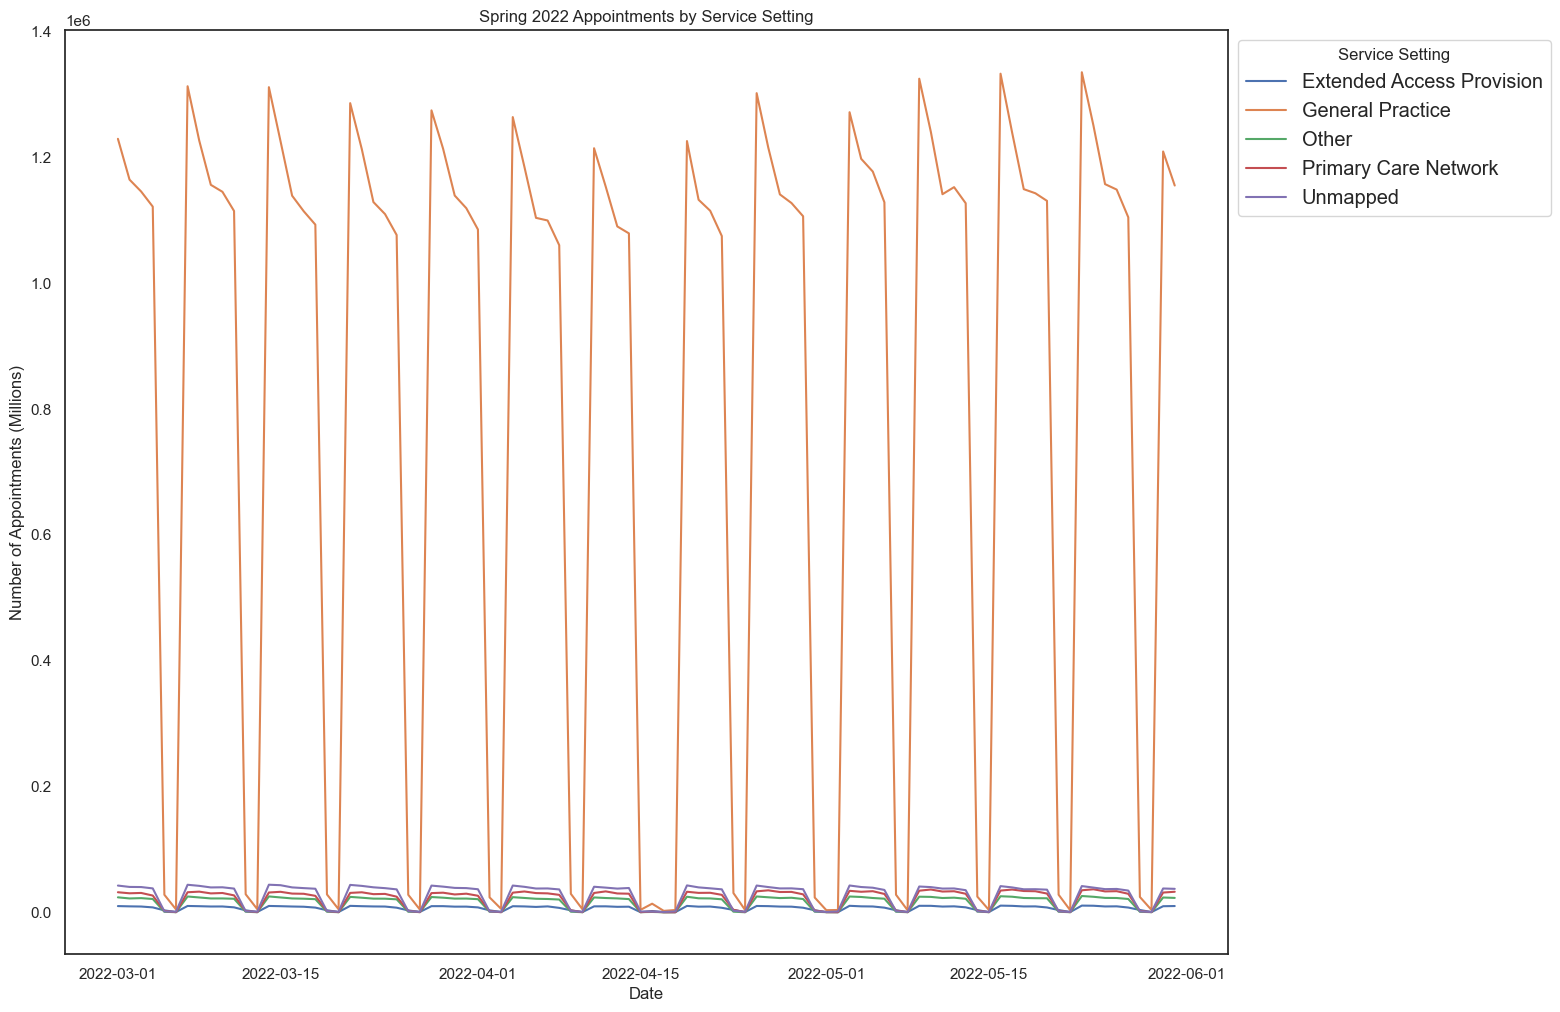

In [50]:
# Visualise the subset using a lineplot.

sns.lineplot(x='appointment_date', y='count_of_appointments', hue = 'service_setting', data = nc_ss_day, ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Spring 2022 Appointments by Service Setting')
plt.xlabel('Date')
plt.ylabel('Number of Appointments (Millions)')

# Increasing the size of the legend as it is quite small.
plt.legend(title= 'Service Setting', fontsize = 'large', bbox_to_anchor=(1, 1), loc='upper left')


> ***Check*** that you have adequately satisfied the expectations of the current module and that you have added code comments as well as Markdown cells documenting your analytic journey and observations to satisfy the assessment criteria.

# 

### Analysing tweets from Twitter with hashtags related to healthcare in the UK.

In [51]:
# Libraries and settings needed for analysis.
import pandas as pd
import seaborn as sns

# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200

In [52]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   
1  {'iso_language_code': 'en', 'result_type': 'recent'}                    2   
2  {'iso_language_code': 'en', 'result_type': 'recent'}                   39   
3  {'iso_language_code': 'en', 'result_type': 'recent'}                    5   
4  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4           

In [53]:
# Explore the metadata and data set.
print(tweets.shape)
print(tweets.info())
tweets.describe()

(1174, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None


tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000

In [54]:
# Would it be useful to only look at retweeted and favourite tweet messages?


retweet_data = tweets['tweet_retweet_count'].value_counts().reset_index()
retweet_data.columns = ['Retweet_Count', 'Frequency']


favourite_data = tweets['tweet_favorite_count'].value_counts().reset_index()
favourite_data.columns = ['Favourite_Count', 'Frequency']


print(retweet_data.sort_values(by='Retweet_Count', ascending=False))
print(favourite_data.sort_values(by='Favourite_Count', ascending=False))


# Explain your answer.
# These columns alone are not useful as they only indicate that degree to which some tweets received amplification.
# To extract real value out of them, we would need to filter/restrict the dataset to include only UK/England/NHS infomation.
# We could then run the same process as above to view the most popular tweets and read them to identify common themes.


    Retweet_Count  Frequency
42            303          1
12            208         12
25            207          3
46            169          1
19            150          4
36            107          1
22             85          3
38             79          1
27             78          2
21             76          3
9              73         14
30             72          2
26             68          3
20             63          4
24             62          3
43             57          1
45             54          1
17             53          5
33             49          1
34             48          1
18             44          4
23             41          3
44             40          1
40             39          1
14             37          6
13             35         10
29             24          2
28             23          2
39             20          1
41             19          1
31             16          2
35             15          1
37             14          1
32            

In [55]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text', 'tweet_entities_hashtags']]
tweets_text= tweets_text[['tweet_full_text', 'tweet_entities_hashtags']]

# View the DataFrame.
tweets_text.head()

tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                              tweet_entities_hashtags  
0                                                                         #Healthcare  
1                                                             #PremiseHealth, #hiring  
2                                                                         #Healthcare  
3                                                                                #NEW  
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare

In [56]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []
for y in [x.split(' ') for x in tweets_text['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [57]:
# Display the first 30 records.
tags[:30]

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare']

In [58]:
# Adding in the counts.
toptags = pd.Series(tags).value_counts()

print(toptags.head(30))

# Convert the series to a DataFrame in preparation for visualisation.
toptags = pd.DataFrame(toptags.reset_index())
toptags.columns = ['word', 'count']

# Rename the columns.
toptags.head()

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

word  count
0  #healthcare    716
1      #health     80
2    #medicine     41
3          #ai     40
4         #job     38

In [59]:
# Fix the count datatype.
toptags['count'] = toptags['count'].astype(int)
# View the result.
print(toptags.dtypes)

word     object
count     int32
dtype: object


In [60]:
# Display records where the count is larger than 10.
toptags[toptags['count']>10]

word  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                #digitalhealth     25
9                       #pharma     25
10                   #marketing     25
11                  #medtwitter     24
12                     #biotech     24
13     #competitiveintelligence     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18             #machinelearning     17
19                  #technology     17
20                 #coronavirus     16
21             #womeninmedicine     16
22                       #covid     16
23        #competitivemarketing     16
24                    #wellness     15
25                  #healthtech     15
26  #doctorofveterinarymedicine     14
27                     #science     14
28                    #medicare     14
29                     #covid19     14
30                #telemedicine     13
31                 #healthcare.     13
32                        #tech     13
33                      #foamed     13
34                 #patientcare     13
35                   #education     13
36                      #doctor     12
37                #mentalhealth     12
38                   #hospitals     12
39                  #innovation     11
40                  #telehealth     11
41                 #healthcare?     11
42                #healthcareit     11
43                         #usa     11
44                      #nurses     11
45     drugs\n\n#tipsfornewdocs     11
46       #digitaltransformation     11

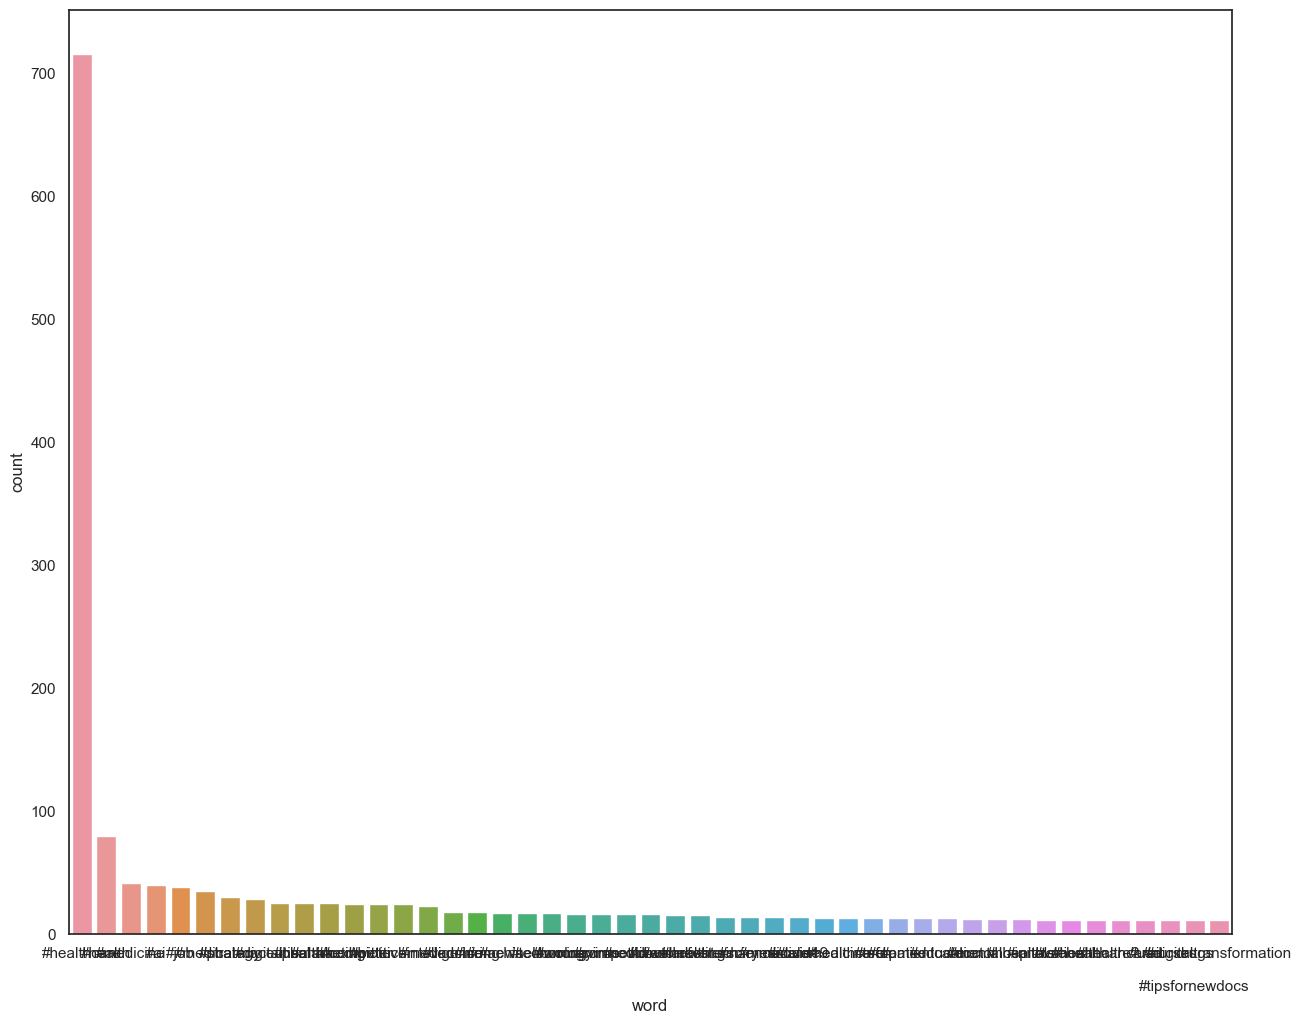

In [61]:
# Create a Seaborn barplot displaying records with a count larger than 10.
ax = sns.barplot(x='word', y='count', data=toptags[toptags['count']>10])


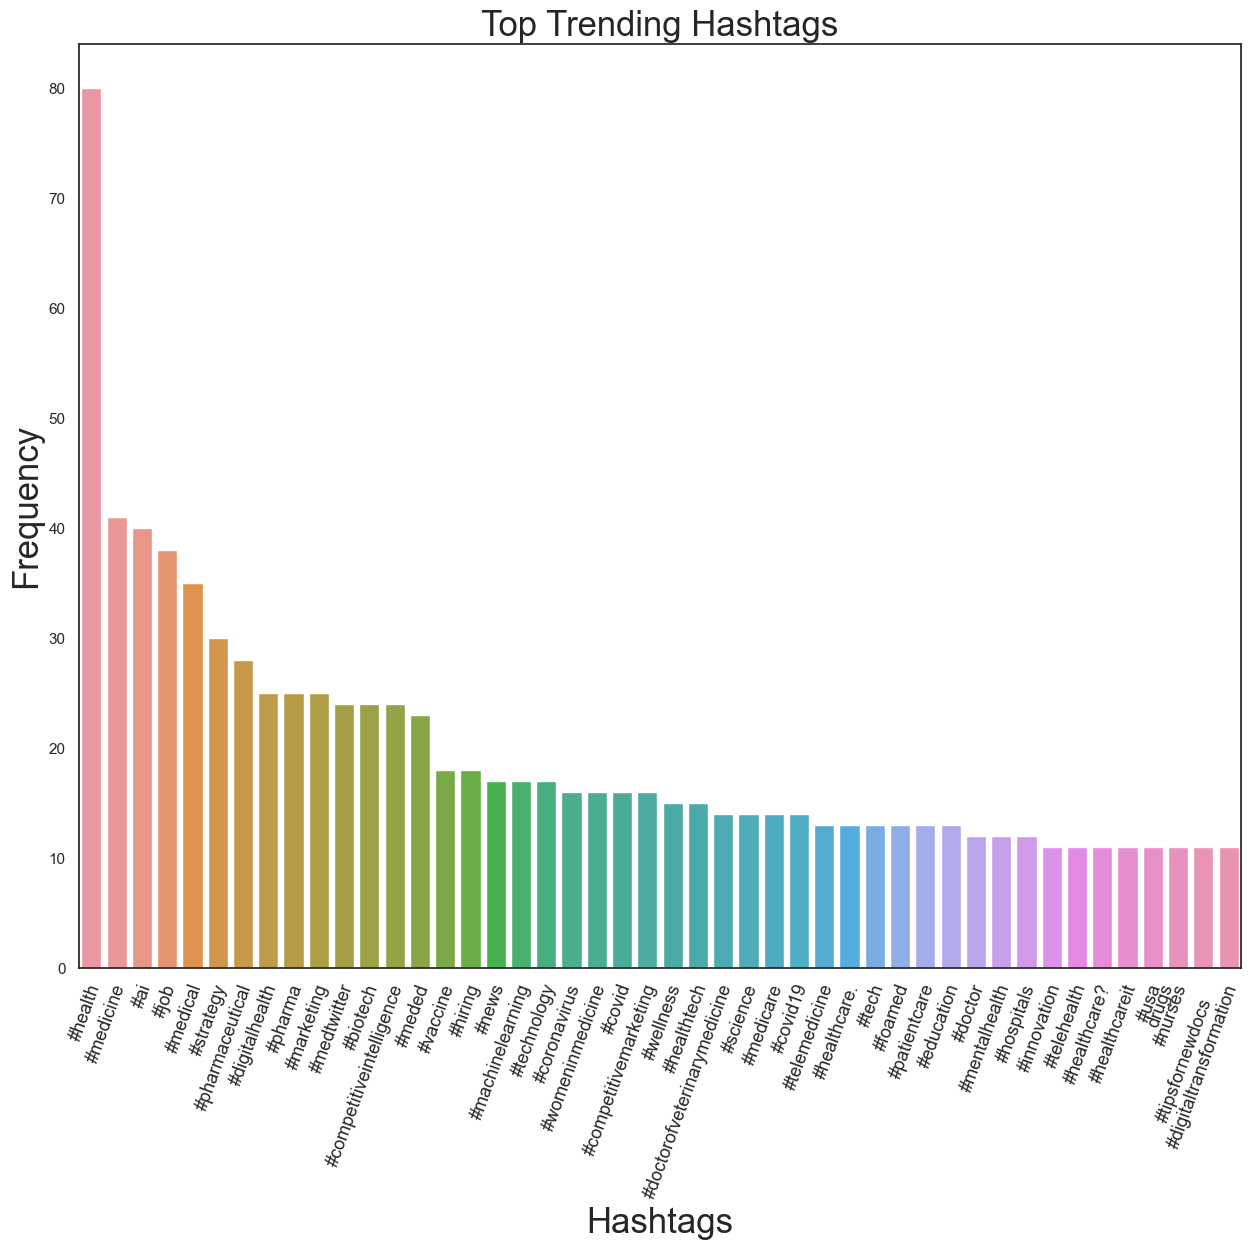

In [62]:
# Removing the #healthcare hashtag, which is vastly overrepresented, from the underlying dataframe used in the plot.
# I will call it toptagsrel (top tags relevant).
toptagsrel = toptags[(toptags['word']!= '#healthcare') & (toptags['count']>10)]


# Create the plot.
ax = sns.barplot(x='word', y='count', data=toptagsrel)

# Rotate the Hashtag names so we can actually read them.
plt.xticks(rotation=70)

# We will need to set the 'Word' labels to attach to the x axis at their end, otherwise they will overlap still.
# We need matplotlib for this but it was imported earlier.
# Shift the labels slightly to the right.
ax.set_xticks(ax.get_xticks() + 0.5)
# Orientate the labels.
ax.set_xticklabels(toptagsrel['word'], ha='right', fontsize=13)

# Title and labels
plt.title('Top Trending Hashtags', size=25)
plt.xlabel('Hashtags', size=25)
plt.ylabel('Frequency', size=25)

# Saving the figure. 
plt.savefig('Top Trending Hashtags', dpi=300, bbox_inches='tight')

# View the barplot.
plt.show()

# 

### Investigate the main concerns posed by the NHS. 

In [63]:
# Prepare your workstation.
# Load the appointments_regional.csv file.


# View the DataFrame.
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [64]:
# Print the min and max dates.
ar_max_date = ar[['appointment_month']].max()
ar_min_date = ar[['appointment_month']].min()


print(f"The data ranges from {ar_min_date.to_string(index=False)} to {ar_max_date.to_string(index=False)}.")

The data ranges from 2020-01 to 2022-06.


In [65]:
# Filter the data set to only look at data from 2021-08 onwards.
# Restricting data to just post lockdown. We will name the new DataFrame, arpld, ar 'post lockdown'.
arpld = ar[ar['appointment_month']>='2021-08'].reset_index(drop=True)

arpld.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2021-08           Attended       GP     Face-to-Face   
1    E54000034           2021-08           Attended       GP     Face-to-Face   
2    E54000034           2021-08           Attended       GP     Face-to-Face   
3    E54000034           2021-08           Attended       GP     Face-to-Face   
4    E54000034           2021-08           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   6553  
1                    15  to 21 Days                   2390  
2                       2 to 7 Days                  10547  
3                    22  to 28 Days                    937  
4                     8  to 14 Days                   4961

**Question 1:** Should the NHS start looking at increasing staff levels? 

In [66]:
# Create an aggregated data set to review the different features.
arpld = arpld.groupby(['appointment_month', 'hcp_type', 'appointment_status', 
                       'appointment_mode', 'time_between_book_and_appointment']).sum().reset_index()


# View the DataFrame.
arpld

appointment_month hcp_type appointment_status appointment_mode  \
0              2021-08       GP           Attended     Face-to-Face   
1              2021-08       GP           Attended     Face-to-Face   
2              2021-08       GP           Attended     Face-to-Face   
3              2021-08       GP           Attended     Face-to-Face   
4              2021-08       GP           Attended     Face-to-Face   
...                ...      ...                ...              ...   
3749           2022-06  Unknown            Unknown          Unknown   
3750           2022-06  Unknown            Unknown          Unknown   
3751           2022-06  Unknown            Unknown          Unknown   
3752           2022-06  Unknown            Unknown          Unknown   
3753           2022-06  Unknown            Unknown     Video/Online   

     time_between_book_and_appointment  count_of_appointments  
0                                1 Day                 507835  
1                       15  to 21 Days                 194726  
2                          2 to 7 Days                 959486  
3                       22  to 28 Days                 102111  
4                        8  to 14 Days                 398772  
...                                ...                    ...  
3749                     8  to 14 Days                   5494  
3750                 More than 28 Days                   5115  
3751                          Same Day                   1914  
3752            Unknown / Data Quality                     53  
3753                       2 to 7 Days                      1  

[3754 rows x 6 columns]

In [67]:
# Determine the total number of appointments per month.
arpld_util = arpld.groupby(['appointment_month']).sum().reset_index()

# Add a new column to indicate the average utilisation of services.
arpld_util['budgeted_utilisation'] = 1200000

# Monthly aggregate / 30 to get to a daily value.
arpld_util['utilisation'] = arpld_util['count_of_appointments']/30

arpld_util['utilisation'] = round(arpld_util['utilisation'], 2)

# View the DataFrame.
arpld_util

appointment_month  count_of_appointments  budgeted_utilisation  utilisation
0            2021-08               23852171               1200000    795072.37
1            2021-09               28522501               1200000    950750.03
2            2021-10               30303834               1200000   1010127.80
3            2021-11               30405070               1200000   1013502.33
4            2021-12               25140776               1200000    838025.87
5            2022-01               25635474               1200000    854515.80
6            2022-02               25355260               1200000    845175.33
7            2022-03               29595038               1200000    986501.27
8            2022-04               23913060               1200000    797102.00
9            2022-05               27495508               1200000    916516.93
10           2022-06               25828078               1200000    860935.93

<b>Adding in the below piece of code to affect the subsequent plots.

In [68]:
# Simple hacks to make plots look better: 
# # Colour palette to make charts look better.
blue, = sns.color_palette("muted", 1) 

# Dark grid, white grid, dark, white, and ticks.
sns.set_style('whitegrid') 

# Font size of the axes titles.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Font size of the Legend.
plt.rc('legend', fontsize=13)

# Default text size.
plt.rc('font', size=13)  

Text(0, 0.5, 'Number of Appointments (Millions)')

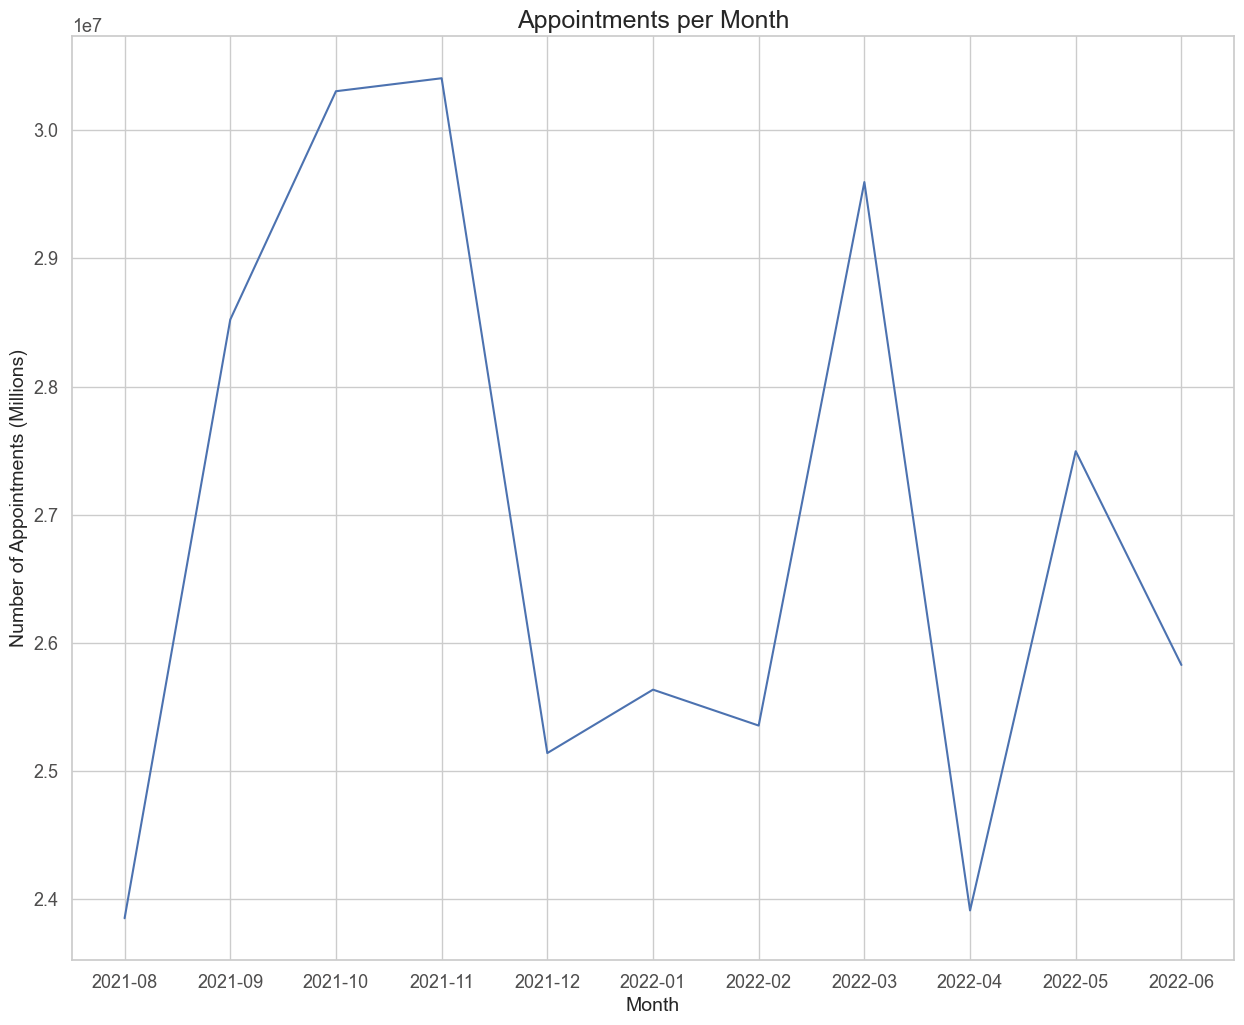

In [69]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
arpld_util['appointment_month'] = arpld_util['appointment_month'].astype(str)

# Create a lineplot with Seaborn.

sns.lineplot(x='appointment_month', y='count_of_appointments', data = arpld_util, ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Appointments per Month')
plt.xlabel('Month')
plt.ylabel('Number of Appointments (Millions)')

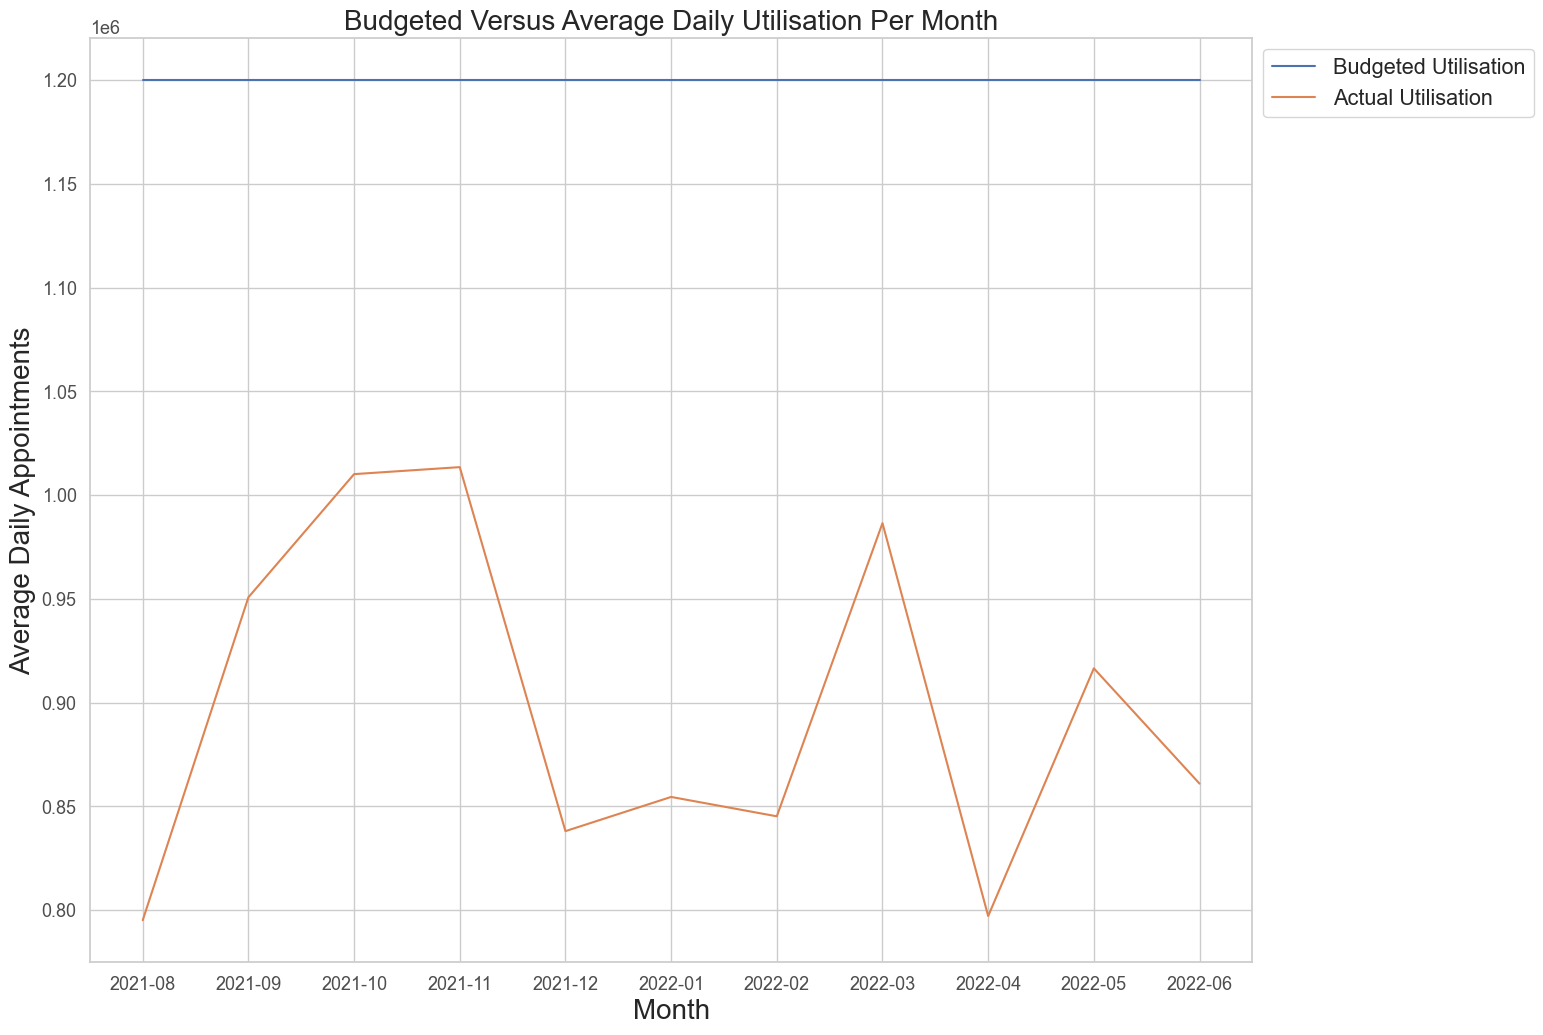

In [70]:
# Plot monthly capacity utilisation.
# In this plot we are plotting actual utilisation versus budgeted utilisation.

sns.lineplot(x='appointment_month', y='budgeted_utilisation', data = arpld_util, label = 'Budgeted Utilisation', ci=None)
sns.lineplot(x='appointment_month', y='utilisation', data = arpld_util, label='Actual Utilisation', ci=None)


# Adding a title and changing the axis names to be more relatable.
plt.title('Budgeted Versus Average Daily Utilisation Per Month', size=20)
plt.xlabel('Month', size=20)
plt.ylabel('Average Daily Appointments', size =20)
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1))

# Saving the figure. 
plt.savefig('Budgeted Versus Average Daily Utilisation Per Month', dpi=300, bbox_inches='tight')


**Question 2:** How do the healthcare professional types differ over time?

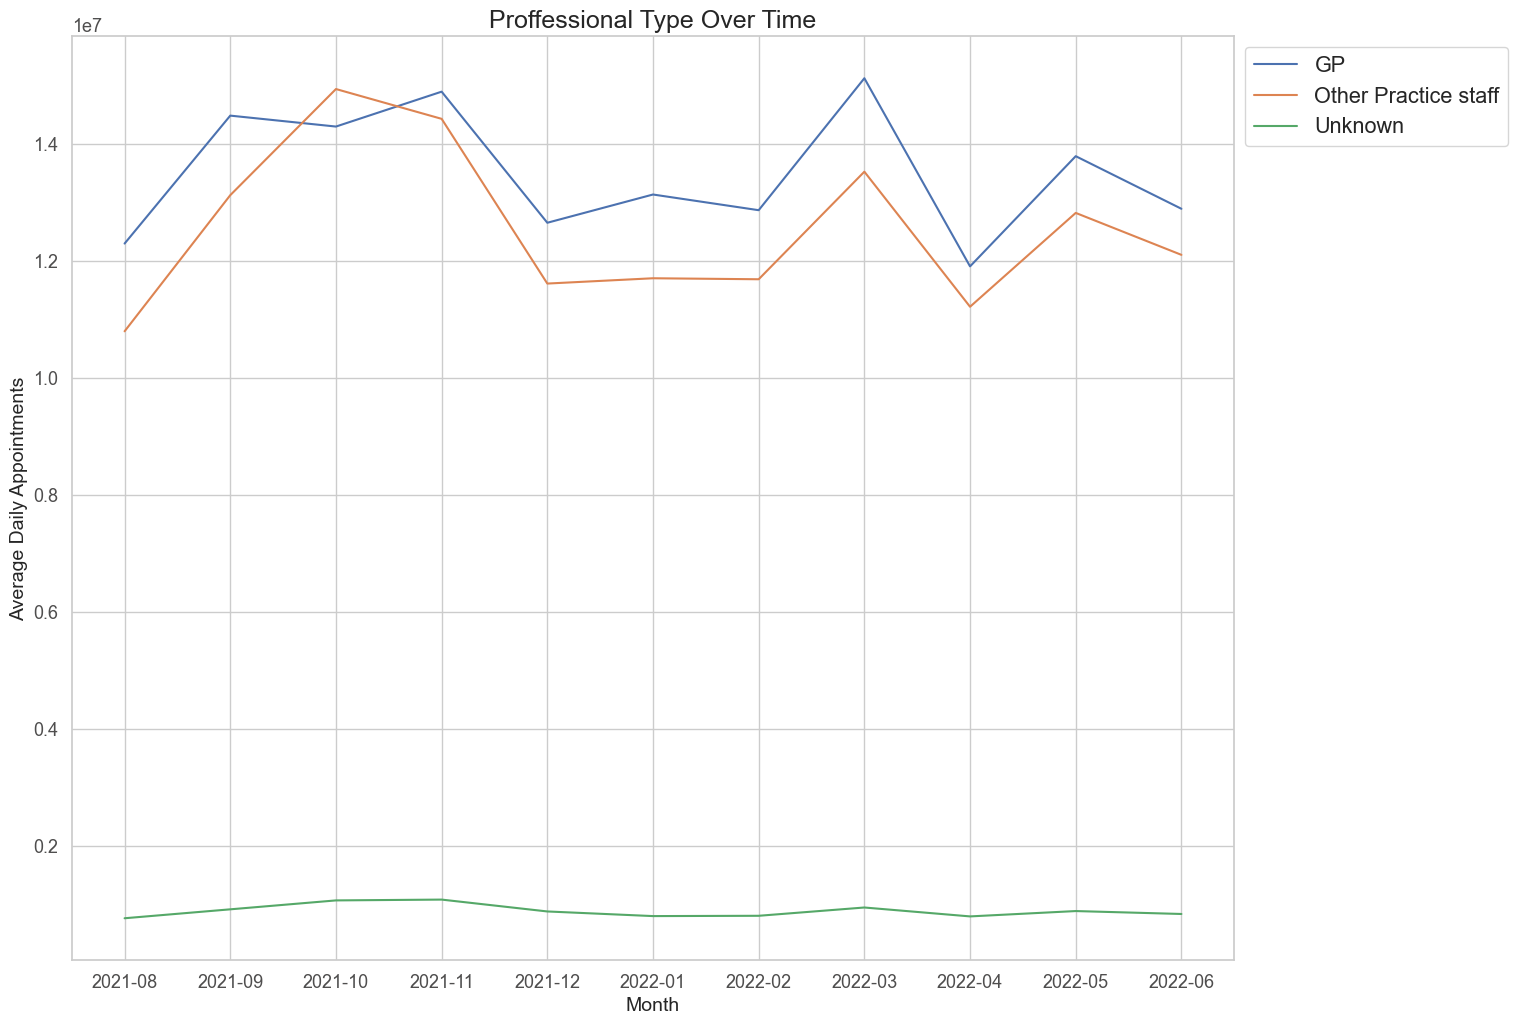

In [71]:
# Create a lineplot to answer the question.
arpld_prof = arpld.groupby(['appointment_month', 'hcp_type']).sum().reset_index()

# Side note: I just ran the below side check code to check whether I should exclude unknowns.
# There are 'Unknown' hcp_types that were attended, so I shouldn't.
# sense_check = arpld[(arpld['hcp_type'] == 'Unknown') & (arpld['appointment_status'] == 'Attended')]
# sense_check

arpld_prof['appointment_month'] = arpld_prof['appointment_month'].astype(str)

sns.lineplot(x='appointment_month', y='count_of_appointments', data = arpld_prof, hue = 'hcp_type', ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Proffessional Type Over Time')
plt.xlabel('Month')
plt.ylabel('Average Daily Appointments')
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1))

# Saving the figure. 
plt.savefig('Proffessional Type Over Time', dpi=300, bbox_inches='tight')

**Question 3:** Are there significant changes in whether or not visits are attended?

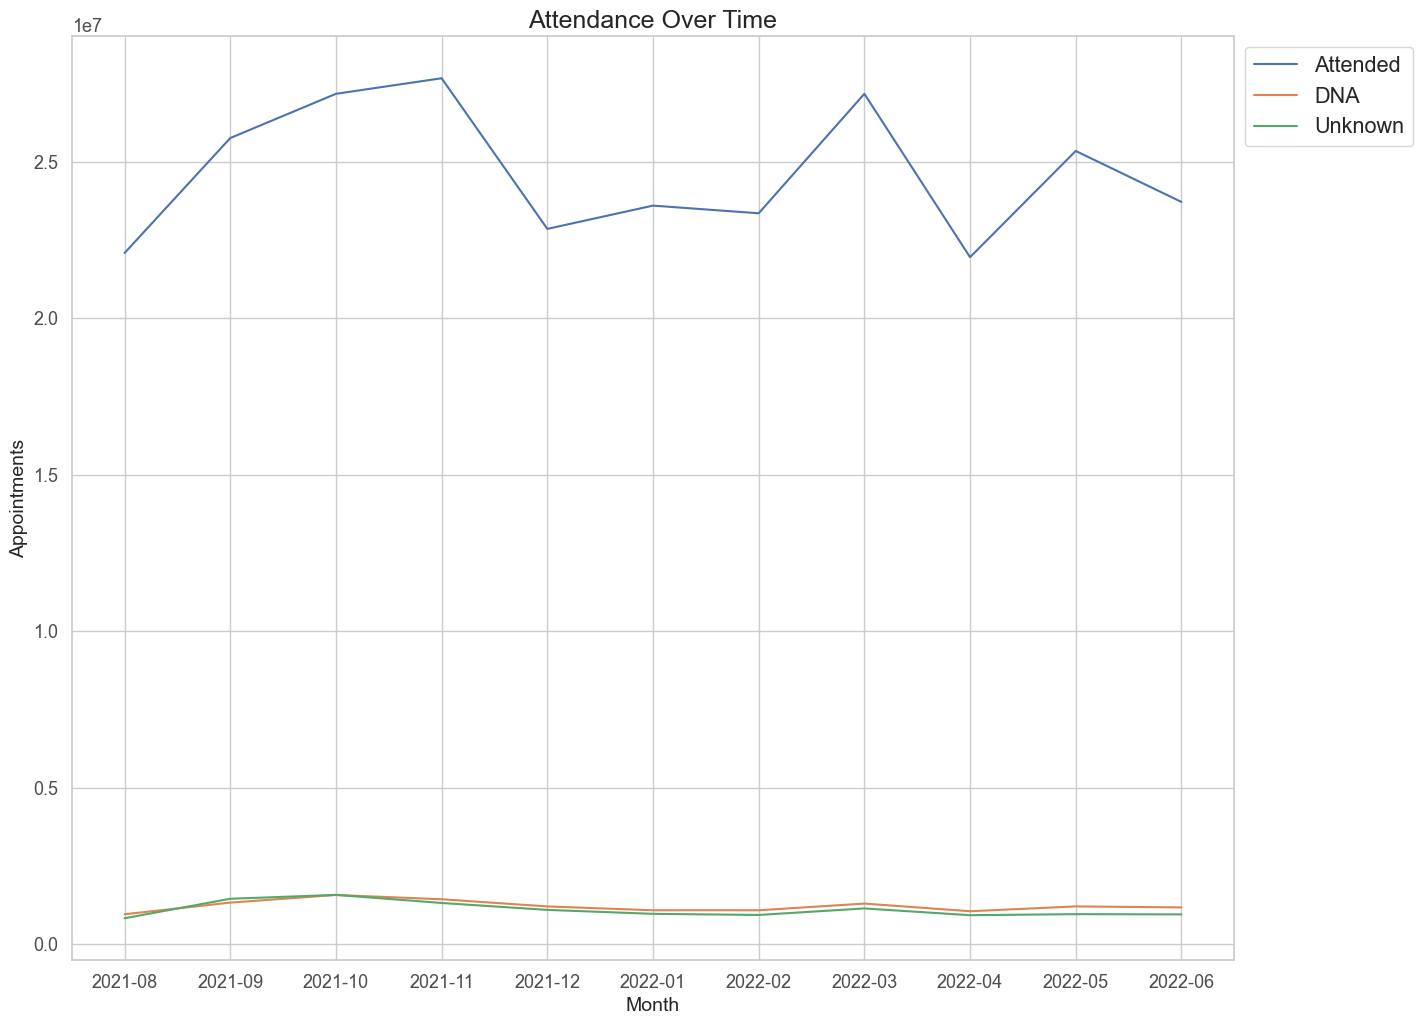

In [72]:
# Create a lineplot to answer the question.
arpld_attend = arpld.groupby(['appointment_month', 'appointment_status']).sum().reset_index()

arpld_attend['appointment_month'] = arpld_attend['appointment_month'].astype(str)

sns.lineplot(x='appointment_month', y='count_of_appointments', data = arpld_attend, hue = 'appointment_status', ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Attendance Over Time')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1))

**Question 4:** Are there changes in terms of appointment type and the busiest months?

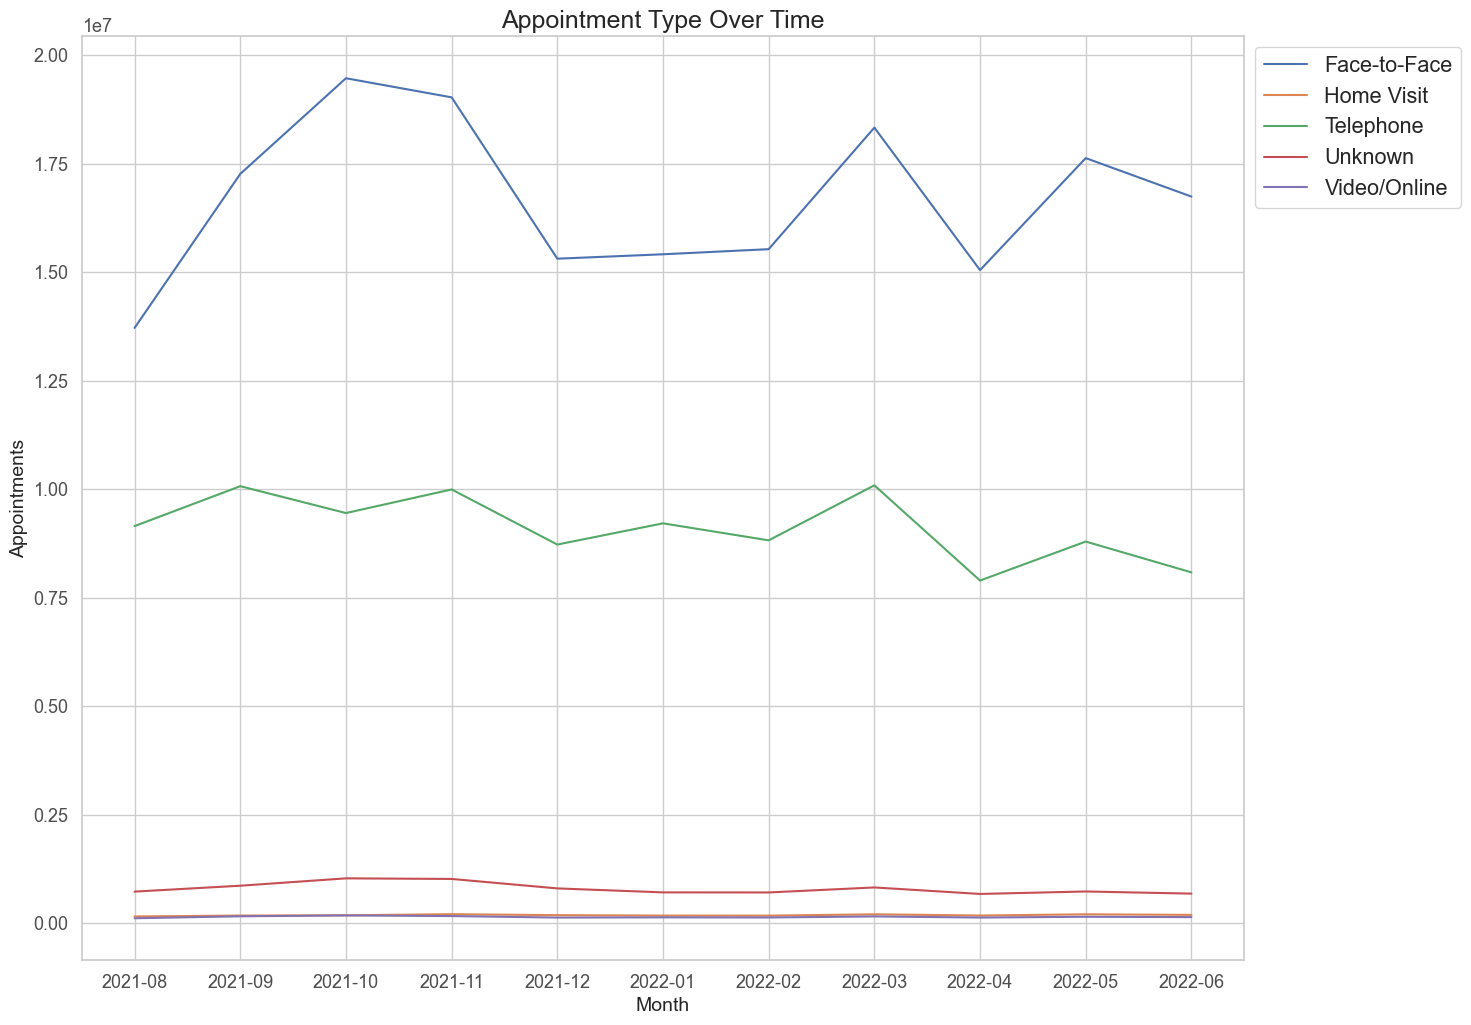

In [73]:
# Create a lineplot to answer the question.

arpld_mode =  arpld.groupby(['appointment_month', 'appointment_mode']).sum().reset_index()

arpld_mode['appointment_month'] = arpld_mode['appointment_month'].astype(str)

sns.lineplot(x='appointment_month', y='count_of_appointments', data = arpld_mode, hue = 'appointment_mode', ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Appointment Type Over Time')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1))

# Saving the figure. 
plt.savefig('Appointment Type Over Time.png', dpi=300, bbox_inches='tight')

**Question 5:** Are there any trends in time between booking an appointment?

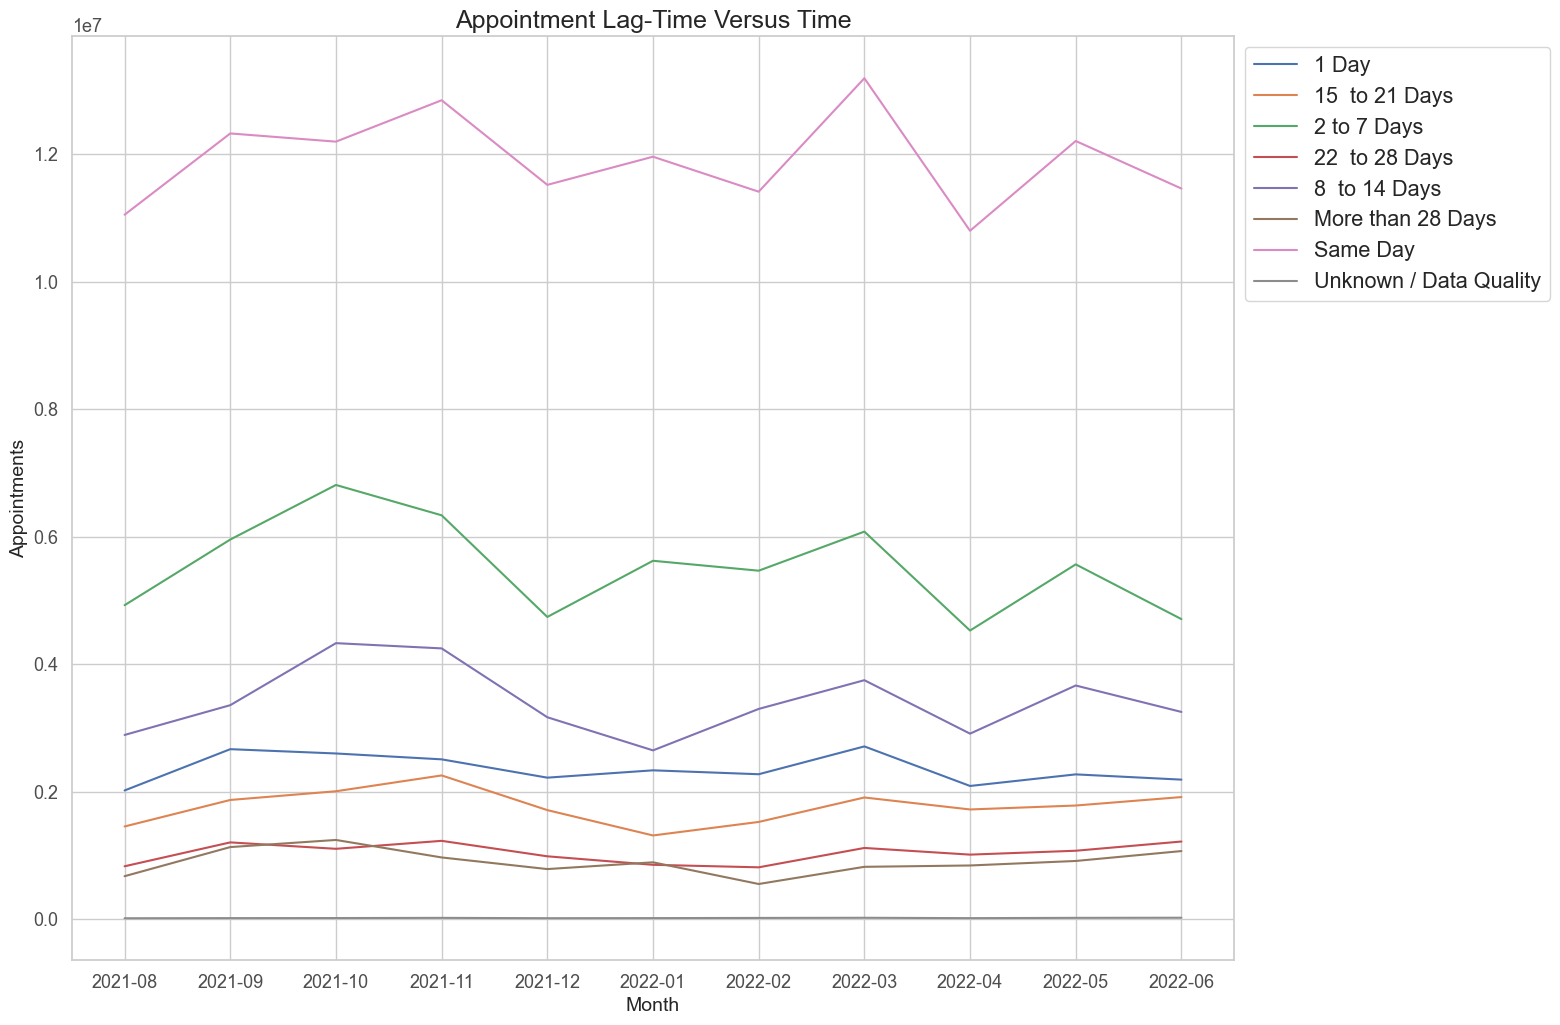

In [74]:
# Create a lineplot to answer the question.

arpld_lag =  arpld.groupby(['appointment_month', 'time_between_book_and_appointment']).sum().reset_index()

arpld_lag['appointment_month'] = arpld_lag['appointment_month'].astype(str)

sns.lineplot(x='appointment_month', y='count_of_appointments', data = arpld_lag, 
             hue = 'time_between_book_and_appointment', ci=None)

# Adding a title and changing the axis names to be more relatable.
plt.title('Appointment Lag-Time Versus Time')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1))

**Question 6:** How does the spread of service settings compare?

In [75]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [76]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_settings = nc.groupby(['appointment_month', 'service_setting']).sum().reset_index()

# View the DataFrame.
nc_settings

appointment_month            service_setting  count_of_appointments
0            2021-08  Extended Access Provision                 160927
1            2021-08           General Practice               21575852
2            2021-08                      Other                 449101
3            2021-08       Primary Care Network                 432448
4            2021-08                   Unmapped                1233843
5            2021-09  Extended Access Provision                 187906
6            2021-09           General Practice               25940821
7            2021-09                      Other                 527174
8            2021-09       Primary Care Network                 530485
9            2021-09                   Unmapped                1336115
10           2021-10  Extended Access Provision                 209539
11           2021-10           General Practice               27606171
12           2021-10                      Other                 556487
13           2021-10       Primary Care Network                 564981
14           2021-10                   Unmapped                1366656
15           2021-11  Extended Access Provision                 207577
16           2021-11           General Practice               27767889
17           2021-11                      Other                 558784
18           2021-11       Primary Care Network                 614324
19           2021-11                   Unmapped                1256496
20           2021-12  Extended Access Provision                 173504
21           2021-12           General Practice               23008818
22           2021-12                      Other                 464718
23           2021-12       Primary Care Network                 539479
24           2021-12                   Unmapped                 954257
25           2022-01  Extended Access Provision                 186375
26           2022-01           General Practice               23583053
27           2022-01                      Other                 457440
28           2022-01       Primary Care Network                 569044
29           2022-01                   Unmapped                 839562
30           2022-02  Extended Access Provision                 196627
31           2022-02           General Practice               23305934
32           2022-02                      Other                 456153
33           2022-02       Primary Care Network                 585300
34           2022-02                   Unmapped                 811246
35           2022-03  Extended Access Provision                 231905
36           2022-03           General Practice               27187368
37           2022-03                      Other                 530677
38           2022-03       Primary Care Network                 702176
39           2022-03                   Unmapped                 942912
40           2022-04  Extended Access Provision                 192284
41           2022-04           General Practice               21916791
42           2022-04                      Other                 437402
43           2022-04       Primary Care Network                 606270
44           2022-04                   Unmapped                 760313
45           2022-05  Extended Access Provision                 220511
46           2022-05           General Practice               25238620
47           2022-05                      Other                 503327
48           2022-05       Primary Care Network                 712280
49           2022-05                   Unmapped                 820770
50           2022-06  Extended Access Provision                 209652
51           2022-06           General Practice               23680374
52           2022-06                      Other                 478813
53           2022-06       Primary Care Network                 700599
54           2022-06                   Unmapped                 758640

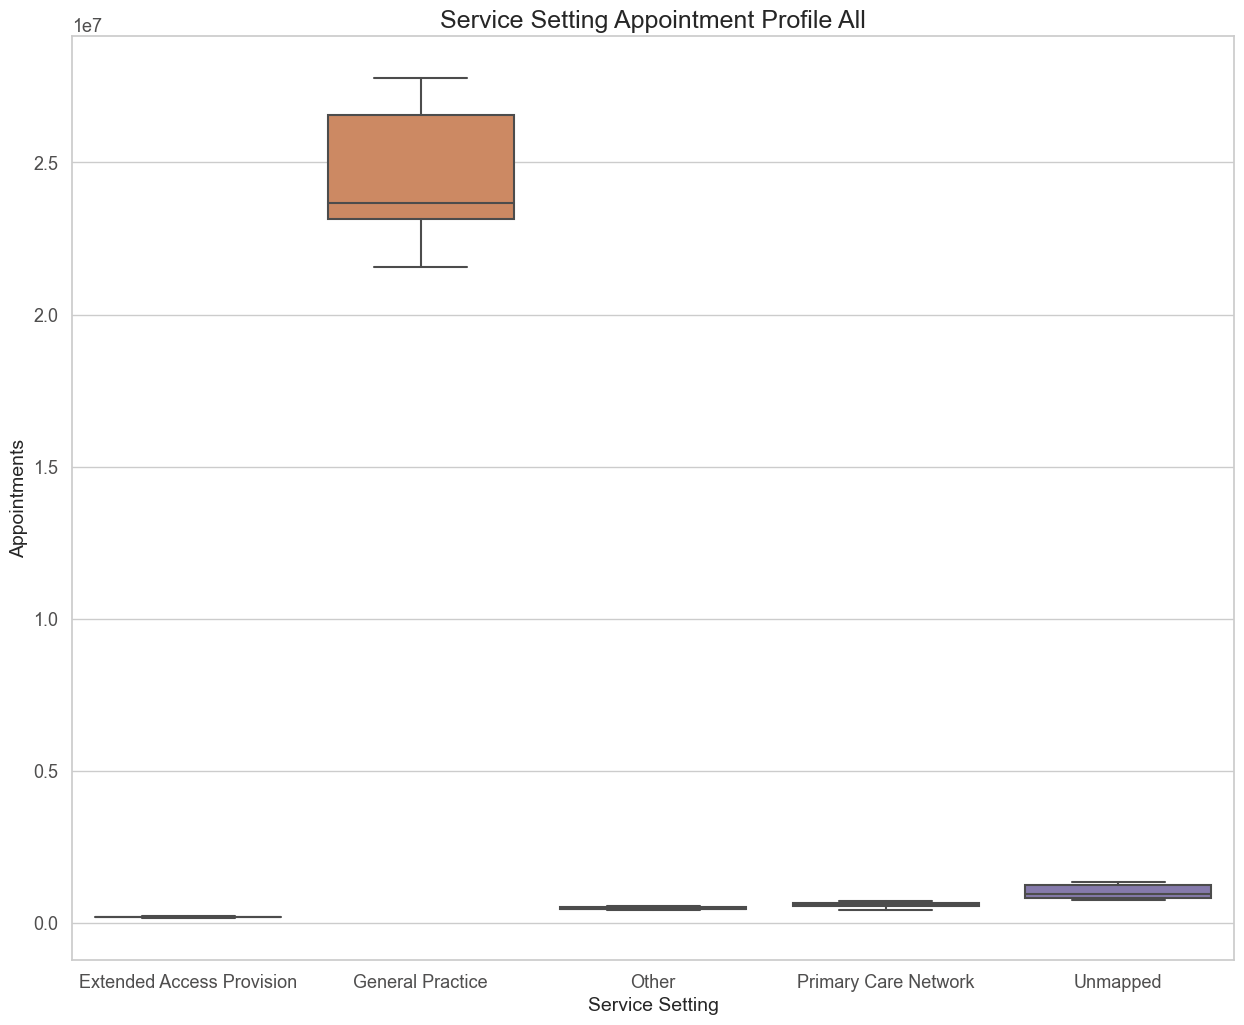

In [77]:
# Create a boxplot to investigate the spread of service settings.

sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_settings)
plt.title('Service Setting Appointment Profile All')
plt.xlabel('Service Setting')
plt.ylabel('Appointments')
plt.show()

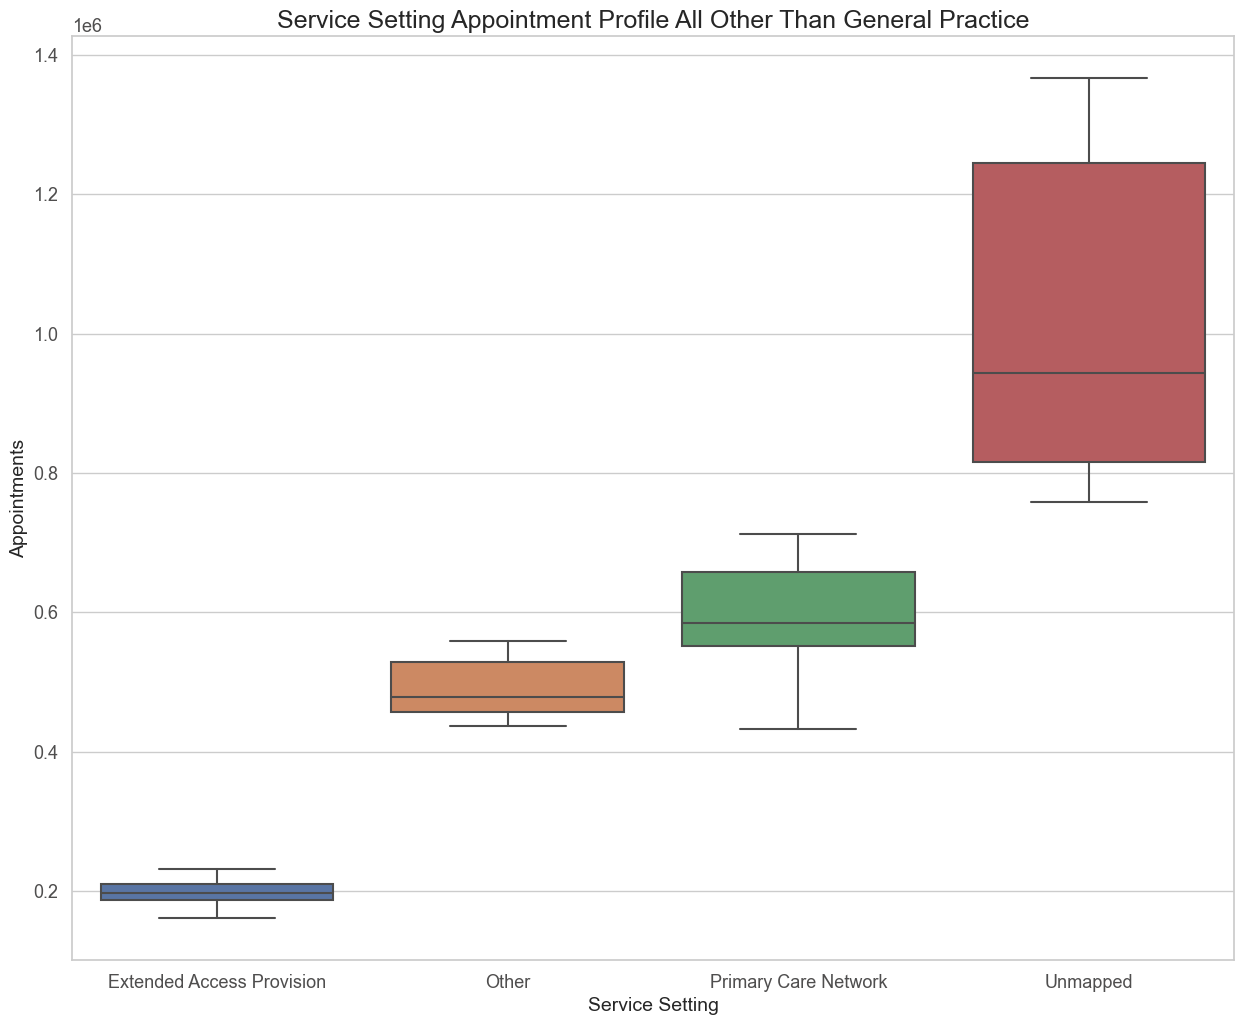

In [78]:
# Create a boxplot to investigate the service settings without GP.

sns.boxplot(x='service_setting', y='count_of_appointments', 
            data=nc_settings[nc_settings['service_setting']!='General Practice'])
plt.title('Service Setting Appointment Profile All Other Than General Practice')
plt.xlabel('Service Setting')
plt.ylabel('Appointments')
plt.show()

<h1 style="font-size: 18px;">The following code focusses on additional descriptive and diagnostic analysis.</h1>

One key piece of terminology to clarify is 'lag time' or 'lag'. I have used this as short hand for: time between booking and attending an appointment.

<h1><strong>Descriptive Analysis</strong></h1>

In [79]:
# Before we begin diagnostic analysis, I decided to breifly investigate two point of interest.
# These do not bear huge relevance to the analysis but I was keen to establish basic benchmarks.

In [80]:
# Looking at ar.
print(ar.shape)
print(ar.head())

(596821, 7)
  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971  


In [81]:
# Assuming your DataFrame is named 'df'
lag_time_categories = ar['time_between_book_and_appointment'].value_counts()

print(lag_time_categories)

Same Day                  95502
2 to 7 Days               92409
1 Day                     88957
8  to 14 Days             82698
15  to 21 Days            73666
22  to 28 Days            68755
More than 28 Days         65147
Unknown / Data Quality    29687
Name: time_between_book_and_appointment, dtype: int64


In [82]:
# Establishing how many 'emergencies' (same day appointment) there were and their attendance rate.
emergencies = ar[ar['time_between_book_and_appointment']=='Same Day'].reset_index(drop=True)
print(emergencies.shape)
emergencies.head()

(95502, 7)


icb_ons_code appointment_month appointment_status              hcp_type  \
0    E54000034           2020-01           Attended                    GP   
1    E54000034           2020-01           Attended                    GP   
2    E54000034           2020-01           Attended                    GP   
3    E54000034           2020-01           Attended                    GP   
4    E54000034           2020-01           Attended  Other Practice staff   

  appointment_mode time_between_book_and_appointment  count_of_appointments  
0     Face-to-Face                          Same Day                  64649  
1       Home Visit                          Same Day                    762  
2        Telephone                          Same Day                  30264  
3          Unknown                          Same Day                   3527  
4     Face-to-Face                          Same Day                  21676

In [83]:
# Their attendance rate.
rate_of_emergency_attendance = emergencies.groupby('appointment_status')\
['count_of_appointments'].sum()

print(rate_of_emergency_attendance)

total_attended = rate_of_emergency_attendance['Attended']
total_appointments = rate_of_emergency_attendance.sum()

# Calculate the percentage of appointments attended
percentage_attended = (total_attended / total_appointments) * 100

print(f"{percentage_attended:.2f}% of emergency appointments were attended")

appointment_status
Attended    328380317
DNA           6052604
Unknown       8314250
Name: count_of_appointments, dtype: int64
95.81% of emergency appointments were attended


In [84]:
# Create a new DataFrame with just the icb area, status and count of appointments. 
status_counts = ar.groupby(['icb_ons_code', 'appointment_status'])['count_of_appointments'].sum().reset_index()

# Create a DataFrame counting just the unknowns.
unknown_counts = status_counts[status_counts['appointment_status'] == 'Unknown'].reset_index(drop=True)

# Rename column.
unknown_counts = unknown_counts.rename(columns={'count_of_appointments': 'count_of_unknowns'})

# Grouping by 'icb_ons_code' and calculating the total count of appointments
total_counts = status_counts.groupby('icb_ons_code')['count_of_appointments'].sum().reset_index()

# Merging the 'unknown' counts and 'total' counts on 'icb_ons_code'
unknown_rate = unknown_counts.merge(total_counts, on='icb_ons_code', how='left').fillna(0)

# Calculating the ratio of 'Unknown' appointments to the total appointments
unknown_rate['unknown%'] = (unknown_rate['count_of_unknowns'] / unknown_rate['count_of_appointments'])*100

unknown_rate = unknown_rate[['icb_ons_code', 'unknown%']].reset_index(drop=True)

unknown_rate = unknown_rate.sort_values(by='unknown%', ascending=False)
print(unknown_rate.head())


   icb_ons_code  unknown%
37    E54000058  5.589559
36    E54000057  5.352341
19    E54000036  5.306346
17    E54000032  5.226897
23    E54000040  5.175347


Okay, so on a basic level we have established an understanding of some 'boundaries'.
1) Same day appointments (which we can regard to be emergencies in large part and therefore carry the greatest motivation to attend) are attended 95.81% of the time.
2) Appointment attendance is not captured up to 5.58% of the time.

<h1><strong>Descriptive Analysis</strong></h1>

<h1 style="font-size: 18px;">1) Missed Appointments</h1>

As established above, the ar DataFrame spans the longest time frame and therefore potentially stands as the best source with which to derive insight on attendance.  

In [85]:
# Create a new DataFrame looking at just attendance. 
# Remove dubious 'unknown' appointments as we cannot be certain of their true nature.
attendance = ar[ar['appointment_status']!='Unknown'].reset_index(drop=True)

# Sense check the new DataFrame. 
print(attendance.shape)
print(ar.shape)
print(attendance['appointment_status'].value_counts())

(395497, 7)
(596821, 7)
Attended    232137
DNA         163360
Name: appointment_status, dtype: int64


In [86]:
# Restrict 'attendance' DataFrame to the columns we desire.

attendance = attendance[['icb_ons_code', 'appointment_month', 'appointment_status',\
                        'time_between_book_and_appointment', 'count_of_appointments']].reset_index(drop=True)

attendance.head()

icb_ons_code appointment_month appointment_status  \
0    E54000034           2020-01           Attended   
1    E54000034           2020-01           Attended   
2    E54000034           2020-01           Attended   
3    E54000034           2020-01           Attended   
4    E54000034           2020-01           Attended   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

<b>We want to examine attendance rate per month, nationally and locally. We also want to show attendance rate per month according to each 'urgency' category. Keeping in mind the NHS target that people should be able to book an appointment within two weeks (source below), we should also aim to present the raw count for each time delta category.<b>
    
Source: https://www.gov.uk/government/news/gp-practice-data-available-for-first-time

In [87]:
# Let's start with time national attendance rate per month.
national_attendance = attendance.groupby(['icb_ons_code', 'appointment_month', 'appointment_status']).sum().reset_index()

national_attendance.head()

icb_ons_code appointment_month appointment_status  count_of_appointments
0    E54000008           2020-01           Attended                1076386
1    E54000008           2020-01                DNA                  63134
2    E54000008           2020-02           Attended                 939545
3    E54000008           2020-02                DNA                  58889
4    E54000008           2020-03           Attended                 910572

In [88]:
# We can then pivot the data in order to rearrange the columns.

national_attendance_rate = national_attendance.pivot_table(index=['icb_ons_code', 'appointment_month'],
                          columns='appointment_status',
                          values='count_of_appointments',
                          aggfunc='sum').reset_index()

# We can then add a new column for attendance rate.
national_attendance_rate['attendance_rate'] = (national_attendance_rate['Attended'] / (
    national_attendance_rate['Attended'] + national_attendance_rate['DNA']
))*100

# We can then round the rate column to a more digestible number of significant figures.

national_attendance_rate['attendance_rate'] = national_attendance_rate['attendance_rate'].round(2)

national_attendance_rate

appointment_status icb_ons_code appointment_month  Attended    DNA  \
0                     E54000008           2020-01   1076386  63134   
1                     E54000008           2020-02    939545  58889   
2                     E54000008           2020-03    910572  60158   
3                     E54000008           2020-04    612419  26253   
4                     E54000008           2020-05    662502  26049   
...                         ...               ...       ...    ...   
1255                  E54000062           2022-02    551853  35622   
1256                  E54000062           2022-03    631880  41573   
1257                  E54000062           2022-04    500783  31757   
1258                  E54000062           2022-05    585334  37848   
1259                  E54000062           2022-06    560465  36898   

appointment_status  attendance_rate  
0                             94.46  
1                             94.10  
2                             93.80  
3                             95.89  
4                             96.22  
...                             ...  
1255                          93.94  
1256                          93.83  
1257                          94.04  
1258                          93.93  
1259                          93.82  

[1260 rows x 5 columns]

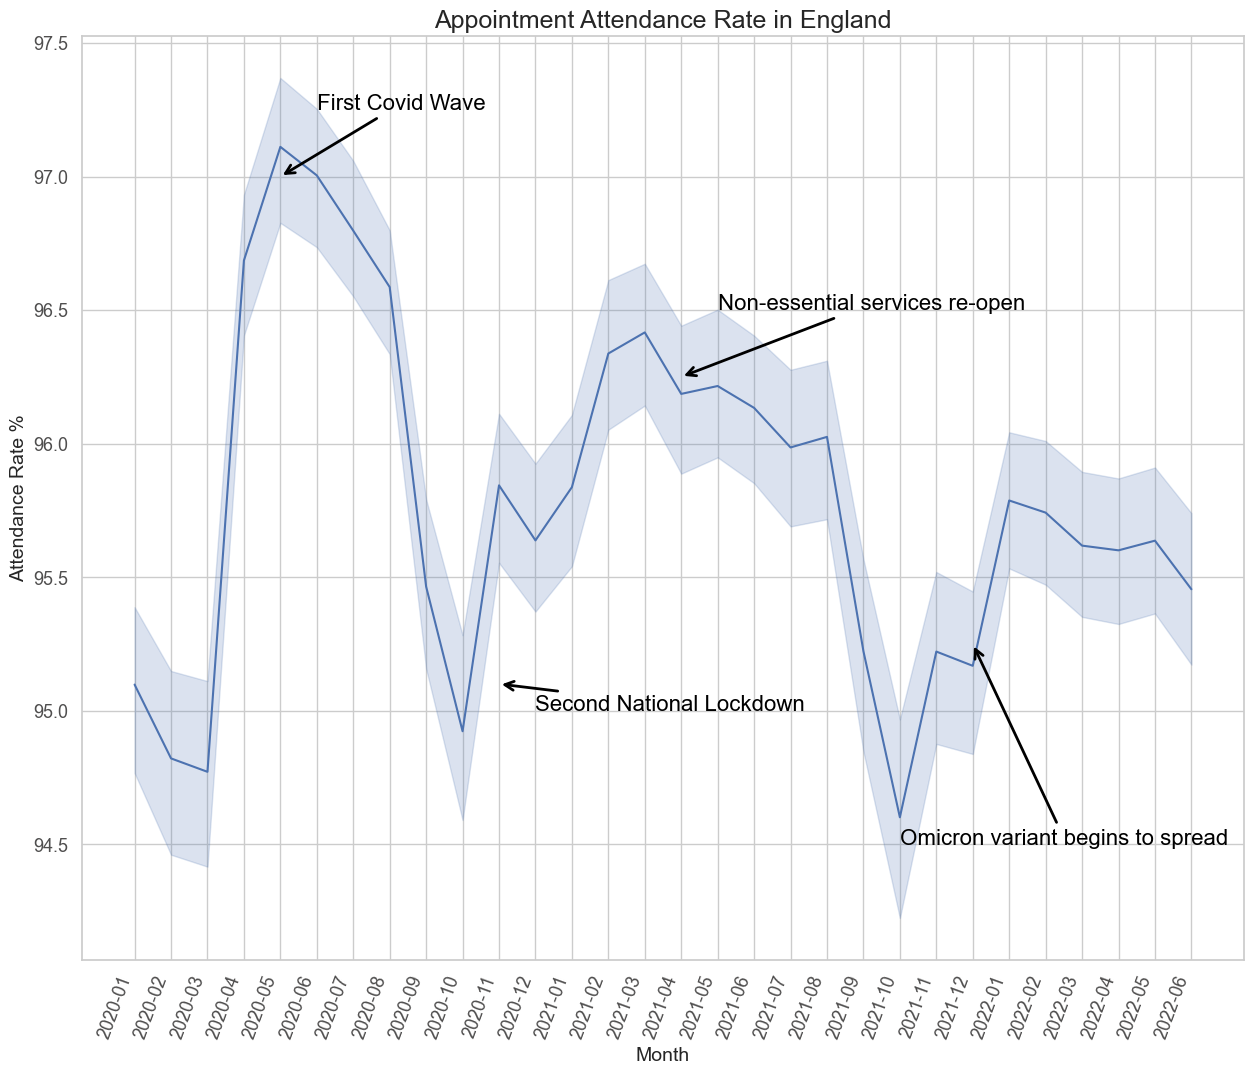

In [89]:
# Libraries already installed, so we can proceed with plotting a visualisation.
# We will keep 'ci=none' out because we want to show the uncertainty.
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.lineplot(x='appointment_month', y='attendance_rate', data = national_attendance_rate)

# Arraning the x axis to be more legible.
plt.xticks(rotation=70)
ax.set_xticklabels(national_attendance_rate['appointment_month'], ha='right', fontsize=13)

# Adding a title and changing the axis names to be more relatable.
plt.title('Appointment Attendance Rate in England')
plt.xlabel('Month')
plt.ylabel('Attendance Rate %')

# Adding some annotations that relate key points in time.
plt.annotate('First Covid Wave', xy=('2020-05', 97), xytext=('2020-06', 97.25),
             arrowprops=dict(color='black', arrowstyle='->', linewidth=2),
             fontsize=16, color='black')

plt.annotate('Second National Lockdown', xy=('2020-11', 95.1), xytext=('2020-12', 95),
             arrowprops=dict(color='black', arrowstyle='->', linewidth=2),
             fontsize=16, color='black')

plt.annotate('Non-essential services re-open', xy=('2021-04', 96.25), xytext=('2021-05', 96.5),
             arrowprops=dict(color='black', arrowstyle='->', linewidth=2),
             fontsize=16, color='black')

plt.annotate('Omicron variant begins to spread', xy=('2021-12', 95.25), xytext=('2021-10', 94.5),
             arrowprops=dict(color='black', arrowstyle='->', linewidth=2),
             fontsize=16, color='black')

# Saving the figure. 
plt.savefig('appointment_attendance_rate.png', dpi=300, bbox_inches='tight')


plt.show()

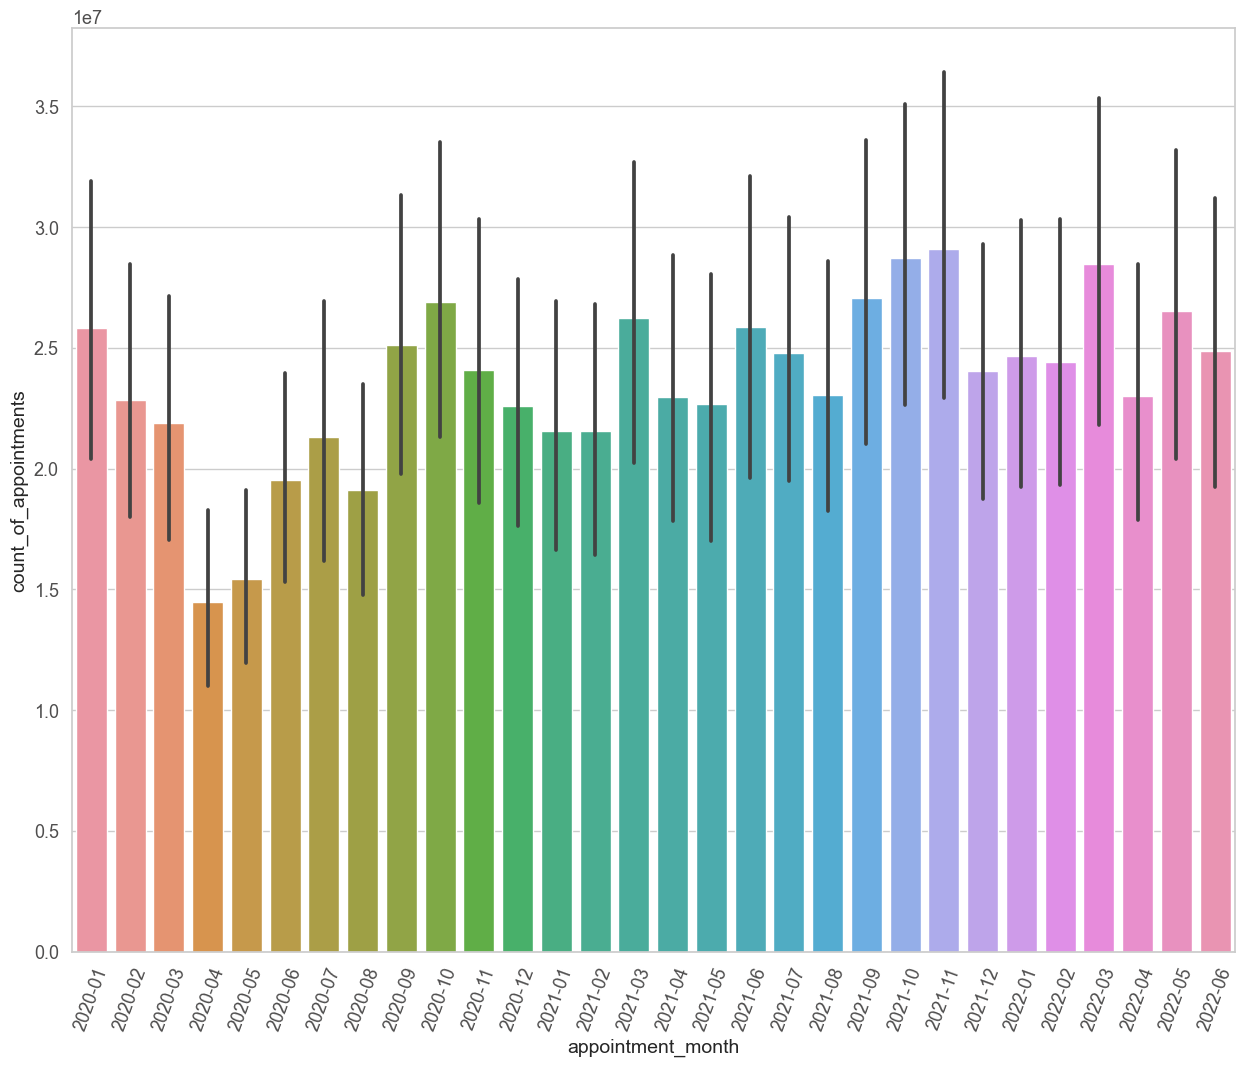

In [90]:
# Rough graph to show the number of appointments overall.
ax = sns.barplot(x='appointment_month', y='count_of_appointments', estimator=sum, data=national_attendance)
plt.xticks(rotation=70)

plt.show()

# Likely won't need this graph anymore!

<h1 style="font-size: 18px;">2) Appointment Lag Time</h1>

We want to look at the number of appointments for each lag time category. Right now all we are concerned with is how the system is comparing to the governments targets: seeing patients within 14 days.

In [91]:
# Let's start by copying the attendance DataFrame and filtering out 'Unknowns' in the lag time category.
lag_time_attendance = attendance[attendance['time_between_book_and_appointment']!='Unknown / Data Quality']

# Let us aggregate 
lag_time_attendance

icb_ons_code appointment_month appointment_status  \
0         E54000034           2020-01           Attended   
1         E54000034           2020-01           Attended   
2         E54000034           2020-01           Attended   
3         E54000034           2020-01           Attended   
4         E54000034           2020-01           Attended   
...             ...               ...                ...   
395492    E54000050           2022-06                DNA   
395493    E54000050           2022-06                DNA   
395494    E54000050           2022-06                DNA   
395495    E54000050           2022-06                DNA   
395496    E54000050           2022-06                DNA   

       time_between_book_and_appointment  count_of_appointments  
0                                  1 Day                   8107  
1                         15  to 21 Days                   6791  
2                            2 to 7 Days                  20686  
3                         22  to 28 Days                   4268  
4                          8  to 14 Days                  11971  
...                                  ...                    ...  
395492                       2 to 7 Days                      8  
395493                    22  to 28 Days                      1  
395494                     8  to 14 Days                      7  
395495                 More than 28 Days                      2  
395496                          Same Day                      8  

[376639 rows x 5 columns]

In [92]:
# Let's simplify the DataFrame to make plotting easier.
# I will create one DataFrame that gives the totals per status
lag_time_status_totals = lag_time_attendance.groupby(
    ['time_between_book_and_appointment', 'appointment_status']).sum().reset_index()

lag_time_just_totals = lag_time_status_totals.groupby(['time_between_book_and_appointment']).sum().reset_index()

lag_time_just_totals

time_between_book_and_appointment  count_of_appointments
0                             1 Day               65191369
1                    15  to 21 Days               39125505
2                       2 to 7 Days              146800498
3                    22  to 28 Days               22798299
4                     8  to 14 Days               81285476
5                 More than 28 Days               18735685
6                          Same Day              334432921

In [93]:
# Let us first assess the % of appointments falling within 14 days which was the governments target.

gov_target = lag_time_just_totals[lag_time_just_totals[
    'time_between_book_and_appointment'].isin(['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days'])].reset_index(drop=True)

# Re-define as a single integer value.
gov_target = gov_target['count_of_appointments'].sum()

# Repeat for missed target.
gov_miss_target = lag_time_just_totals[lag_time_just_totals[
    'time_between_book_and_appointment'].isin(['15  to 21 Days', '22  to 28 Days', 'More than 28 Days'])].reset_index(drop=True)

gov_miss_target = gov_miss_target['count_of_appointments'].sum()

target_success = (gov_target/(gov_target+gov_miss_target))*100

target_success = round(target_success, 2)

print(f"{target_success}% of appointments occured within 14 days, the government's target.")

88.61% of appointments occured within 14 days, the government's target.


In [94]:
# We want to define the order of bars in the bar plot. So we need the strings as they appear in the table.
# The below piece of code prints them in a list. There is some double spacing which is not clear from the FataFrame.

print(lag_time_just_totals['time_between_book_and_appointment'].tolist())

['1 Day', '15  to 21 Days', '2 to 7 Days', '22  to 28 Days', '8  to 14 Days', 'More than 28 Days', 'Same Day']


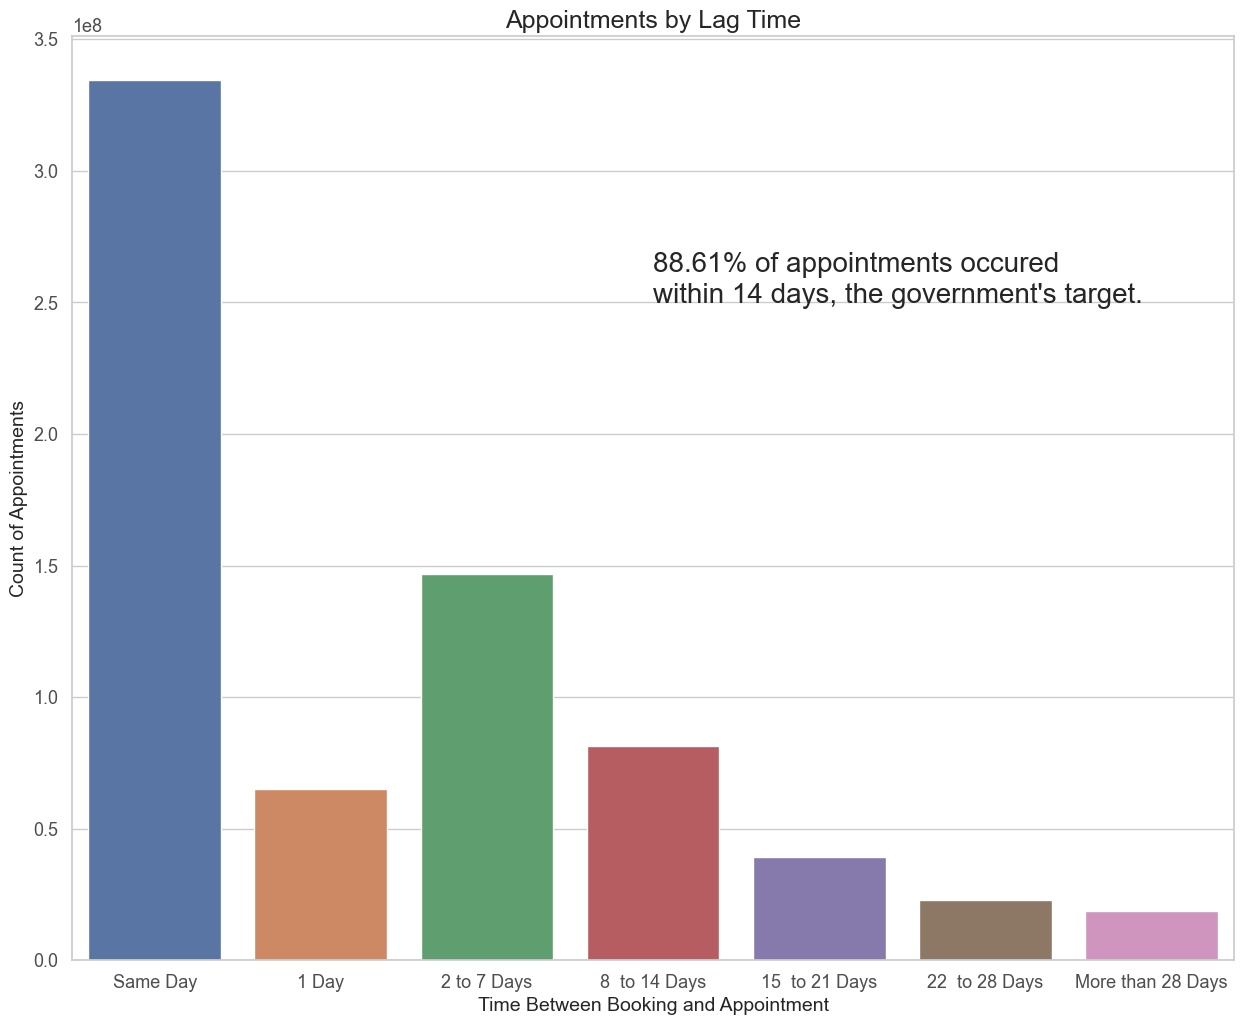

In [96]:
# Let's give an overall indication of how many appointments the NHS is booking for each lag time.
# Copy and paste the above strings in the desired order.

lag_order = ['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 'More than 28 Days']

sns.barplot(x='time_between_book_and_appointment', y='count_of_appointments', estimator=sum, 
            data=lag_time_just_totals, order = lag_order )

# Add a text box to convey a key metric. 
plt.text(3, 250000000, f"{target_success}% of appointments occured\nwithin 14 days, the government's target.", fontsize=20)

plt.xlabel('Time Between Booking and Appointment')
plt.ylabel('Count of Appointments')
plt.title('Appointments by Lag Time')

# Saving the figure. 
plt.savefig('appointment_lag_time_national.png', dpi=300, bbox_inches='tight')

<h1 style="font-size: 18px;">2.1) Appointment Lag Time In 2022</h1>

<b>We should also repeat the above process looking purely at 2022 data in order to account for the 'post-covid' scenario.<b> 

In [97]:
# Restrict existing DataFrame to 2022.
lag_time_attendance_2022 = lag_time_attendance[
    (lag_time_attendance['appointment_month']>='2022-01') &
    (lag_time_attendance['appointment_month']<='2022-06')]

# Again aggregating by lag time.
lag_time_status_totals_2022 = lag_time_attendance_2022.groupby(
    ['time_between_book_and_appointment', 'appointment_status']).sum().reset_index()

lag_time_status_totals_2022 = lag_time_status_totals_2022.groupby(['time_between_book_and_appointment']).sum().reset_index()

lag_time_status_totals_2022

time_between_book_and_appointment  count_of_appointments
0                             1 Day               13441714
1                    15  to 21 Days                9518808
2                       2 to 7 Days               30820184
3                    22  to 28 Days                5615495
4                     8  to 14 Days               18522451
5                 More than 28 Days                4461063
6                          Same Day               69512640

In [98]:
# Assess government target for Q1+Q2 2022.

gov_target_2022 = lag_time_status_totals_2022[lag_time_status_totals_2022[
    'time_between_book_and_appointment'].isin(['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days'])].reset_index(drop=True)

# Re-define as a single integer value.
gov_target_2022 = gov_target_2022['count_of_appointments'].sum()

# Repeat for missed target.
gov_miss_target_2022 = lag_time_status_totals_2022[lag_time_just_totals[
    'time_between_book_and_appointment'].isin(['15  to 21 Days', '22  to 28 Days', 'More than 28 Days'])].reset_index(drop=True)

gov_miss_target_2022 = gov_miss_target_2022['count_of_appointments'].sum()

target_success_2022 = (gov_target_2022/(gov_target_2022+gov_miss_target_2022))*100

target_success_2022 = round(target_success_2022, 2)

print(f"In Q1 and Q2 of 2022, {target_success_2022}% of appointments occured within 14 days, the government's target.")

In Q1 and Q2 of 2022, 87.1% of appointments occured within 14 days, the government's target.


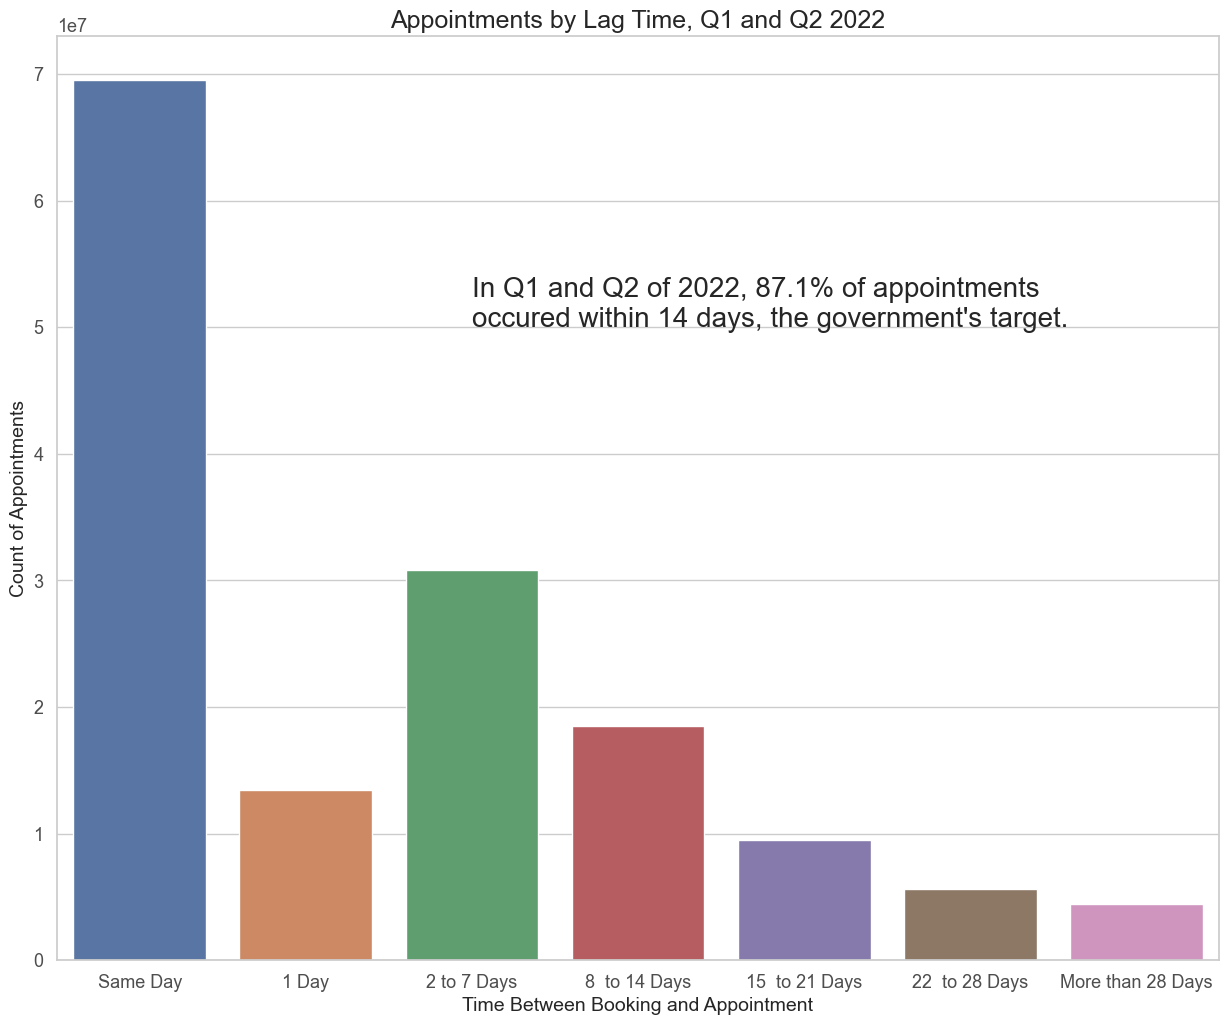

In [99]:
# Let's give an overall indication of how many appointments the NHS is booking for each lag time.
# Copy and paste the above strings in the desired order.

lag_order = ['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 'More than 28 Days']

sns.barplot(x='time_between_book_and_appointment', y='count_of_appointments', estimator=sum, 
            data=lag_time_status_totals_2022, order = lag_order )

# Add a text box to convey a key metric. 
plt.text(2, 50000000, f"In Q1 and Q2 of 2022, \
{target_success_2022}% of appointments\noccured within 14 days, the government's target.", fontsize=20)

plt.xlabel('Time Between Booking and Appointment')
plt.ylabel('Count of Appointments')
plt.title('Appointments by Lag Time, Q1 and Q2 2022')

# Saving the figure. 
plt.savefig('appointment_lag_time_national_2022Q1+Q2.png', dpi=300, bbox_inches='tight')

We can see that the same general shape was observed with noextreme differences. (This says nothing of attendance! We will investigate that later).

<h1 style="font-size: 18px;">3) Appointment Duration.</h1>

We will need to exame the 'ad' DataFrame. First, we need to set up this data set for analysis. The meta data states:

'Any appointments with a null duration or a duration of less than one minute or greater 
than 60 minutes have been grouped into an ‘Unknown / Data Quality Issue’ category within 
this publication.'

We will likely need to exclude this data from the analysis as we cannot be sure of its underlying nature in each instance.
Let us briefly interrogate it however to get a grasp of how prevelant it is.

In [100]:
# Show the number of individual records for each category.
print(ad['actual_duration'].value_counts())

# Show the number of actual appointments that were 'unknown'.
unknown = ad[ad['actual_duration']=='Unknown / Data Quality'].reset_index()
unknown = unknown['count_of_appointments'].sum()
print(f"A total of {unknown} appointments did not have an accurate duration recorded.")

unknown_rate = (unknown/ad['count_of_appointments'].sum())*100
unknown_rate = round(unknown_rate, 2)

print(f"This represents {unknown_rate}% of all appointments.")

Unknown / Data Quality    20161
1-5 Minutes               19909
6-10 Minutes              19902
11-15 Minutes             19738
16-20 Minutes             19534
21-30 Minutes             19452
31-60 Minutes             19097
Name: actual_duration, dtype: int64
A total of 40284086 appointments did not have an accurate duration recorded.
This represents 23.98% of all appointments.


This is an incredibly high proportion. Given this entire category is based on erroneous data capture, appointments that are abnormal (too long or short), and compounded by the fact we don't know the degree to which each factor contributes to this category, we will exclude it going forward.

Let's look closely at those durations that were accuratley recorded. The meta data makes clear that these values are not uniformly recorded across GP practices, so we cannot rely on their accuracy totally. However we can gauge a rough indication of what is going on. 

<b>We KNOW that 15 minutes is the prescribed time for a consultation. Therefore, a skew to the left of 15 minutes can be regarded as evidence of being rushed. Consultations over 15 minutes may be a reflection of illness severity. We must be careful not to attribute such appointments to excess time in the hands of doctors/nurses.<b>

In [101]:
# Define a new DataFrame that removes the 'unknowns'. 'ad_norm', as actual duraction, normal.
ad_norm = ad[ad['actual_duration']!='Unknown / Data Quality'].reset_index(drop=True)

# Group the DataFrame by duration. This will be on the national level.
ad_norm_nat = ad_norm.groupby('actual_duration').sum().reset_index()

ad_norm_nat

actual_duration  count_of_appointments
0     1-5 Minutes               28600865
1   11-15 Minutes               25160882
2   16-20 Minutes               16004247
3   21-30 Minutes               15026365
4   31-60 Minutes                9103432
5    6-10 Minutes               33800815

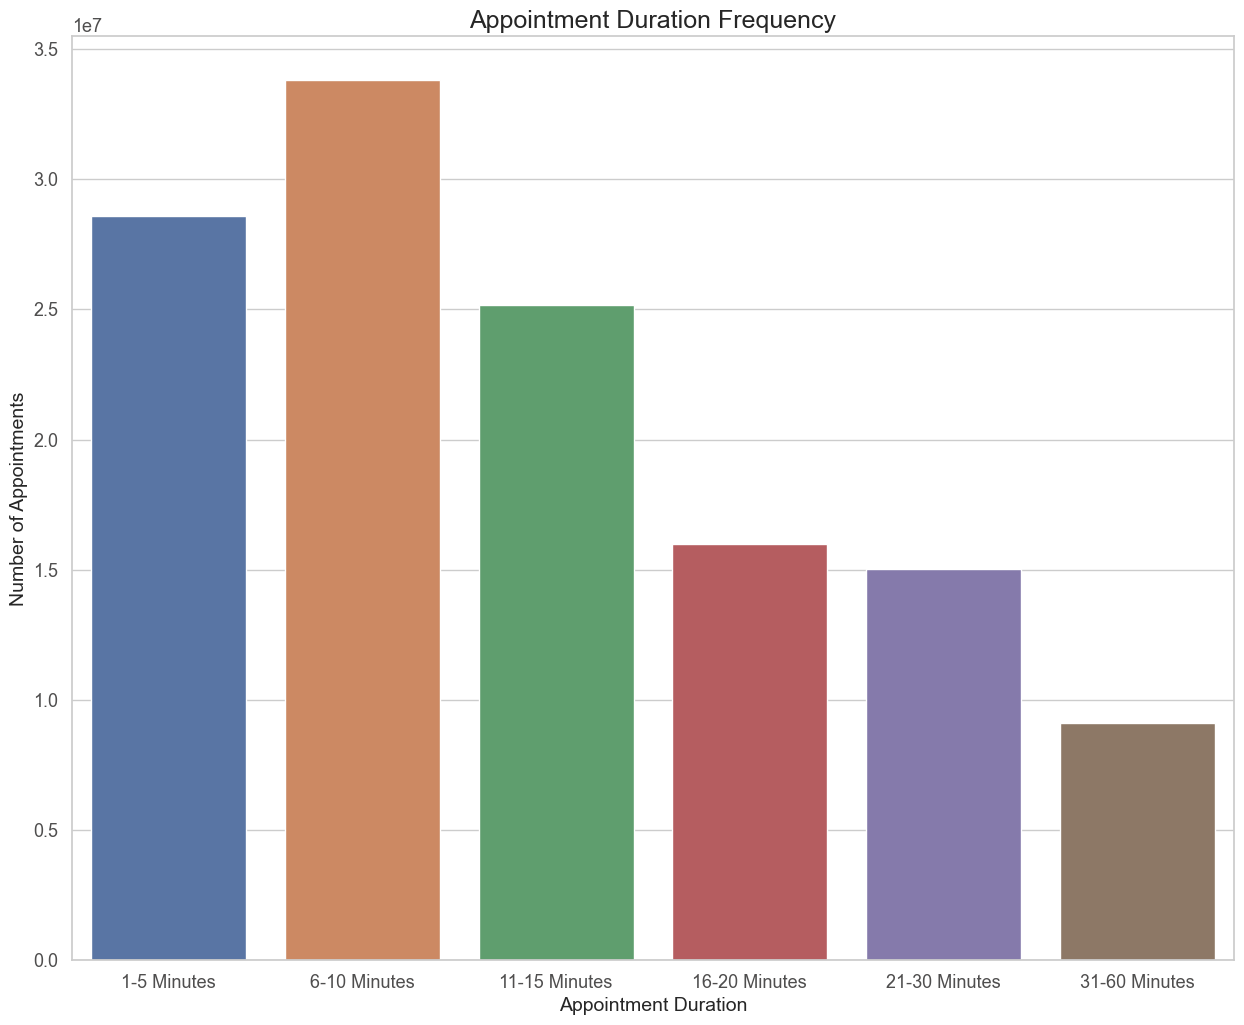

In [102]:
# We can then create a very basic plot of these appointment durations at the national level.

ad_order = ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes',
            '16-20 Minutes', '21-30 Minutes', '31-60 Minutes']

sns.barplot(x='actual_duration', y='count_of_appointments', estimator=sum, 
            data=ad_norm_nat, order = ad_order )

plt.xlabel('Appointment Duration')
plt.ylabel('Number of Appointments')
plt.title('Appointment Duration Frequency')

# Saving the figure. 
plt.savefig('appointment_duration_national.png', dpi=300, bbox_inches='tight')

We can see from the above graph that there are indications of understaffing/insufficient capacity. Most appointments are rushed.


Ideally we would know the exact appointment duration, or at least have time interval categories of consistent range. For further analysis, we would be best served to convert these to continuous variables. However, there are several cons to consider:

Taking the mid point of each range would skew the average right. The 31-60 would become 45/46 and in a weighted avergae scenario, this would have a dissproportionate affect. In all likelihood, the vast majority of appointments in this bin just 'pip into' that category at 31-35 mins anyway. For this same reason, assuming equally distributed appointments, that is dividing the 31-60 bin into four equal parts, is equally as dangerous. 

In order to model this, I will assign an integer to each bin, 1-6 and weight each according to each category. 
<b>REMEMBER<b>: 
    we are only concerned about staff being rushed. The longer duration appointments are not the main focus here. 

In [103]:
# As we want to proceed with this approach and check the national and local levels, let us return to the ad_norm DataFrame. 
ad_norm_loc = ad_norm.groupby(['icb_ons_code', 'actual_duration']).sum().reset_index()

# We want to replace the duration data. We shall define the mapping as follows.
duration_mapping = {
    '1-5 Minutes': 1,
    '11-15 Minutes': 2,
    '16-20 Minutes': 3,
    '21-30 Minutes': 4,
    '31-60 Minutes': 5,
    '6-10 Minutes': 6
}
# ad_dum, actual duration dummy.
ad_dum = ad_norm_loc

ad_dum['actual_duration'] = ad_dum['actual_duration'].map(duration_mapping)

ad_dum['weighted_duration'] = ad_dum['actual_duration']*ad_dum['count_of_appointments']

ad_dum

icb_ons_code  actual_duration  count_of_appointments  weighted_duration
0      E54000008                1                1133675            1133675
1      E54000008                2                 971383            1942766
2      E54000008                3                 641259            1923777
3      E54000008                4                 618342            2473368
4      E54000008                5                 370309            1851545
..           ...              ...                    ...                ...
247    E54000062                2                 556448            1112896
248    E54000062                3                 344050            1032150
249    E54000062                4                 320571            1282284
250    E54000062                5                 203424            1017120
251    E54000062                6                 735590            4413540

[252 rows x 4 columns]

In [104]:
# Weighted duration nationally.

weighted_avg_nationally = ad_dum['weighted_duration'].sum()/ad_dum['count_of_appointments'].sum()

weighted_avg_nationally

3.409353573578925

In [105]:
# Group by 'icb_ons_code' and calculate the weighted average for each group
weighted_avg_local = ad_dum.groupby('icb_ons_code').apply(lambda x: (
    x['actual_duration'] * x['count_of_appointments']).sum() / x['count_of_appointments'].sum())

weighted_avg_local = weighted_avg_local.reset_index()
weighted_avg_local.columns = ['icb_ons_code', 'weighted_average_duration']
weighted_avg_local = weighted_avg_local.sort_values(by='weighted_average_duration', ascending = True).reset_index(drop=True)

# Weighted average duration locally.
weighted_avg_local

icb_ons_code  weighted_average_duration
0     E54000027                   3.357323
1     E54000023                   3.365277
2     E54000059                   3.367814
3     E54000008                   3.371888
4     E54000060                   3.373417
5     E54000022                   3.374538
6     E54000013                   3.377278
7     E54000043                   3.379769
8     E54000034                   3.379892
9     E54000052                   3.380107
10    E54000026                   3.383487
11    E54000054                   3.383833
12    E54000025                   3.389957
13    E54000015                   3.390347
14    E54000032                   3.391936
15    E54000037                   3.399792
16    E54000061                   3.400094
17    E54000058                   3.401224
18    E54000056                   3.402035
19    E54000030                   3.408080
20    E54000041                   3.410312
21    E54000050                   3.411565
22    E54000042                   3.413763
23    E54000028                   3.416046
24    E54000018                   3.417340
25    E54000036                   3.422087
26    E54000038                   3.423050
27    E54000029                   3.423306
28    E54000011                   3.423730
29    E54000024                   3.424643
30    E54000051                   3.425727
31    E54000044                   3.428724
32    E54000053                   3.432381
33    E54000062                   3.432646
34    E54000055                   3.437594
35    E54000048                   3.445273
36    E54000057                   3.445393
37    E54000019                   3.452496
38    E54000031                   3.456389
39    E54000010                   3.458480
40    E54000040                   3.475049
41    E54000039                   3.503905

This is a VERY crude way to depict average appointment length, but the data itself is dubious to begin with, so the best we can hope for is an approximation in this modelling. The above gives some indication of average appointment length. All appear to be within 3, the value mapped in place of 11-15 minutes. In all likelihood, these averages involve significant skew to both the left and right.

Let's take the lowest and highest averaged locations and re-plot their specific Appointment duration profile.

In [106]:
# First we should create a new DataFrame for each locality. 
ad_loc = ad_norm.groupby(['icb_ons_code', 'actual_duration']).sum().reset_index()

ad_loc

icb_ons_code actual_duration  count_of_appointments
0      E54000008     1-5 Minutes                1133675
1      E54000008   11-15 Minutes                 971383
2      E54000008   16-20 Minutes                 641259
3      E54000008   21-30 Minutes                 618342
4      E54000008   31-60 Minutes                 370309
..           ...             ...                    ...
247    E54000062   11-15 Minutes                 556448
248    E54000062   16-20 Minutes                 344050
249    E54000062   21-30 Minutes                 320571
250    E54000062   31-60 Minutes                 203424
251    E54000062    6-10 Minutes                 735590

[252 rows x 3 columns]

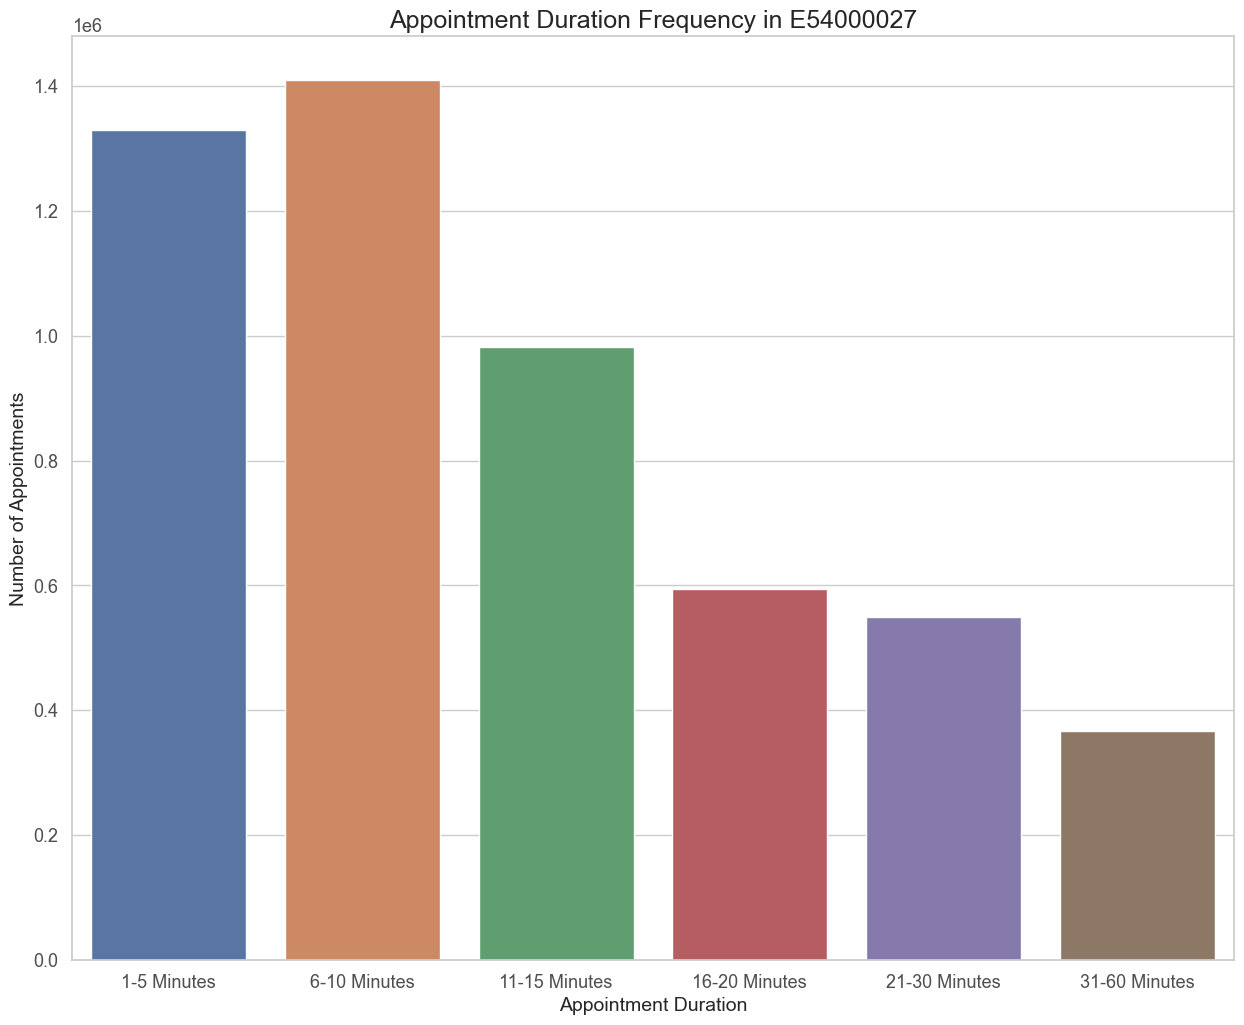

In [107]:
# Bar plot for appointments in E54000027.

ad_order = ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes',
            '16-20 Minutes', '21-30 Minutes', '31-60 Minutes']

sns.barplot(x='actual_duration', y='count_of_appointments', estimator=sum, 
            data=ad_loc[ad_loc['icb_ons_code'] == 'E54000027'], 
            order = ad_order )

plt.xlabel('Appointment Duration')
plt.ylabel('Number of Appointments')
plt.title('Appointment Duration Frequency in E54000027')

# Saving the figure. 
plt.savefig('appointment_duration_E54000027.png', dpi=300, bbox_inches='tight')

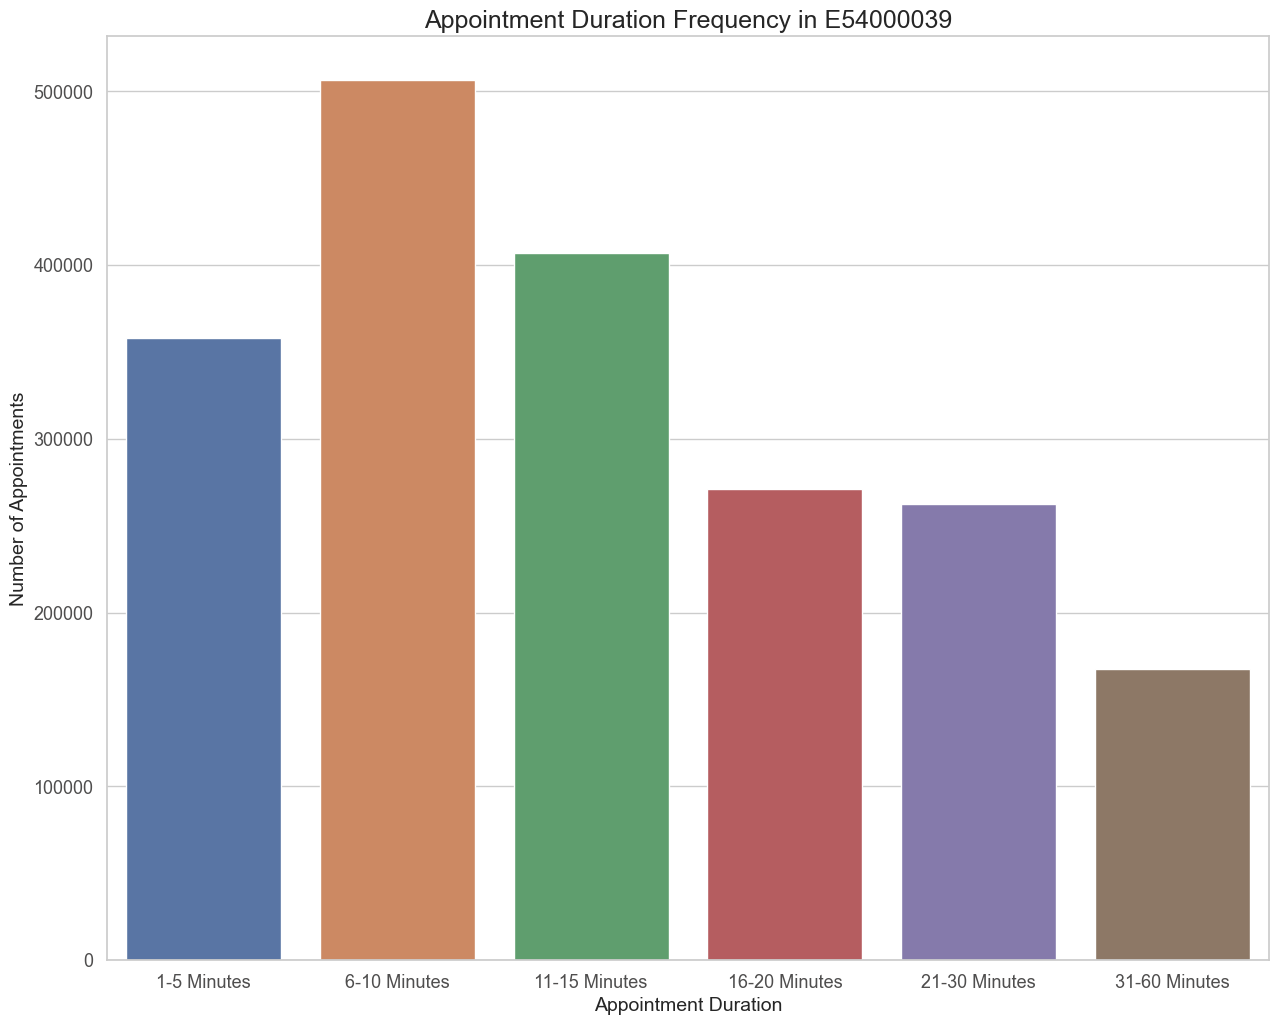

In [108]:
# Bar plot for appointments in E54000039.

ad_order = ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes',
            '16-20 Minutes', '21-30 Minutes', '31-60 Minutes']

sns.barplot(x='actual_duration', y='count_of_appointments', estimator=sum, 
            data=ad_loc[ad_loc['icb_ons_code'] == 'E54000039'], 
            order = ad_order )

plt.xlabel('Appointment Duration')
plt.ylabel('Number of Appointments')
plt.title('Appointment Duration Frequency in E54000039')

# Saving the figure. 
plt.savefig('appointment_duration_E54000039.png', dpi=300, bbox_inches='tight')

Therefore we can see that at both ends of the spectrum the target is significantly missed. From this point it may be best to indicate the number, and proportion, of appointments below 11 minutes and below 6 minutes. By doing this we can gauge which areas are under capacity and attribute a number to describe that severity.

In [109]:
# We can then pivot the data in order to rearrange the columns.
ad_loc_piv = ad_loc.pivot_table(index='icb_ons_code', 
                                columns='actual_duration', 
                                values='count_of_appointments', 
                                aggfunc='sum').reset_index()


# Let's add another column for total amount of appointments.
ad_loc_piv['Total_Appointments'] = (ad_loc_piv['1-5 Minutes'] + ad_loc_piv['6-10 Minutes'] + 
                                   ad_loc_piv['11-15 Minutes'] + ad_loc_piv['16-20 Minutes']+
                                   ad_loc_piv['21-30 Minutes'] + ad_loc_piv['31-60 Minutes'] 
                                   )

# Let's create a rate column for on or above target, 11-15 minutes or more.
ad_loc_piv['On or above target%'] = ((ad_loc_piv['11-15 Minutes'] + ad_loc_piv['16-20 Minutes']+
                                   ad_loc_piv['21-30 Minutes'] + ad_loc_piv['31-60 Minutes'])/
                                    ad_loc_piv['Total_Appointments']
                                   )*100

# Let's create a few more columns for 'very rushed' and 'rushed', 1-5 minutes and 6-10 minutes.
ad_loc_piv['Very_Rushed%'] = (ad_loc_piv['1-5 Minutes']/(ad_loc_piv['Total_Appointments']))*100
ad_loc_piv['Rushed%'] = (ad_loc_piv['6-10 Minutes']/(ad_loc_piv['Total_Appointments']))*100

# Finally, let us create a new DataFrame entirely, containing the specific metrics relating to capacity.
# ad_cm: actual duration capacity metrics.

ad_cm = ad_loc_piv.loc[:, ['icb_ons_code', 'On or above target%', 'Very_Rushed%', 'Rushed%']].copy()

ad_cm


actual_duration icb_ons_code  On or above target%  Very_Rushed%    Rushed%
0                  E54000008            52.248050     22.770333  24.981617
1                  E54000010            53.701107     19.484285  26.814609
2                  E54000011            53.478668     20.793940  25.727392
3                  E54000013            47.517389     24.737048  27.745563
4                  E54000015            48.113587     24.150699  27.735714
5                  E54000018            50.081591     22.591165  27.327243
6                  E54000019            50.085562     21.746969  28.167469
7                  E54000022            50.299466     23.555269  26.145265
8                  E54000023            48.575082     24.437484  26.987434
9                  E54000024            49.860210     22.531546  27.608244
10                 E54000025            50.662451     22.562189  26.775360
11                 E54000026            48.619272     23.652497  27.728231
12                 E54000027            47.652935     25.409125  26.937940
13                 E54000028            56.950161     19.952272  23.097567
14                 E54000029            53.428635     21.246900  25.324465
15                 E54000030            54.109862     21.013210  24.876928
16                 E54000031            53.972145     19.837486  26.190369
17                 E54000032            49.812946     23.599372  26.587682
18                 E54000034            50.072737     23.802979  26.124284
19                 E54000036            50.102230     22.988284  26.909486
20                 E54000037            50.335303     23.355501  26.309196
21                 E54000038            52.569645     21.587162  25.843193
22                 E54000039            56.176263     18.146715  25.677021
23                 E54000040            52.335780     20.548250  27.115970
24                 E54000041            51.014098     22.659696  26.326206
25                 E54000042            50.519851     23.102771  26.377378
26                 E54000043            50.829112     23.291000  25.879889
27                 E54000044            51.984708     21.637804  26.377489
28                 E54000048            53.745980     20.181238  26.072782
29                 E54000050            50.208329     22.398152  27.393519
30                 E54000051            51.964832     21.776736  26.258433
31                 E54000052            50.377627     23.145256  26.477117
32                 E54000053            51.363598     22.010400  26.626002
33                 E54000054            50.203202     23.226138  26.570660
34                 E54000055            50.903936     21.852508  27.243555
35                 E54000056            50.577781     23.143753  26.278466
36                 E54000057            53.139445     20.707280  26.153276
37                 E54000058            51.300228     22.385305  26.314467
38                 E54000059            49.775576     23.881363  26.343061
39                 E54000060            49.159216     24.143197  26.697587
40                 E54000061            51.090409     22.414467  26.495125
41                 E54000062            51.736871     21.546869  26.716260

In [110]:
# Let's order by 'on target' locations and take another look at the ad profile for the best performing location.

ad_cm.sort_values(by='On or above target%', ascending=False).head()

actual_duration icb_ons_code  On or above target%  Very_Rushed%    Rushed%
13                 E54000028            56.950161     19.952272  23.097567
22                 E54000039            56.176263     18.146715  25.677021
15                 E54000030            54.109862     21.013210  24.876928
16                 E54000031            53.972145     19.837486  26.190369
28                 E54000048            53.745980     20.181238  26.072782

<b>This shows that even in the best outcome, only 57% of appointments involved giving the patient the desired amount of attention. The bar plot for this looks like the below:

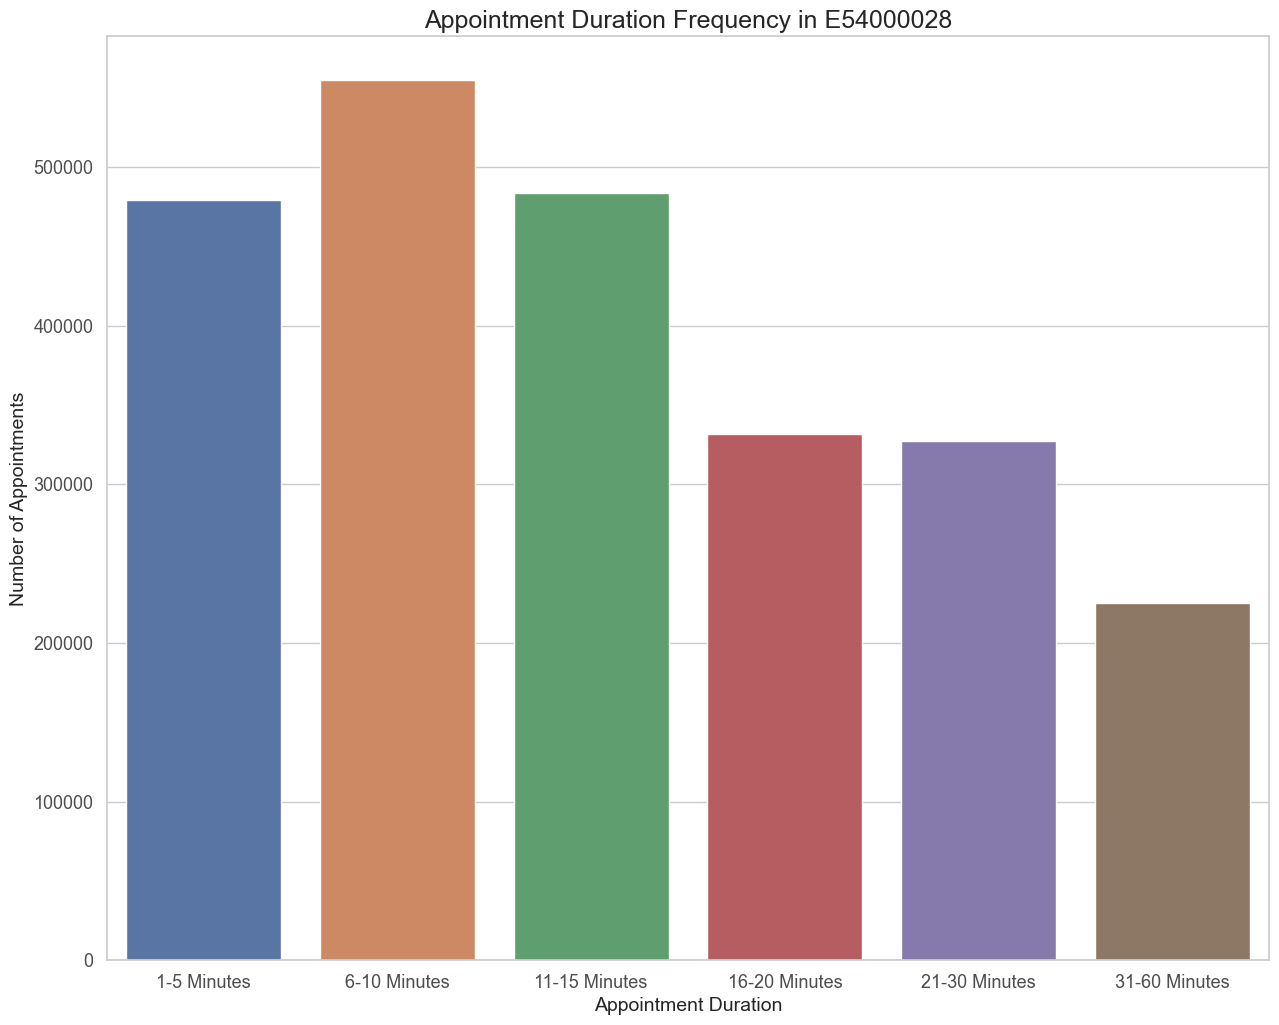

In [111]:
# Bar plot for appointments in E54000028.

ad_order = ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes',
            '16-20 Minutes', '21-30 Minutes', '31-60 Minutes']

sns.barplot(x='actual_duration', y='count_of_appointments', estimator=sum, 
            data=ad_loc[ad_loc['icb_ons_code'] == 'E54000028'], 
            order = ad_order )

plt.xlabel('Appointment Duration')
plt.ylabel('Number of Appointments')
plt.title('Appointment Duration Frequency in E54000028')

# Saving the figure. 
plt.savefig('appointment_duration_E54000028.png', dpi=300, bbox_inches='tight')

We have looked at this a few different ways now. It seems every location shows signs of being severely understaffed. The root cause may be a lot of consultations taking longer than 15 minutes, which then compromises time resources. The way to alleviate this would be to hire more staff however.

There is good evidence to suggest that capacity was not sufficient, either nationally, or at the local level. Attendance generally seems quite high, while a high percentage of lag times fall within the government target. Appointment durations are significantly below target however. This inclines us at this stage to regard staff numbers as the root cause of being below capacity.

The next stage of analysis is diagnostic. In order to investigate correlations between symptoms and causes of falling below capacity, we should concentrate these metrics into one DataFrame.

<h1 style="font-size: 18px;">4) Amalgamating Capacity Metrics.</h1>

In [112]:
# Let's look at lag time first . We already have the 'national_attendance' DataFrame to interrogate attendance.
# We need a DataFrame to interrogate the lag time metric.
# Let's begin by consolidating the 'lag_time_attendance' DataFrame.
# We are going to retain unattended appointments as these are still 'real' and represent 'waste' in the system.
lag_time_attendance_local = lag_time_attendance.groupby(['icb_ons_code', 
                                                         'time_between_book_and_appointment' ]).sum().reset_index()

lag_time_attendance_local = lag_time_attendance_local.pivot(index='icb_ons_code',
                                                            columns='time_between_book_and_appointment',
                                                            values='count_of_appointments'
                                                           ).reset_index()

lag_time_attendance_local.head()

time_between_book_and_appointment icb_ons_code    1 Day  15  to 21 Days  \
0                                    E54000008  3256619         1536130   
1                                    E54000010  1104843          678826   
2                                    E54000011   516139          322193   
3                                    E54000013   705127          623897   
4                                    E54000015  1187306          905330   

time_between_book_and_appointment  2 to 7 Days  22  to 28 Days  8  to 14 Days  \
0                                      6335667          852484        3324912   
1                                      2674905          338012        1438881   
2                                      1316278          158675         712559   
3                                      1838236          401249        1203946   
4                                      2979492          532049        1749892   

time_between_book_and_appointment  More than 28 Days  Same Day  
0                                             601143  15621591  
1                                             256780   6046217  
2                                              93647   3153146  
3                                             386532   4713817  
4                                             516104   7076651

At this point we need to re-affirm what we are measuring. We are looking for evidence of capacity being insufficient. 100% of appointments on the same day is not neccessarily a desirable outcome. 0% of appointments beyond 14 days, is, and has been stated as such by the government. Therefore, we will create a new column containing the % of appointments that occured within the target period.

Recall: we are best served by standardising our metrics to all reflect/measure success or failure, not a mix.

In [113]:
# We will create two other columns first with the raw count of appointments.

lag_time_attendance_local['Total_appointments'] = (lag_time_attendance_local['Same Day']+
                                                   lag_time_attendance_local['1 Day']+
                                                   lag_time_attendance_local['2 to 7 Days']+
                                                   lag_time_attendance_local['8  to 14 Days']+
                                                   lag_time_attendance_local['15  to 21 Days']+
                                                   lag_time_attendance_local['22  to 28 Days']+
                                                   lag_time_attendance_local['More than 28 Days'])

lag_time_attendance_local['in14days'] = (lag_time_attendance_local['Same Day']+
                                                   lag_time_attendance_local['1 Day']+
                                                   lag_time_attendance_local['2 to 7 Days']+
                                                   lag_time_attendance_local['8  to 14 Days'])

lag_time_attendance_local['lag_time_in14%'] = (lag_time_attendance_local['in14days']/
                                             lag_time_attendance_local['Total_appointments'])*100

# Reduce the DataFrame to the columns we want.
lag_time_attendance_local = lag_time_attendance_local[['icb_ons_code',
                                                       'Total_appointments', 
                                                       'in14days', 
                                                       'lag_time_in14%']].copy().reset_index(drop=True)

lag_time_attendance_local

time_between_book_and_appointment icb_ons_code  Total_appointments  in14days  \
0                                    E54000008            31528546  28538789   
1                                    E54000010            12538464  11264846   
2                                    E54000011             6272637   5698122   
3                                    E54000013             9872804   8461126   
4                                    E54000015            14946824  12993341   
5                                    E54000018            11681498  10776386   
6                                    E54000019            11096474   9936944   
7                                    E54000022            14717056  12572186   
8                                    E54000023            13084949  11479714   
9                                    E54000024            11741766  10052722   
10                                   E54000025            16792074  15018405   
11                                   E54000026            13521705  11910486   
12                                   E54000027            28114664  25950049   
13                                   E54000028            15858072  14751176   
14                                   E54000029            22533973  20975210   
15                                   E54000030            19242007  17714982   
16                                   E54000031            17240832  15796091   
17                                   E54000032            21436843  18698773   
18                                   E54000034             8829695   8025329   
19                                   E54000036             9062960   8025233   
20                                   E54000037            18234858  15937499   
21                                   E54000038             7466923   6427428   
22                                   E54000039            12002963  10530191   
23                                   E54000040            12928953  10971469   
24                                   E54000041            10560615   8943896   
25                                   E54000042            21983306  19244430   
26                                   E54000043             8763689   7342582   
27                                   E54000044            21642701  19266393   
28                                   E54000048            20541446  18038465   
29                                   E54000050            41041466  36412984   
30                                   E54000051            21857738  19216454   
31                                   E54000052            11801674  10297460   
32                                   E54000053            21475101  18569697   
33                                   E54000054            34332934  30162408   
34                                   E54000055            15249693  13873932   
35                                   E54000056            12357239  11071622   
36                                   E54000057            32244739  28479374   
37                                   E54000058            13976279  11766820   
38                                   E54000059             9541841   8601971   
39                                   E54000060            15286125  12960924   
40                                   E54000061            18299893  15732328   
41                                   E54000062            16665734  15222027   

time_between_book_and_appointment  lag_time_in14%  
0                                       90.517301  
1                                       89.842312  
2                                       90.840933  
3                                       85.701347  
4                                       86.930448  
5                                       92.251747  
6                                       89.550464  
7                                       85.425957  
8                                       87.732203  
9                                      

In [114]:
# Next we can move to the attendance rate per locality. 

loc_attd_rate = national_attendance.groupby(['icb_ons_code', 'appointment_status']).sum().reset_index()


loc_attd_rate = loc_attd_rate.pivot(index='icb_ons_code',
                                    columns='appointment_status',
                                    values='count_of_appointments').reset_index()

loc_attd_rate['Attendance_Rate%'] = (loc_attd_rate['Attended']/(loc_attd_rate['Attended']+
                                                              loc_attd_rate['DNA']))*100

loc_attd_rate


appointment_status icb_ons_code  Attended      DNA  Attendance_Rate%
0                     E54000008  29881646  1658787         94.740760
1                     E54000010  11904788   637789         94.915008
2                     E54000011   6012723   260809         95.842709
3                     E54000013   9516495   359964         96.355333
4                     E54000015  14408058   542796         96.369465
5                     E54000018  11122652   568621         95.136364
6                     E54000019  10638570   460344         95.852351
7                     E54000022  14221374   498990         96.610206
8                     E54000023  12644712   443964         96.608030
9                     E54000024  11303414   440628         96.248072
10                    E54000025  16160309   636758         96.209112
11                    E54000026  13146769   383465         97.165866
12                    E54000027  26848972  1286262         95.428288
13                    E54000028  15038067   831775         94.758769
14                    E54000029  21267205  1317005         94.168470
15                    E54000030  18158276  1107753         94.250227
16                    E54000031  16330355   914695         94.695898
17                    E54000032  20426411  1015035         95.266014
18                    E54000034   8419975   411612         95.339320
19                    E54000036   8667555   399583         95.593064
20                    E54000037  17557944   681530         96.263434
21                    E54000038   7126198   343845         95.397014
22                    E54000039  11424451   581650         95.155380
23                    E54000040  12528475   404831         96.869857
24                    E54000041  10229325   333381         96.843792
25                    E54000042  21067697   926561         95.787260
26                    E54000043   8463235   302390         96.550275
27                    E54000044  20729556   919275         95.753697
28                    E54000048  19582053   964458         95.305977
29                    E54000050  39374437  1676790         95.915372
30                    E54000051  21107639   757560         96.535316
31                    E54000052  11292655   511491         95.666853
32                    E54000053  20699094   781077         96.363730
33                    E54000054  33182630  1159691         96.623143
34                    E54000055  14361165   893541         94.142522
35                    E54000056  11938337   422986         96.578149
36                    E54000057  30310360  1946114         93.966749
37                    E54000058  13529372   450691         96.776188
38                    E54000059   9247846   295150         96.907156
39                    E54000060  14699874   589599         96.143759
40                    E54000061  17534973   768811         95.799716
41                    E54000062  15650234  1023176         93.863427

In [115]:
# We are going to merge the DataFrames.
# Let's revisit our duration DataFrame, restricting to just the 'success' metric.
# We should also rename it so it is intuitive.
ad_cm.head()

actual_duration icb_ons_code  On or above target%  Very_Rushed%    Rushed%
0                  E54000008            52.248050     22.770333  24.981617
1                  E54000010            53.701107     19.484285  26.814609
2                  E54000011            53.478668     20.793940  25.727392
3                  E54000013            47.517389     24.737048  27.745563
4                  E54000015            48.113587     24.150699  27.735714

In [116]:
# Rename 'on or above' and restrict the DataFrame.
ad_cm.rename(columns={'On or above target%': '11min_up%'}, inplace=True)

ad_cm = ad_cm[['icb_ons_code', '11min_up%']]
ad_cm.head()


actual_duration icb_ons_code  11min_up%
0                  E54000008  52.248050
1                  E54000010  53.701107
2                  E54000011  53.478668
3                  E54000013  47.517389
4                  E54000015  48.113587

In [117]:
# Merging the three DataFrames into one.

lagtimeXattd = pd.merge(lag_time_attendance_local, loc_attd_rate, on='icb_ons_code')

capacity = pd.merge(lagtimeXattd, ad_cm, on='icb_ons_code')

capacity.head() 

icb_ons_code  Total_appointments  in14days  lag_time_in14%  Attended  \
0    E54000008            31528546  28538789       90.517301  29881646   
1    E54000010            12538464  11264846       89.842312  11904788   
2    E54000011             6272637   5698122       90.840933   6012723   
3    E54000013             9872804   8461126       85.701347   9516495   
4    E54000015            14946824  12993341       86.930448  14408058   

       DNA  Attendance_Rate%  11min_up%  
0  1658787         94.740760  52.248050  
1   637789         94.915008  53.701107  
2   260809         95.842709  53.478668  
3   359964         96.355333  47.517389  
4   542796         96.369465  48.113587

We have several columns that indicate number of appointments. They don't align exactly. This is becuase they derive from different data sets, in which different 'unknown' values were excluded. At this stage we do not need most of these columns. I will however keep the first, 'Total_appointments' column as a proxy for how busy the locality is.

In [118]:
# Returning just the desired columns.
capacity = capacity[['icb_ons_code', 'Total_appointments', 'lag_time_in14%', 
                     'Attendance_Rate%', '11min_up%']].copy()
capacity.head()

icb_ons_code  Total_appointments  lag_time_in14%  Attendance_Rate%  \
0    E54000008            31528546       90.517301         94.740760   
1    E54000010            12538464       89.842312         94.915008   
2    E54000011             6272637       90.840933         95.842709   
3    E54000013             9872804       85.701347         96.355333   
4    E54000015            14946824       86.930448         96.369465   

   11min_up%  
0  52.248050  
1  53.701107  
2  53.478668  
3  47.517389  
4  48.113587

<b> We now have a DataFrame that offers basic performance metrics as it relates to whether capcity was sifficient.<b>
    
The meta data is as follows:
    
    lag_time_in14%: Percentage of appointments that occured within 14 days of                       being booked.
    
    Attendance_Rate%: Percentage of appointments actually attended.
    
    11min_up%: Percentage of appointments lasting 11 minutes or longer.

<h1><strong>Diagnostic Analysis</strong></h1>

In [119]:
# Let's read in a few more DataFrames.
# populations.csv is pulled from NHS England. 
# Source: https://www.england.nhs.uk/wp-content/uploads/2022/04/j-overall-weighted-populations-22-23.xlsx
# The populations data can be read in and added to the above capacity DataFrame.

populations = pd.read_csv('populations.csv')
populations.head()

icb_ons_code  \
0    E54000048   
1    E54000061   
2    E54000019   
3    E54000026   
4    E54000024   

                                                              name  \
0           NHS Lancashire and South Cumbria Integrated Care Board   
1                        NHS South Yorkshire Integrated Care Board   
2       NHS Herefordshire and Worcestershire Integrated Care Board   
3                    NHS Mid and South Essex Integrated Care Board   
4  NHS Bedfordshire, Luton and Milton Keynes Integrated Care Board   

   2022/2023_population  
0               1810011  
1               1483968  
2                818249  
3               1256523  
4               1070212

In [120]:
# Let's do due dilligence and describe the data breifly.
populations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   icb_ons_code          42 non-null     object
 1   name                  42 non-null     object
 2   2022/2023_population  42 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [121]:
# We will also check explicitly again for null values.
populations.isnull().sum()

icb_ons_code            0
name                    0
2022/2023_population    0
dtype: int64

In [122]:
#Let's merge this with the capacity DataFrame.
capacity = pd.merge(capacity, populations, on='icb_ons_code')

capacity.head() 

icb_ons_code  Total_appointments  lag_time_in14%  Attendance_Rate%  \
0    E54000008            31528546       90.517301         94.740760   
1    E54000010            12538464       89.842312         94.915008   
2    E54000011             6272637       90.840933         95.842709   
3    E54000013             9872804       85.701347         96.355333   
4    E54000015            14946824       86.930448         96.369465   

   11min_up%                                                             name  \
0  52.248050                NHS Cheshire and Merseyside Integrated Care Board   
1  53.701107       NHS Staffordshire and Stoke-on-Trent Integrated Care Board   
2  53.478668         NHS Shropshire, Telford and Wrekin Integrated Care Board   
3  47.517389                           NHS Lincolnshire Integrated Care Board   
4  48.113587  NHS Leicester, Leicestershire and Rutland Integrated Care Board   

   2022/2023_population  
0               2714167  
1               1172053  
2                521391  
3                806534  
4               1185265

In [123]:
# Let's now read in the staff.csv.
# staff.csv is pulled from NHS digital.
# Source: https://digital.nhs.uk/data-and-information/publications/statistical/nhs-workforce-statistics/july-2023

staff = pd.read_csv('staff.csv')
staff.head()

icb_ons_code                                   name  Sep-09  Oct-09  Nov-09  \
0    E54000048           Lancashire and South Cumbria  32,073  32,290  32,313   
1    E54000061                        South Yorkshire  35,156  35,307  35,408   
2    E54000019       Herefordshire and Worcestershire  10,429  10,489  10,520   
3    E54000026                    Mid and South Essex  15,521  15,708  15,779   
4    E54000024  Bedfordshire, Luton and Milton Keynes  11,183  11,279  11,324   

   Dec-09  Jan-10  Feb-10  Mar-10  Apr-10  ...  Oct-22  Nov-22  Dec-22  \
0  32,236  32,253  32,270  32,357  32,293  ...  37,616  37,937  37,802   
1  35,286  35,517  35,554  35,583  35,472  ...  37,890  38,030  38,100   
2  10,553  10,580  10,589  10,627  10,620  ...  13,047  13,108  13,088   
3  15,758  15,910  15,856  15,907  17,021  ...  19,454  19,615  19,689   
4  11,253  11,297  11,316  11,361  10,111  ...  11,036  11,123  11,138   

   Jan-23  Feb-23  Mar-23  Apr-23  May-23  Jun-23  Jul-23  
0  38,124  38,314  38,529  38,501  38,605  38,894  38,953  
1  38,324  38,492  38,594  38,516  38,601  38,656  38,666  
2  13,174  13,180  13,230  13,223  13,301  13,350  13,403  
3  19,897  20,017  20,052  20,052  20,152  20,199  20,213  
4  11,291  11,350  11,399  11,449  11,514  11,543  11,647  

[5 rows x 169 columns]

In [124]:
# Let's try melting this DataFrame to make it easier to intuit.
staff = pd.melt(staff, id_vars=['icb_ons_code', 'name'], var_name='Date', value_name='staff')

print(staff.shape)
print(staff.dtypes)
staff

(7014, 4)
icb_ons_code    object
name            object
Date            object
staff           object
dtype: object


icb_ons_code                                   name    Date   staff
0       E54000048           Lancashire and South Cumbria  Sep-09  32,073
1       E54000061                        South Yorkshire  Sep-09  35,156
2       E54000019       Herefordshire and Worcestershire  Sep-09  10,429
3       E54000026                    Mid and South Essex  Sep-09  15,521
4       E54000024  Bedfordshire, Luton and Milton Keynes  Sep-09  11,183
...           ...                                    ...     ...     ...
7009    E54000031                      South West London  Jul-23  27,226
7010    E54000054                         West Yorkshire  Jul-23  60,285
7011    E54000018              Coventry and Warwickshire  Jul-23  19,671
7012    E54000063                      Surrey Heartlands  Jul-23  16,553
7013    E54000008                Cheshire and Merseyside  Jul-23  71,214

[7014 rows x 4 columns]

In [125]:
# We will need to ammend the data types.
# Change the 'Date' column to time type while reformatting it to be consistent with other DataFrames.
staff['Date'] = pd.to_datetime(staff['Date'], format='%b-%y').dt.strftime('%Y-%m')

# Change the 'staff' column to integer. To do this, we will need to replace the commas as well.
staff['staff'] = staff['staff'].str.replace(',', '').astype(int)

staff

icb_ons_code                                   name     Date  staff
0       E54000048           Lancashire and South Cumbria  2009-09  32073
1       E54000061                        South Yorkshire  2009-09  35156
2       E54000019       Herefordshire and Worcestershire  2009-09  10429
3       E54000026                    Mid and South Essex  2009-09  15521
4       E54000024  Bedfordshire, Luton and Milton Keynes  2009-09  11183
...           ...                                    ...      ...    ...
7009    E54000031                      South West London  2023-07  27226
7010    E54000054                         West Yorkshire  2023-07  60285
7011    E54000018              Coventry and Warwickshire  2023-07  19671
7012    E54000063                      Surrey Heartlands  2023-07  16553
7013    E54000008                Cheshire and Merseyside  2023-07  71214

[7014 rows x 4 columns]

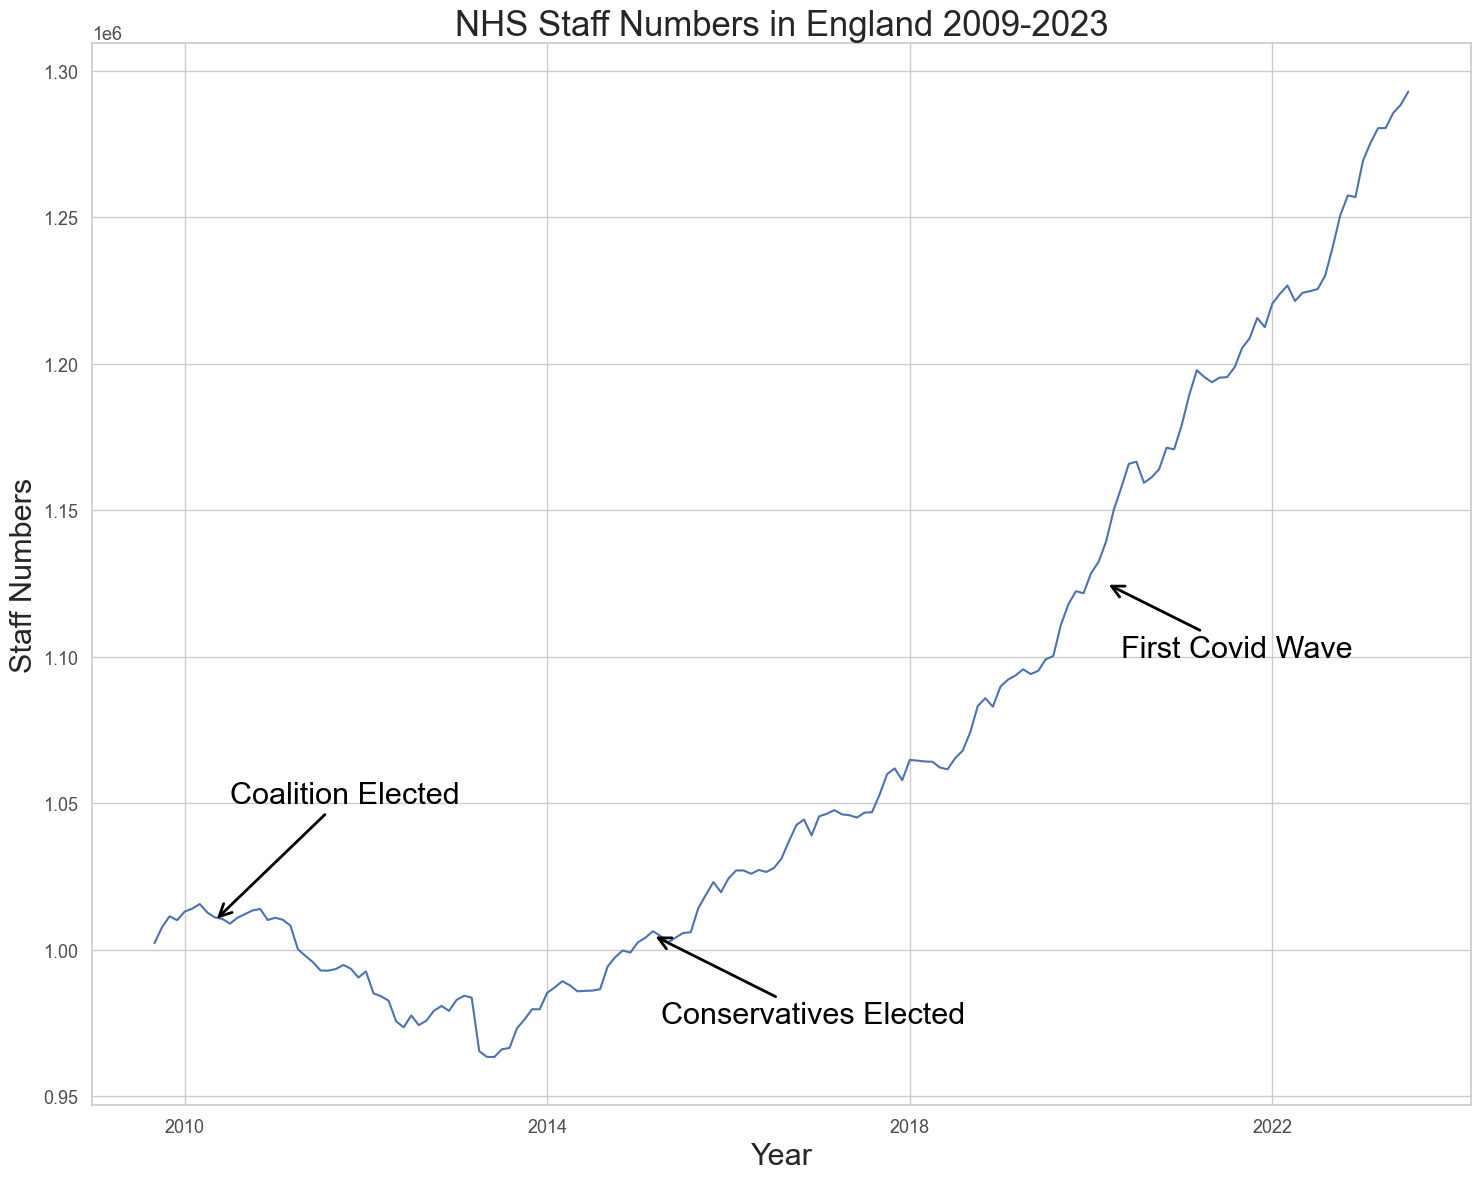

In [126]:
# Let us take a moment to plot staff numbers, nationally over time.
# Group by date.
staff_national = staff.groupby('Date').sum().reset_index()

# Plotting the graph with Seaborn.
ax = sns.lineplot(x='Date', y='staff', data=staff_national)

# Adding bespoke labels.
tick_positions = ['2010-01', '2014-01', '2018-01', '2022-01']
tick_labels = ['2010', '2014', '2018', '2022']

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

# Add annotations.

plt.annotate('Coalition Elected', xy=('2010-05', 1010000), xytext=('2010-07', 1050000),
             arrowprops=dict(color='black', arrowstyle='->', linewidth=2),
             fontsize=22, color='black')

plt.annotate('Conservatives Elected', xy=('2015-03', 1005000), xytext=('2015-04', 975000),
             arrowprops=dict(color='black', arrowstyle='->', linewidth=2),
             fontsize=22, color='black')

plt.annotate('First Covid Wave', xy=('2020-03', 1125000), xytext=('2020-05', 1100000),
             arrowprops=dict(color='black', arrowstyle='->', linewidth=2),
             fontsize=22, color='black')

# Adding a title and changing the axis names
plt.title('NHS Staff Numbers in England 2009-2023', fontsize=25)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Staff Numbers', fontsize=22)

# Tight layout to remove overlap.
plt.tight_layout()

# Saving the figure. 
plt.savefig('NHS Staff Numbers in England 2009-2023.png', dpi=300, bbox_inches='tight')

plt.show()

In [127]:
# Let's now build a DataFrame for local staff. 
# The population data is for 2022, so we should get an average local staff count for the same period.
staff2022 = staff[(staff['Date']>='2022-01')&
                 (staff['Date']<='2022-12')]

staff2022 = staff2022.groupby('icb_ons_code').mean().reset_index()

# Round the staff value.
staff2022['staff'] = round(staff2022['staff'])

staff2022.head()

icb_ons_code    staff
0    E54000008  68245.0
1    E54000010  19459.0
2    E54000011   8872.0
3    E54000013  11866.0
4    E54000015  19540.0

In [128]:
# Let us now merge this onto our existing capacity DataFrame.
capacity = pd.merge(capacity, staff2022, on='icb_ons_code')

In [129]:
# Now we can ultimately derive population per staff count.
capacity['pop/staff2022'] = capacity['2022/2023_population']/capacity['staff']

In [130]:
# As a final addition, it would be useful to see appointments per pop as a rough guide of how 'sick' a location is.
capacity['appts/pop'] = capacity['Total_appointments']/capacity['2022/2023_population']

In [131]:
# Now we can examine the DataFrame.
capacity.head()

icb_ons_code  Total_appointments  lag_time_in14%  Attendance_Rate%  \
0    E54000008            31528546       90.517301         94.740760   
1    E54000010            12538464       89.842312         94.915008   
2    E54000011             6272637       90.840933         95.842709   
3    E54000013             9872804       85.701347         96.355333   
4    E54000015            14946824       86.930448         96.369465   

   11min_up%                                                             name  \
0  52.248050                NHS Cheshire and Merseyside Integrated Care Board   
1  53.701107       NHS Staffordshire and Stoke-on-Trent Integrated Care Board   
2  53.478668         NHS Shropshire, Telford and Wrekin Integrated Care Board   
3  47.517389                           NHS Lincolnshire Integrated Care Board   
4  48.113587  NHS Leicester, Leicestershire and Rutland Integrated Care Board   

   2022/2023_population    staff  pop/staff2022  appts/pop  
0               2714167  68245.0      39.770928  11.616288  
1               1172053  19459.0      60.231924  10.697864  
2                521391   8872.0      58.768147  12.030582  
3                806534  11866.0      67.970167  12.241026  
4               1185265  19540.0      60.658393  12.610534

This is a useful DataFrame. We are going to investigate relationships now. We can refine a bit to exlude unecessary fields, i.e. we don't need population, staff, AND pop/staff.

In [132]:
# We are only interested in comparing relationships between a few of these metrics. So let's consolidate in a new DataFrame.
capacity_metrics = capacity[['icb_ons_code', 'lag_time_in14%', 'Attendance_Rate%', 
                             '11min_up%', 'pop/staff2022', 'appts/pop']]

capacity_metrics.head()


icb_ons_code  lag_time_in14%  Attendance_Rate%  11min_up%  pop/staff2022  \
0    E54000008       90.517301         94.740760  52.248050      39.770928   
1    E54000010       89.842312         94.915008  53.701107      60.231924   
2    E54000011       90.840933         95.842709  53.478668      58.768147   
3    E54000013       85.701347         96.355333  47.517389      67.970167   
4    E54000015       86.930448         96.369465  48.113587      60.658393   

   appts/pop  
0  11.616288  
1  10.697864  
2  12.030582  
3  12.241026  
4  12.610534

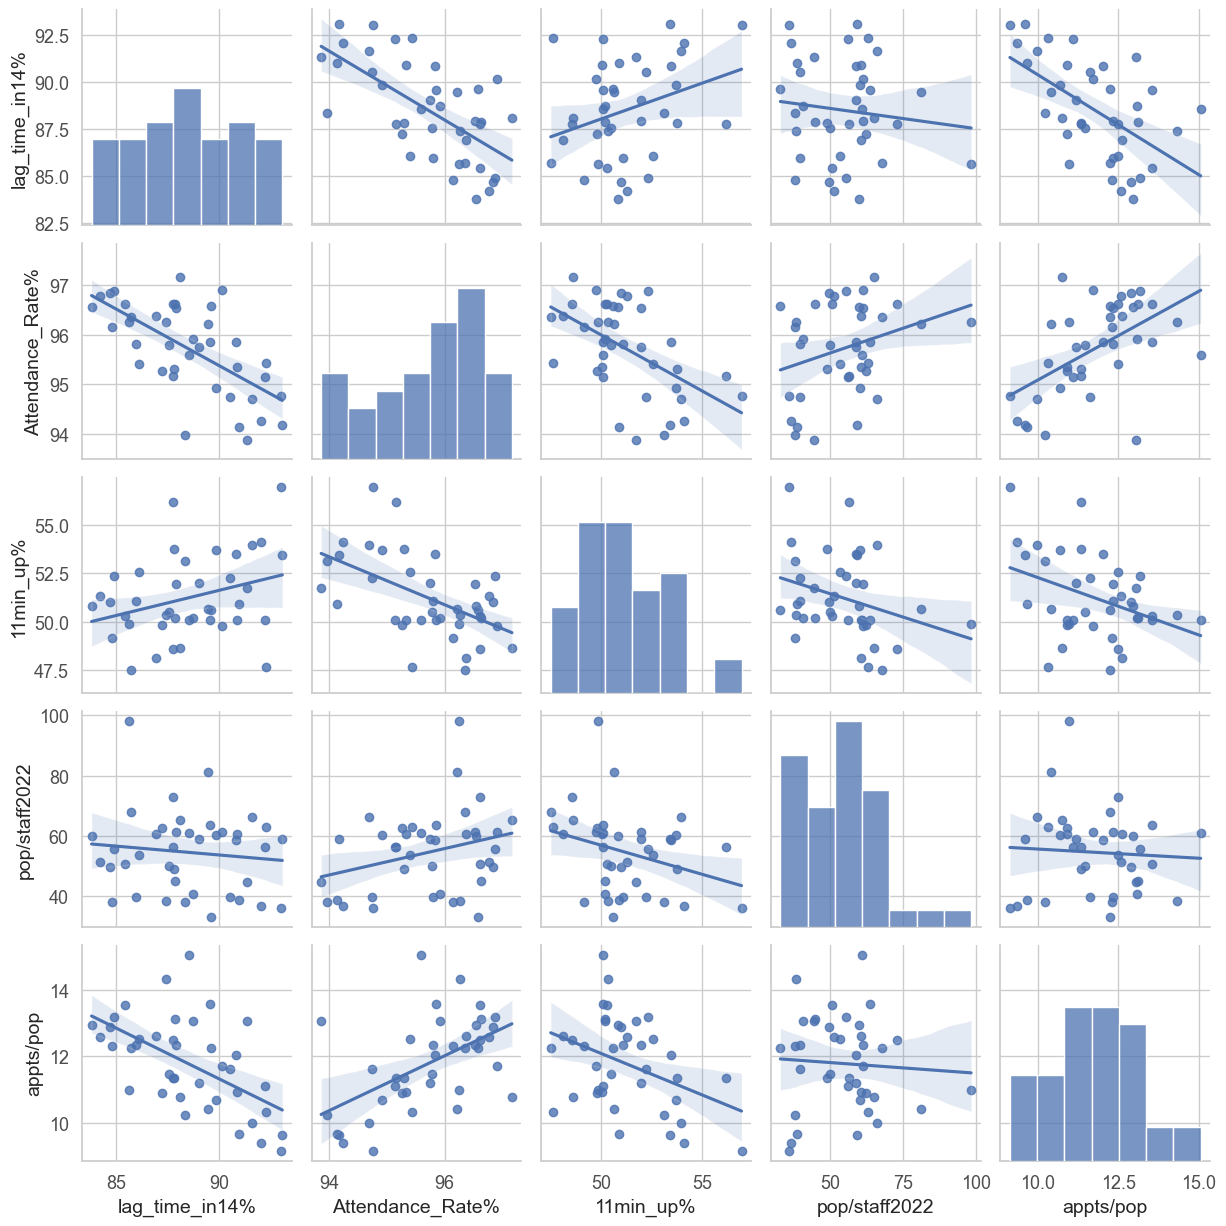

In [133]:
sns.pairplot(capacity_metrics, kind='reg')

# Saving the figure. 
plt.savefig('metrics_relationships', dpi=300, bbox_inches='tight')

<b>So what does this tell us? What correlations do we notice? What distributions are there?:<b>
    
    The more appointments/pop (which we shall call, 'sicker the location'), the less appointments occur in 14 days. This was expected.
    
    The sicker the location, the better the attendance. Worth noting the attendance delta is around 2%, so this is a weak relationship at best.
    
    The sicker the location, the less we see consultations lasting the targetted amount of time.
    
    There are a small number of outlier locations that appear 'sicker'.
    
    We see that attendance rate is inversely proportional to the likelihood that the patient will recieve an appointment of at least 11 minutes.
    
    Attendance rate increases the longer one has to wait for an appointment. (These last two points suggest the perception of a scarcity of resources leads to greater respect for those resources.)
    
    There are a small number of locations with busy staff.

<b>Some of these relationships appear very weakly correlated. Let's remove outliers and see if that changes things.

In [134]:
# I have identified consultation times as the primary area of failure, so I will remove outliers from this column.

time_q1 = capacity_metrics['11min_up%'].quantile(0.25)
time_q2 = capacity_metrics['11min_up%'].quantile(0.5)
time_q3 = capacity_metrics['11min_up%'].quantile(0.75)
time_iqr = time_q3-time_q1
time_lowerlimit = time_q1-(1.5*time_iqr)
time_upperlimit = time_q3+(1.5*time_iqr)

print(f"Therefore we will exclude values below {time_lowerlimit} and above {time_upperlimit}")

Therefore we will exclude values below 46.60707451164196 and above 55.86654968132378


In [135]:
# Check whether there are any to exclude.
capacity_metrics.describe()

lag_time_in14%  Attendance_Rate%  11min_up%  pop/staff2022  appts/pop
count       40.000000         40.000000  40.000000      40.000000  40.000000
mean        88.485773         95.718288  51.222866      54.579812  11.781400
std          2.576536          0.907695   2.120881      13.426952   1.377486
min         83.784146         93.863427  47.517389      33.021349   9.145049
25%         86.717503         95.150626  50.079378      43.644851  10.867505
50%         88.203374         95.821212  50.745781      56.288226  11.872386
75%         90.598209         96.539056  52.394246      61.228730  12.680807
max         93.082609         97.165866  56.950161      98.292799  15.060104

In [136]:
# Excluding outlier.
capacity_metrics_sig = capacity_metrics[
    (capacity_metrics['11min_up%']>time_lowerlimit) &
    (capacity_metrics['11min_up%']<time_upperlimit)]
                                       

capacity_metrics_sig.describe()

lag_time_in14%  Attendance_Rate%  11min_up%  pop/staff2022  appts/pop
count       38.000000         38.000000  38.000000      38.000000  38.000000
mean        88.386342         95.758352  50.941795      55.020249  11.862216
std          2.533008          0.912881   1.763651      13.433635   1.341779
min         83.784146         93.863427  47.517389      33.021349   9.379157
25%         86.291614         95.276005  50.074951      44.676173  10.908883
50%         88.203374         95.847530  50.620116      57.485995  12.135804
75%         90.425480         96.546535  52.182214      61.288894  12.821354
max         93.082609         97.165866  54.109862      98.292799  15.060104

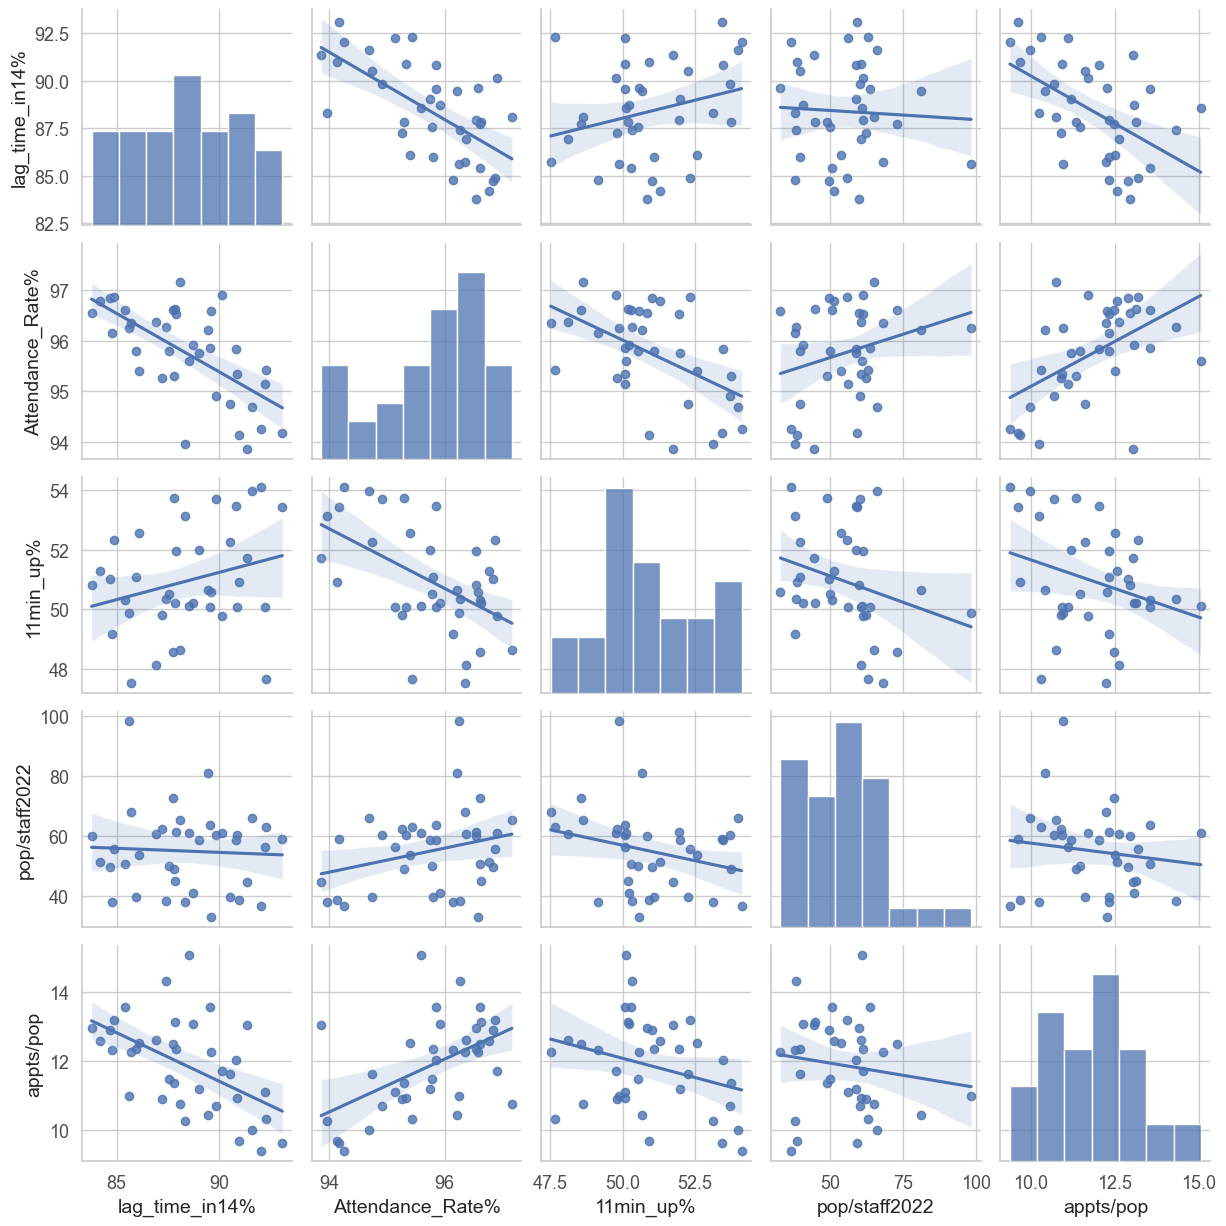

In [137]:
# This has only removed two values. But let's plot relationships again to check if there are any discernable differences.
sns.pairplot(capacity_metrics_sig, kind='reg')

There is no discernable change. The final part of this notebook shall we on creating graphs to communicate our findings in a digestible manner, as pairplots are not suitible to present to stakeholders. 

In [138]:
# We need to communicate that consultation times are the main area of failure.
# To do this we will create a boxplot consultation times to attendance and lag time. 
# We will use capacity_metrics as the outliers will be clear on the plot anyway.
# We will need to melt and manipulate the DataFrame first.

capacity_categories = pd.melt(capacity_metrics, id_vars=['icb_ons_code'], var_name='Metric', value_name='Score')

# View DataFrame, top and bottom.
capacity_categories

icb_ons_code          Metric      Score
0      E54000008  lag_time_in14%  90.517301
1      E54000010  lag_time_in14%  89.842312
2      E54000011  lag_time_in14%  90.840933
3      E54000013  lag_time_in14%  85.701347
4      E54000015  lag_time_in14%  86.930448
..           ...             ...        ...
195    E54000058       appts/pop  12.579807
196    E54000059       appts/pop  11.714191
197    E54000060       appts/pop  12.320585
198    E54000061       appts/pop  12.331730
199    E54000062       appts/pop  13.046156

[200 rows x 3 columns]

In [139]:
# Check for blanks.
capacity_categories.isnull().sum()

icb_ons_code    0
Metric          0
Score           0
dtype: int64

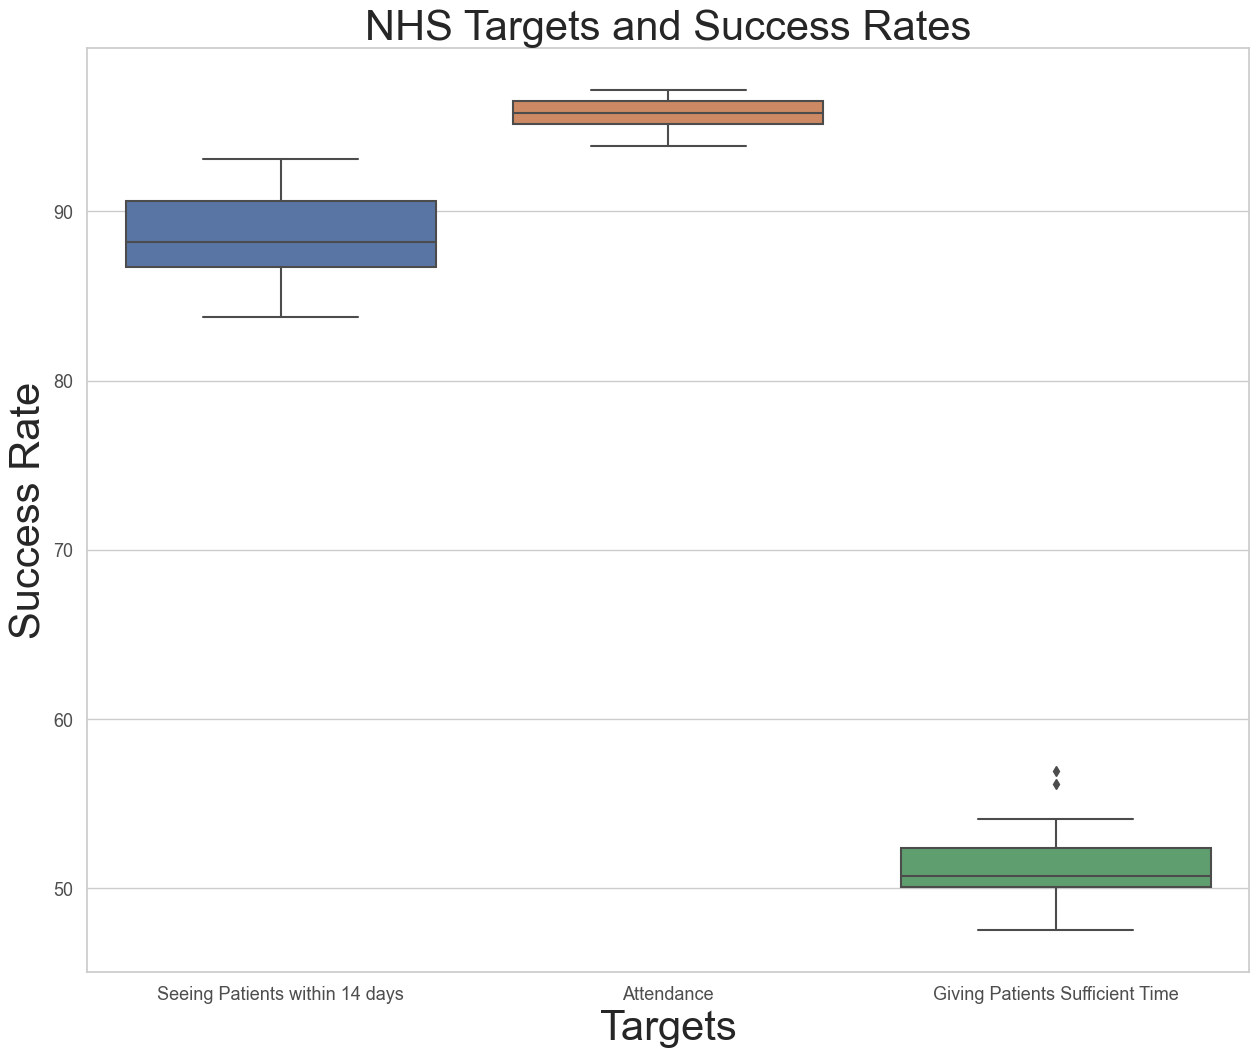

In [140]:
# Creating the boxplot.
# Restricting to just the metrics we want to show.
sns.boxplot(x='Metric', y='Score', data=capacity_categories[capacity_categories['Metric'].isin(['lag_time_in14%', 
                                                                                                'Attendance_Rate%', 
                                                                                                '11min_up%'])])


# Naming the x axis labels more appropriately.
plt.xticks(ticks=[0, 1, 2], labels=['Seeing Patients within 14 days', 'Attendance', 'Giving Patients Sufficient Time'])

# Title and axis names.
plt.title('NHS Targets and Success Rates', size = 30)
plt.xlabel('Targets', size = 30)
plt.ylabel('Success Rate', size = 30)

# Saving the figure. 
plt.savefig('metrics_outcomes', dpi=300, bbox_inches='tight')

plt.show()

<b>We also need to communicate the public attitude to resources.

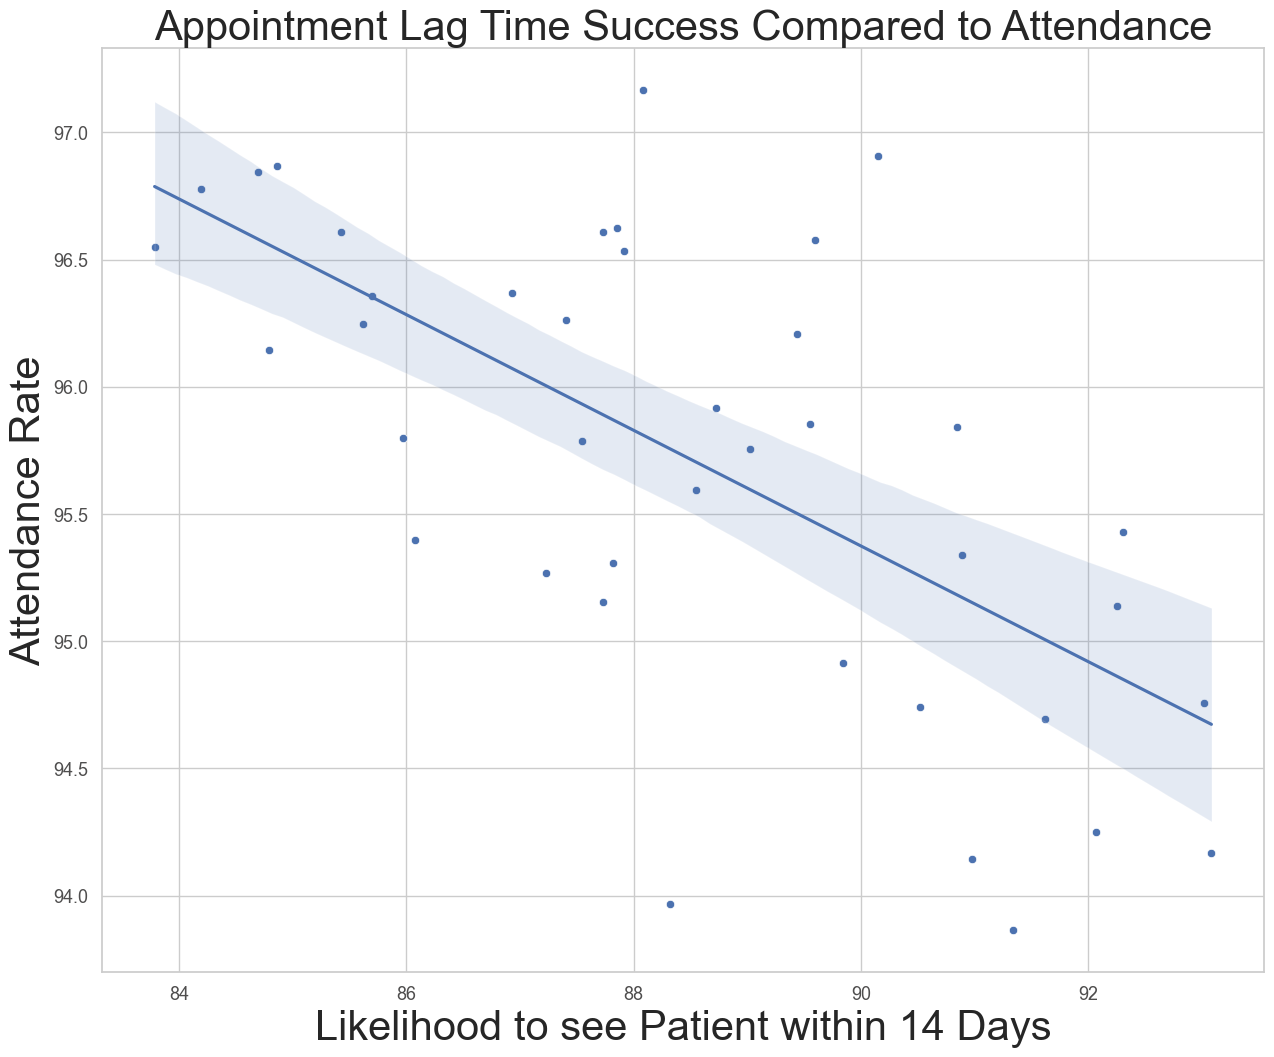

In [148]:
# Compare Appointment Lag Time Success Compared to Attendance
ax = sns.scatterplot(x='lag_time_in14%', y='Attendance_Rate%', data=capacity_metrics)

# Add a line of best fit.
sns.regplot(x='lag_time_in14%', y='Attendance_Rate%', data=capacity_metrics, scatter=False, ax=ax)

# Title and axis names.
plt.title('Appointment Lag Time Success Compared to Attendance', size = 30)
plt.xlabel('Likelihood to see Patient within 14 Days', size = 30)
plt.ylabel('Attendance Rate', size = 30)

# Saving the figure. 
plt.savefig('Appointment Lag Time Success Compared to Attendance', dpi=300, bbox_inches='tight')

plt.show()

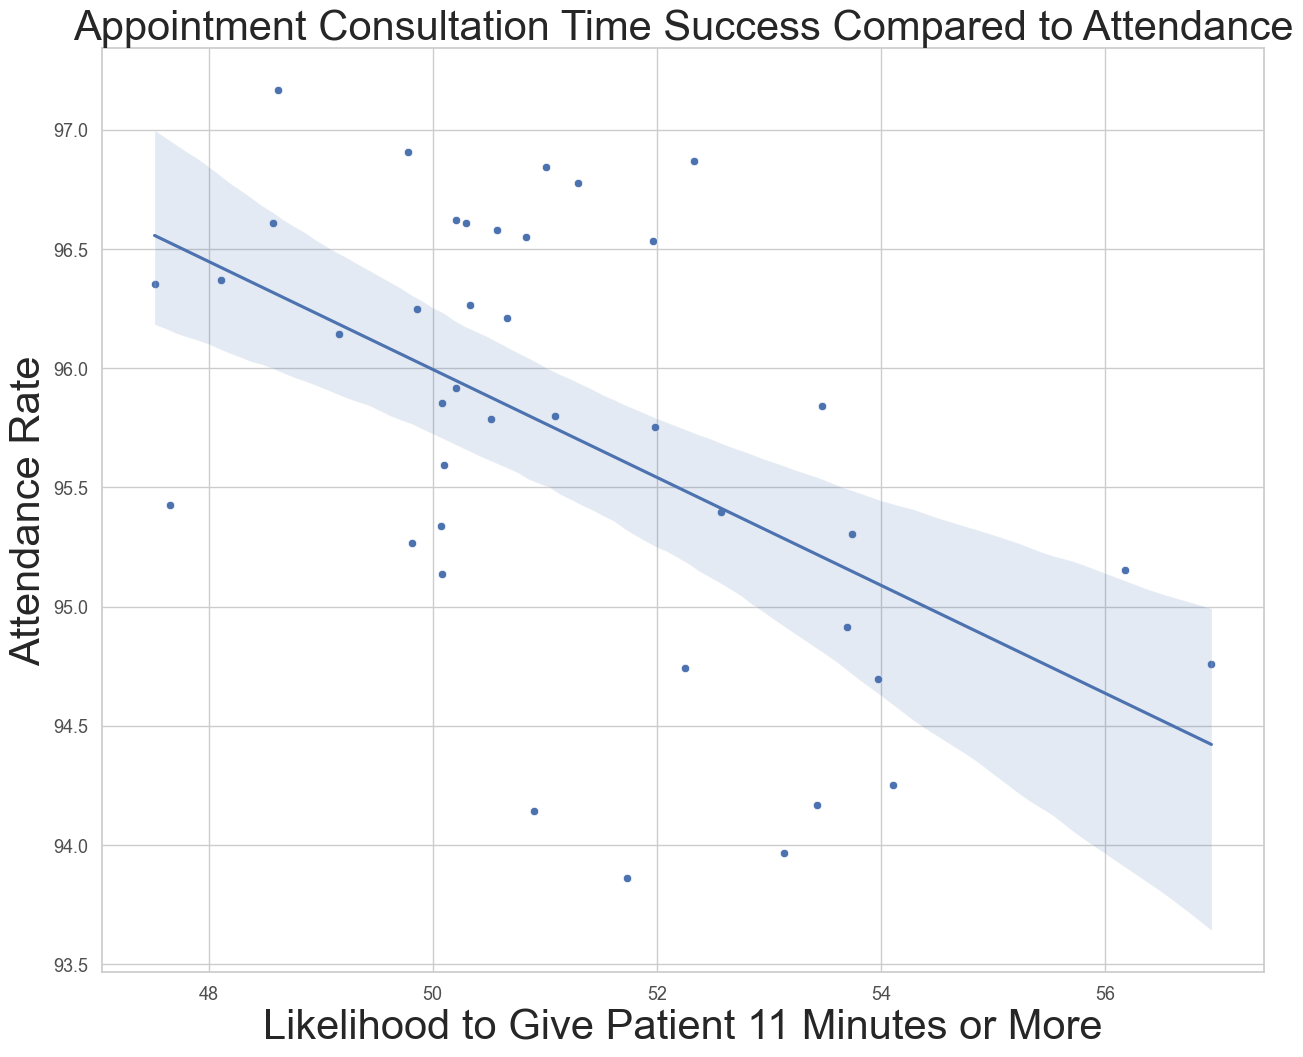

In [149]:
# Compare Appointment Lag Time Success Compared to Attendance
ax = sns.scatterplot(x='11min_up%', y='Attendance_Rate%', data=capacity_metrics)

# Add a line of best fit.
sns.regplot(x='11min_up%', y='Attendance_Rate%', data=capacity_metrics, scatter=False, ax=ax)

# Title and axis names.
plt.title('Appointment Consultation Time Success Compared to Attendance', size = 30)
plt.xlabel('Likelihood to Give Patient 11 Minutes or More', size = 30)
plt.ylabel('Attendance Rate', size = 30)

# Saving the figure. 
plt.savefig('Appointment Consultation Time Success Compared to Attendance', dpi=300, bbox_inches='tight')

plt.show()

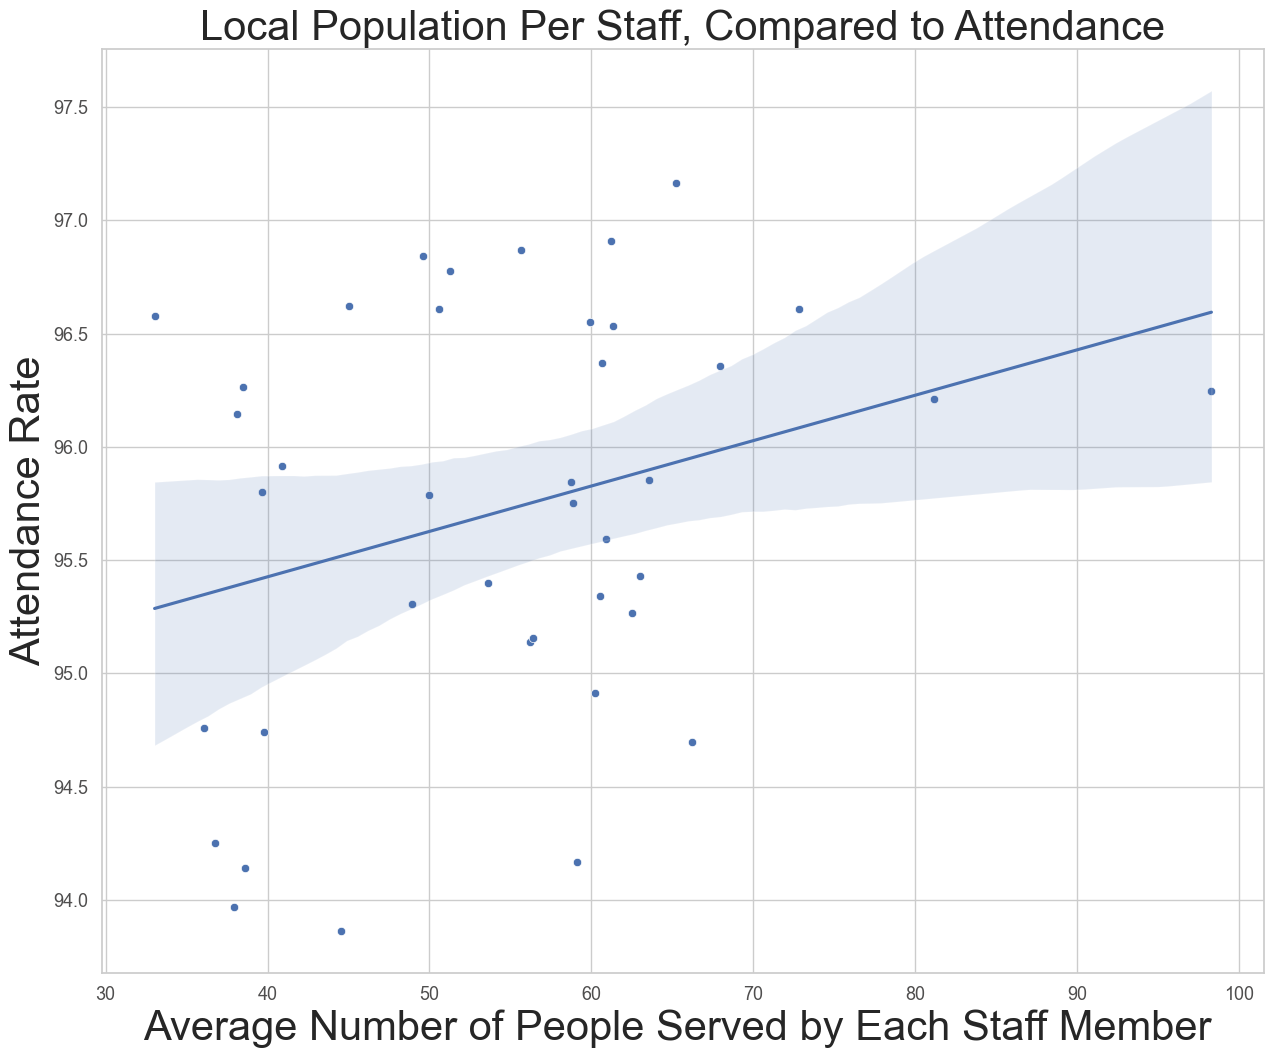

In [150]:
# Compare how busy staff are to Attendance
ax = sns.scatterplot(x='pop/staff2022', y='Attendance_Rate%', data=capacity_metrics)

# Add a line of best fit.
sns.regplot(x='pop/staff2022', y='Attendance_Rate%', data=capacity_metrics, scatter=False, ax=ax)

# Title and axis names.
plt.title('Local Population Per Staff, Compared to Attendance', size = 30)
plt.xlabel('Average Number of People Served by Each Staff Member ', size = 30)
plt.ylabel('Attendance Rate', size = 30)

# Saving the figure. 
plt.savefig('Local Population Per Staff, Compared to Attendance', dpi=300, bbox_inches='tight')

plt.show()

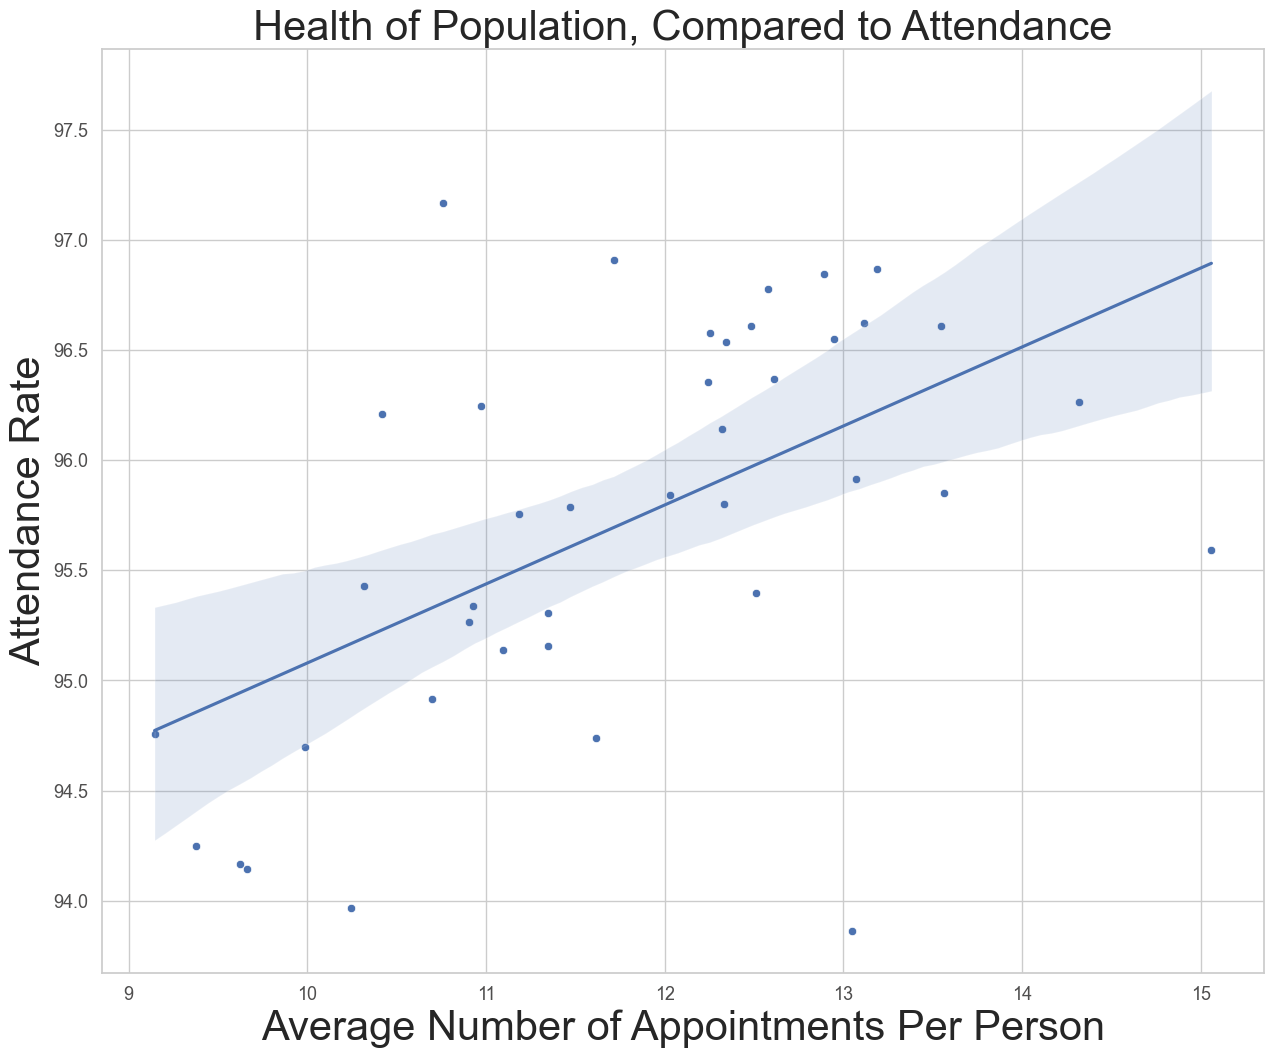

In [151]:
# Compare how 'sick' a location is to Attendance
ax = sns.scatterplot(x='appts/pop', y='Attendance_Rate%', data=capacity_metrics)

# Add a line of best fit.
sns.regplot(x='appts/pop', y='Attendance_Rate%', data=capacity_metrics, scatter=False, ax=ax)

# Title and axis names.
plt.title('Health of Population, Compared to Attendance', size = 30)
plt.xlabel('Average Number of Appointments Per Person', size = 30)
plt.ylabel('Attendance Rate', size = 30)


# Saving the figure. 
plt.savefig('Health of Population, Compared to Attendance', dpi=300, bbox_inches='tight')

plt.show()

As a final note, we should advise on the modality of an appointment, most likely to produce a desireable outcome.

In [152]:
# Define a new DataFrame to investigate which medium is best, depending on how far out the appointment was booked.

des_mode = ar.groupby(['time_between_book_and_appointment', 
                       'hcp_type', 'appointment_mode', 'appointment_status']).sum().reset_index()

# Remove 'unknowns'.
des_mode = des_mode[des_mode['time_between_book_and_appointment']!='Unknown / Data Quality']

des_mode = des_mode[des_mode['hcp_type']!='Unknown']

des_mode = des_mode[des_mode['appointment_status']!='Unknown']

des_mode = des_mode[des_mode['appointment_mode']!='Unknown']

des_mode

time_between_book_and_appointment              hcp_type appointment_mode  \
0                               1 Day                    GP     Face-to-Face   
1                               1 Day                    GP     Face-to-Face   
3                               1 Day                    GP       Home Visit   
4                               1 Day                    GP       Home Visit   
6                               1 Day                    GP        Telephone   
..                                ...                   ...              ...   
287                          Same Day  Other Practice staff       Home Visit   
289                          Same Day  Other Practice staff        Telephone   
290                          Same Day  Other Practice staff        Telephone   
295                          Same Day  Other Practice staff     Video/Online   
296                          Same Day  Other Practice staff     Video/Online   

    appointment_status  count_of_appointments  
0             Attended               16600241  
1                  DNA                 614953  
3             Attended                 206489  
4                  DNA                   6907  
6             Attended               15708047  
..                 ...                    ...  
287                DNA                  22438  
289           Attended               40393301  
290                DNA                 798925  
295           Attended                 412705  
296                DNA                  13576  

[112 rows x 5 columns]

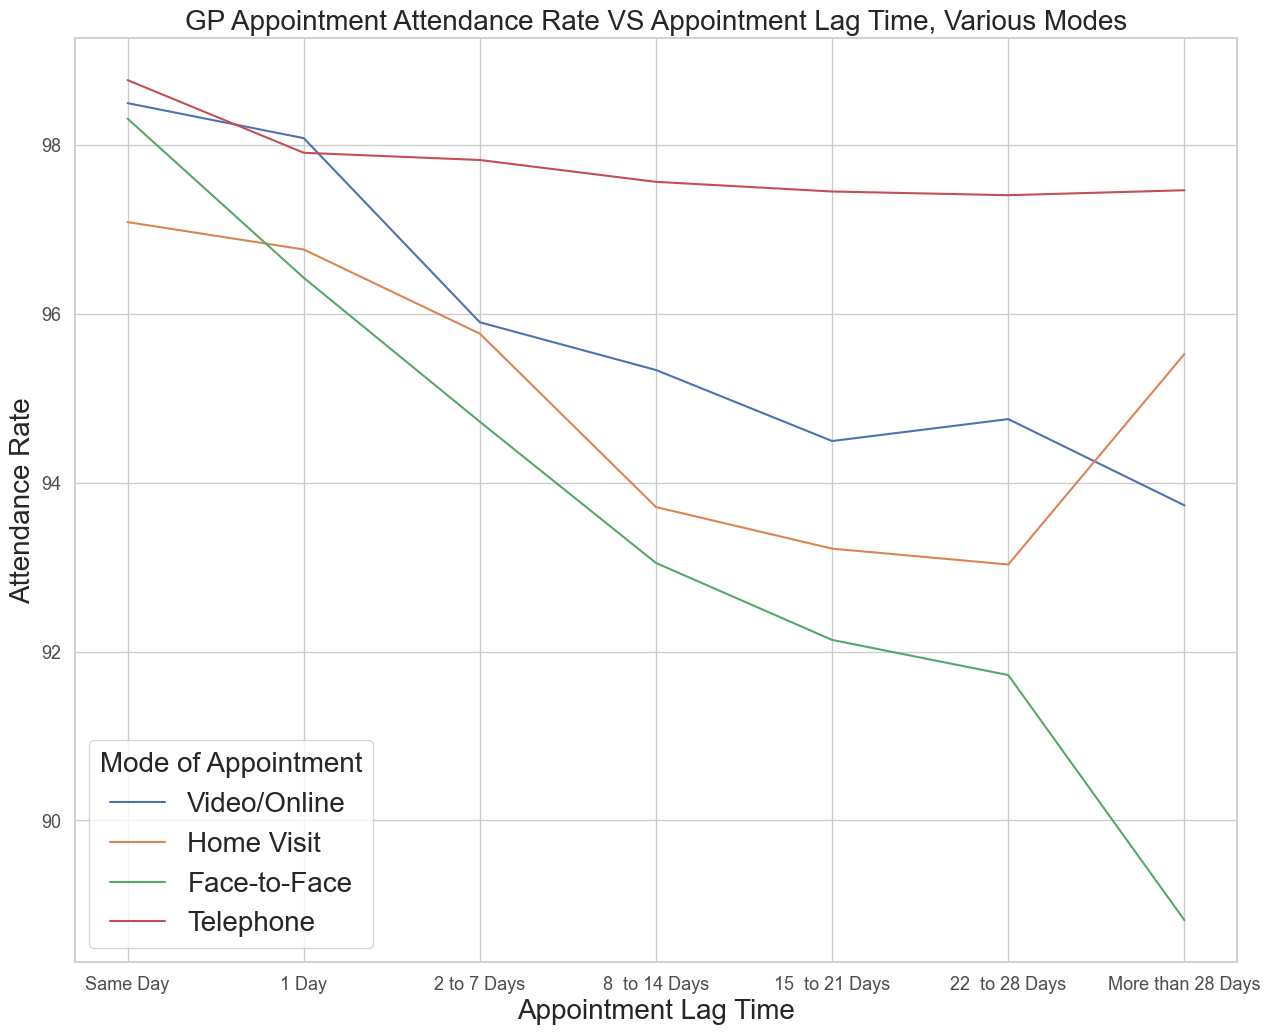

In [153]:
# I am going to create two graphs. One for GP and another for Other Staff.
# We will create two unique DataFrames for this purpose.
des_modeGP = des_mode[des_mode['hcp_type']=='GP'].reset_index()

des_mode_lagGP = des_modeGP.groupby(['time_between_book_and_appointment', 
                                         'appointment_mode', 'appointment_status']).sum().reset_index()

# Pivot the new DataFrame.
des_mode_lagGP = des_mode_lagGP.pivot_table(index=['time_between_book_and_appointment', 'appointment_mode'],
                          columns='appointment_status',
                          values='count_of_appointments'
                          ).reset_index()

# Add a column for attendance rate.
des_mode_lagGP['attendance_rate'] = (des_mode_lagGP['Attended']/(des_mode_lagGP['Attended']+des_mode_lagGP['DNA']))*100


# Let's also re-order the lag time column.
des_mode_lagGP['order'] = pd.Categorical(des_mode_lagGP['time_between_book_and_appointment'],
                                                                    categories = lag_order)

des_mode_lagGP = des_mode_lagGP.sort_values(by='order')

des_mode_lagGP = des_mode_lagGP.drop(columns='order')


# Now to create a line plot.

sns.lineplot(x='time_between_book_and_appointment', y='attendance_rate', 
             hue = 'appointment_mode', data = des_mode_lagGP)

# Increasing the size of the legend as it is quite small.
plt.legend(title= 'Mode of Appointment', fontsize = 20, title_fontsize = 20, bbox_to_anchor=(0, 0), loc='lower left')

# Title and axis names.
plt.title('GP Appointment Attendance Rate VS Appointment Lag Time, Various Modes', size = 20)
plt.xlabel('Appointment Lag Time', size = 20)
plt.ylabel('Attendance Rate', size = 20)

# Saving the figure. 
plt.savefig('GP Appointment Attendance Rate VS Appointment Lag Time, Various Modes', dpi=150, bbox_inches='tight')


plt.show()

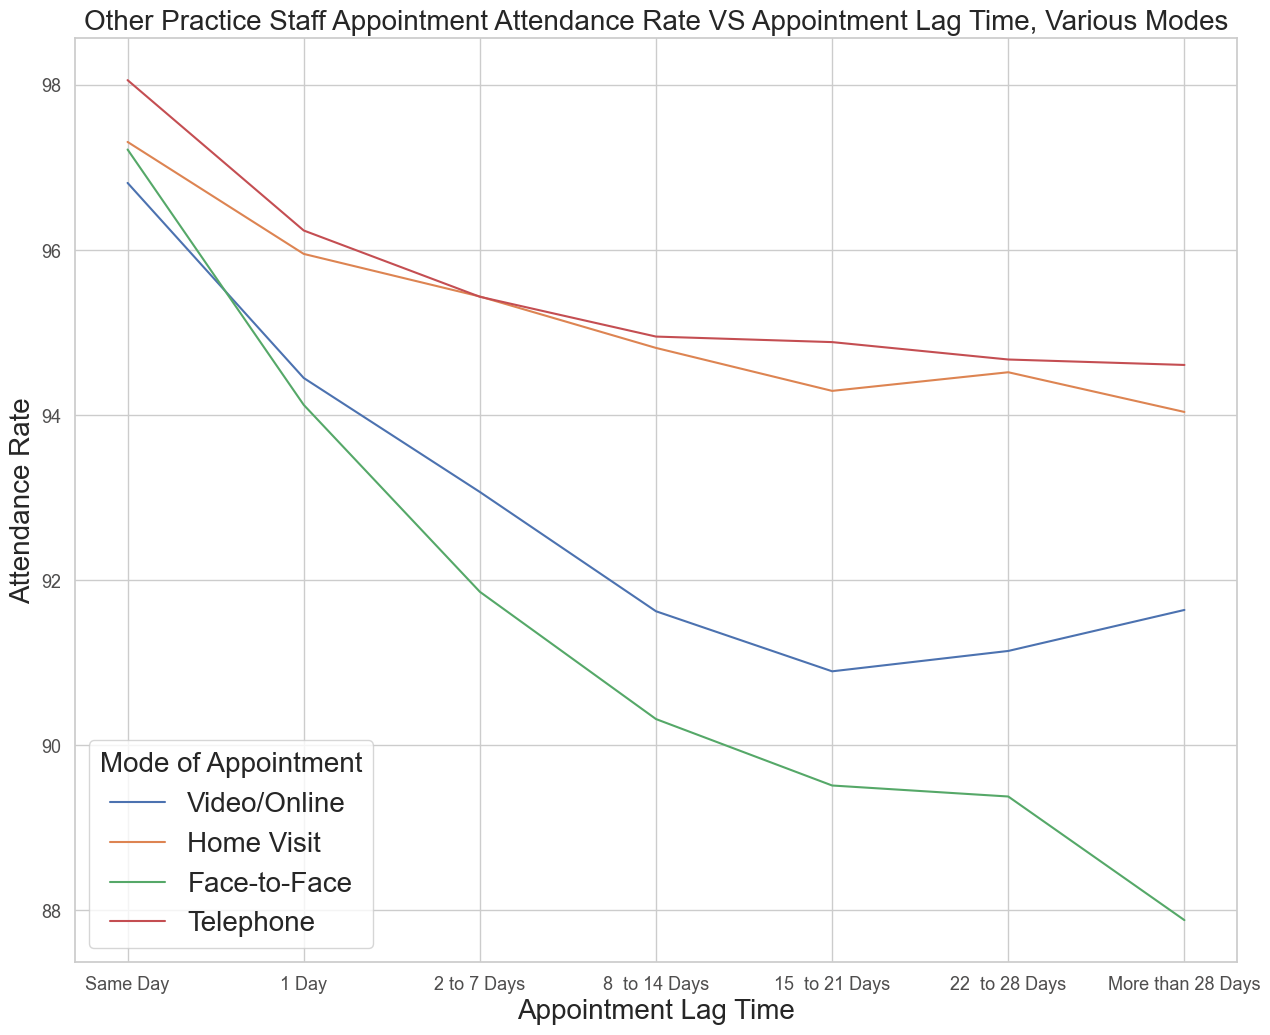

In [154]:
# Repeating the process with 'Other Practice Staff'.
des_modeOPS = des_mode[des_mode['hcp_type']=='Other Practice staff'].reset_index()

des_mode_lagOPS = des_modeOPS.groupby(['time_between_book_and_appointment', 
                                         'appointment_mode', 'appointment_status']).sum().reset_index()

# Pivot the new DataFrame.
des_mode_lagOPS = des_mode_lagOPS.pivot_table(index=['time_between_book_and_appointment', 'appointment_mode'],
                          columns='appointment_status',
                          values='count_of_appointments'
                          ).reset_index()

# Add a column for attendance rate.
des_mode_lagOPS['attendance_rate'] = (des_mode_lagOPS['Attended']/(des_mode_lagOPS['Attended']+des_mode_lagOPS['DNA']))*100


# Let's also re-order the lag time column.
des_mode_lagOPS['order'] = pd.Categorical(des_mode_lagOPS['time_between_book_and_appointment'],
                                                                    categories = lag_order)

des_mode_lagOPS = des_mode_lagOPS.sort_values(by='order')

des_mode_lagOPS = des_mode_lagOPS.drop(columns='order')


# Now to create a line plot.

sns.lineplot(x='time_between_book_and_appointment', y='attendance_rate', 
             hue = 'appointment_mode', data = des_mode_lagOPS)

# Increasing the size of the legend as it is quite small.
plt.legend(title= 'Mode of Appointment', fontsize = 20, title_fontsize = 20, bbox_to_anchor=(0, 0), loc='lower left')

# Title and axis names.
plt.title('Other Practice Staff Appointment Attendance Rate VS Appointment Lag Time, Various Modes', size = 20)
plt.xlabel('Appointment Lag Time', size = 20)
plt.ylabel('Attendance Rate', size = 20)

# Saving the figure. 
plt.savefig('Other Practice Staff Appointment Attendance Rate VS Appointment Lag Time, Various Modes', 
            dpi=150, bbox_inches='tight')


plt.show()

### Provide a summary of your findings and recommendations based on the analysis.

In summary we can recommend the following:

Increase staff levels. Patients are not being given the time that the government recommends.

Communicate the value of NHS resources. There is evidence to suggest that when the population is more accutely aware of the scarcity of resources, they attend appointments more reliably.

Budgetted capacity exceeds use, but actual capacity seems far below actual use. There is a disconnect between what is budgetted for and outcomes. 

We cannot advise on exactly how many staff to recruit. We can advise however that if we increase attendance, we won't need to recruit as many staff. We can increase attendance by changing the modality of the appointment, depending on the lag time.